# Bivariate Analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from impyute.imputation.cs import mice

In [15]:
data=pd.read_csv('OnlineNewsPopularity.csv')
data

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...        731   
1      http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2      http://mashable.com/2013/01/07/apple-40-billio...        731   
3      http://mashable.com/2013/01/07/astronaut-notre...        731   
4       http://mashable.com/2013/01/07/att-u-verse-apps/        731   
5       http://mashable.com/2013/01/07/beewi-smart-toys/        731   
6      http://mashable.com/2013/01/07/bodymedia-armba...        731   
7       http://mashable.com/2013/01/07/canon-poweshot-n/        731   
8      http://mashable.com/2013/01/07/car-of-the-futu...        731   
9      http://mashable.com/2013/01/07/chuck-hagel-web...        731   
10     http://mashable.com/2013/01/07/cosmic-events-d...        731   
11      http://mashable.com/2013/01/07/crayon-creatures/        731   
12         http://mashable.com/2013/01/07/creature-cups/        731   
13             http://mashable.com/2013/01/07/dad-jokes/        731   
14     http://mashable.com/2013/01/07/downton-abbey-t...        731   
15     http://mashable.com/2013/01/07/earth-size-plan...        731   
16             http://mashable.com/2013/01/07/echo-game/        731   
17     http://mashable.com/2013/01/07/entrepreneur-tr...        731   
18     http://mashable.com/2013/01/07/facebook-sick-app/        731   
19     http://mashable.com/2013/01/07/felt-audio-puls...        731   
20          http://mashable.com/2013/01/07/ford-glympse/        731   
21      http://mashable.com/2013/01/07/ftc-google-leaks/        731   
22     http://mashable.com/2013/01/07/fujifilm-50x-su...        731   
23     http://mashable.com/2013/01/07/hillary-clinton...        731   
24                http://mashable.com/2013/01/07/htc-q1/        731   
25     http://mashable.com/2013/01/07/huawei-ascend-m...        731   
26     http://mashable.com/2013/01/07/iheartradio-app...        731   
27     http://mashable.com/2013/01/07/intel-awesome-l...        731   
28     http://mashable.com/2013/01/07/isp02-iphone-ta...        731   
29        http://mashable.com/2013/01/07/jobs-contently/        731   
...                                                  ...        ...   
39614  http://mashable.com/2014/12/26/the-interview-i...          9   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...          9   
39616  http://mashable.com/2014/12/26/top-photography...          9   
39617  http://mashable.com/2014/12/26/tor-attacked-li...          9   
39618  http://mashable.com/2014/12/26/tsa-gift-wrap-r...          9   
39619  http://mashable.com/2014/12/26/tsunami-10-year...          9   
39620  http://mashable.com/2014/12/26/turkey-teen-ins...          9   
39621  http://mashable.com/2014/12/26/ukraine-prisone...          9   
39622  http://mashable.com/2014/12/26/wacky-kickstart...          9   
39623        http://mashable.com/2014/12/26/what-is-tor/          9   
39624  http://mashable.com/2014/12/27/air-asia-flight...          9   
39625  http://mashable.com/2014/12/27/als-ice-bucket-...          9   
39626  http://mashable.com/2014/12/27/christmas-tree-...          9   
39627  http://mashable.com/2014/12/27/extremist-leade...          9   
39628  http://mashable.com/2014/12/27/facebook-year-i...          9   
39629  http://mashable.com/2014/12/27/frozen-doll-prank/          9   
39630  http://mashable.com/2014/12/27/high-school-i-c...          9   
39631  http://mashable.com/2014/12/27/japan-elderly-d...          9   
39632  http://mashable.com/2014/12/27/las-vegas-new-y...          9   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...          9   
39634  http://mashable.com/2014/12/27/music-grid-outf...          9   
39635   http://mashable.com/2014/12/27/nike-marc-newson/          9   
39636  http://mashable.com/2014/12/27/north-korea-int...          8   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...          8   
39638  http://mashable.com/2014/12/27/protests-contin...          8   
39639 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [6]:
data.shape

(39644, 61)

In [7]:
data.describe().T

count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords                   39644.0       7.223767       1.909130  1.00000   
data_channel_is_lifestyle      39644.0       0.052946       0.223929  0.00000   
data_channel_is_entertainment  39644.0       0.178009       0.382525  0.00000   
data_channel_is_bus            39644.0       0.157855       0.364610  0.00000   
data_channel_is_socmed         39644.0       0.058597       0.234871  0.00000   
data_channel_is_tech           39644.0       0.185299       0.388545  0.00000   
data_channel_is_world          39644.0       0.212567       0.409129  0.00000   
kw_min_min                     39644.0      26.106801      69.633215 -1.00000   
kw_max_min                     39644.0    1153.951682    3857.990877  0.00000   
kw_avg_min                     39644.0     312.366967     620.783887 -1.00000   
kw_min_max                     39644.0   13612.354102   57986.029357  0.00000   
kw_max_max                     39644.0  752324.066694  214502.129573  0.00000   
kw_avg_max                     39644.0  259281.938083  135102.247285  0.00000   
kw_min_avg                     39644.0    1117.146610    1137.456951 -1.00000   
kw_max_avg                     39644.0    5657.211151    6098.871957  0.00000   
kw_avg_avg                     39644.0    3135.858639    1318.150397  0.00000   
self_reference_min_shares      39644.0    3998.755396   19738.670516  0.00000   
self_reference_max_shares      39644.0   10329.212662   41027.576613  0.00000   
self_reference_avg_sharess     39644.0    6401.697580   24211.332231  0.00000   
weekday_is_monday              39644.0       0.168020       0.373889  0.00000   
weekday_is_tuesday             39644.0       0.186409       0.389441  0.00000   
weekday_is_wednesday           39644.0       0.187544       0.390353  0.00000   
weekday_is_thursday            39644.0       0.183306       0.386922  0.00000   
weekday_is_friday              39644.0       0.143805       0.350896  0.00000   
weekday_is_saturday            39644.0       0.061876       0.240933  0.00000   
weekday_is_sunday              39644.0       0.069039       0.253524  0.00000   
is_weekend                     39644.0       0.130915       0.337312  0.00000   
LDA_00                         39644.0       0.184599       0.262975  0.00000   
LDA_01                         39644.0       0.141256       0.219707  0.00000   
LDA_02                         39644.0       0.216321       0.282145  0.00000   
LDA_03                         39644.0       0.223770       0.295191  0.00000   
LDA_04                         39644.0       0.234029       0.289183  0.00000   
global_subjectivity            39644.0       0.443370       0.116685  0.00000   
global_sentiment_polarity      39644.0       0.119309       0.096931 -0.39375   
global_rate_positive_words     39644.0       0.039625       0.017429  0.00000   
global_rate_negative_words     39644.0       0.016612       0.010828  0.00000   
rate_positive_words            39644.0       0.682150       0.190206  0.00000   
rate_negative_words            39644.0       0.287934       0.15

In [8]:
data.corr().head()

timedelta  n_tokens_title  n_tokens_content  \
timedelta          1.000000       -0.240320         -0.062867   
n_tokens_title    -0.240320        1.000000          0.018160   
n_tokens_content  -0.062867        0.018160          1.000000   
n_unique_tokens    0.002866       -0.005318         -0.004737   
n_non_stop_words   0.000089       -0.004754          0.017512   

                  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  \
timedelta                0.002866          0.000089                  0.003805   
n_tokens_title          -0.005318         -0.004754                 -0.005420   
n_tokens_content        -0.004737          0.017512                  0.000373   
n_unique_tokens          1.000000          0.999572                  0.999852   
n_non_stop_words         0.999572          1.000000                  0.999532   

                  num_hrefs  num_self_hrefs  num_imgs  num_videos  ...  \
timedelta         -0.000832        0.064530 -0.027636    0.000936  ...   
n_tokens_title    -0.053496       -0.014856 -0.008858    0.051460  ...   
n_tokens_content   0.423065        0.304682  0.342600    0.103699  ...   
n_unique_tokens   -0.004352        0.006620  0.018802   -0.000597  ...   
n_non_stop_words   0.005521        0.013598  0.028486   -0.000899  ...   

                  min_positive_polarity  max_positive_polarity  \
timedelta                      0.054772               0.098288   
n_tokens_title                -0.025069              -0.021662   
n_tokens_content              -0.261493               0.415706   
n_unique_tokens                0.009193              -0.009054   
n_non_stop_words               0.000904               0.002062   

                  avg_negative_polarity  min_negative_polarity  \
timedelta                     -0.000507               0.062175   
n_tokens_title                -0.017096              -0.029146   
n_tokens_content              -0.130375              -0.450603   
n_unique_tokens                0.001453               0.009902   
n_non_stop_words              -0.001372              -0.001214   

                  max_negative_polarity  title_subjectivity  \
timedelta                     -0.063239           -0.015919   
n_tokens_title                 0.011425            0.077245   
n_tokens_content               0.225870            0.004484   
n_unique_tokens               -0.007315           -0.004678   
n_non_stop_words              -0.000761           -0.005389   

                  title_sentiment_polarity  abs_title_subjectivity  \
timedelta                         0.038711                0.011551   
n_tokens_title                    0.000240               -0.146954   
n_tokens_content                  0.023358                0.007136   
n_unique_tokens                  -0.002333               -0.009242   
n_non_stop_words                 -0.001650               -0.008511   

                  abs_title_sentiment_polarity    shares  
timedelta                            -0.002745  0.008662  
n_tokens_title                        0.040550  0.008783  
n_tokens_content                      0.013439  0.002459  
n_unique_tokens                      -0.004217  0.000806  
n_non_stop_words                     -0.004391  0.000443  

[5 rows x 60 columns]

In [9]:
data["shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

## Univariate and Bivariate Analysis 

### 1. n_tokens_title

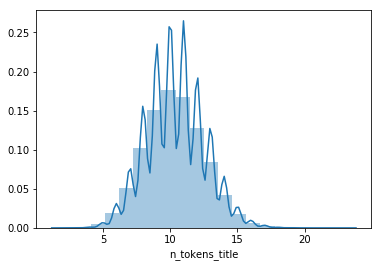

In [12]:
sns.distplot( data['n_tokens_title'], bins=20)

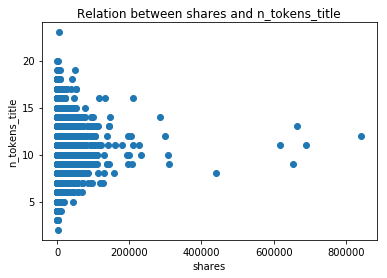

In [13]:
plt.scatter(data['shares'],data['n_tokens_title'])
plt.xlabel('shares')
plt.ylabel('n_tokens_title')
plt.title('Relation between shares and n_tokens_title')
plt.show()

In [14]:
data.n_tokens_title.describe()

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

### 2. n_tokens_content

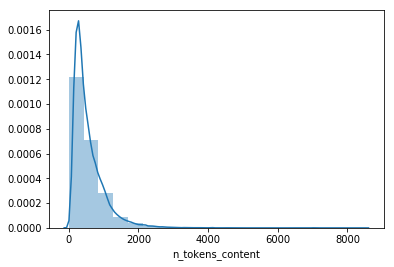

In [15]:
sns.distplot(data['n_tokens_content'], bins=20)

In [15]:
data['n_tokens_content'].describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [16]:
data[data['n_tokens_content'] == 0]

url  timedelta  \
893    http://mashable.com/2013/01/23/actual-facebook...        715   
917    http://mashable.com/2013/01/23/fitness-gadget-...        715   
1062   http://mashable.com/2013/01/25/data-vs-nature-...        713   
1121   http://mashable.com/2013/01/26/infographics-ma...        712   
1312   http://mashable.com/2013/01/29/social-tv-chart...        709   
1336   http://mashable.com/2013/01/30/blackberry-10-l...        708   
1352   http://mashable.com/2013/01/30/davos-social-me...        708   
1454   http://mashable.com/2013/01/31/nfl-super-bowl-...        707   
1485   http://mashable.com/2013/02/01/2012-internet-o...        706   
1574   http://mashable.com/2013/02/03/beyonce-super-b...        704   
1593   http://mashable.com/2013/02/03/super-bowl-ads-...        704   
1653   http://mashable.com/2013/02/04/super-bowl-soci...        703   
1726   http://mashable.com/2013/02/05/online-dating-h...        702   
1741   http://mashable.com/2013/02/05/social-tv-chart...        702   
1743   http://mashable.com/2013/02/05/teachers-techno...        702   
1822   http://mashable.com/2013/02/07/2013-sony-world...        700   
1924   http://mashable.com/2013/02/08/menswear-dog-fa...        699   
1985   http://mashable.com/2013/02/10/grammys-social-...        697   
2014   http://mashable.com/2013/02/11/brian-maffitt-v...        696   
2132   http://mashable.com/2013/02/12/social-tv-chart...        695   
2254   http://mashable.com/2013/02/14/facebook-valent...        693   
2304   http://mashable.com/2013/02/14/valentines-day-...        693   
2386   http://mashable.com/2013/02/16/facebook-parent...        691   
2562   http://mashable.com/2013/02/20/music-copyright...        687   
2771       http://mashable.com/2013/02/24/oscars-online/        683   
2922   http://mashable.com/2013/02/26/ted-talks-infog...        681   
2933   http://mashable.com/2013/02/26/white-house-rem...        681   
3143    http://mashable.com/2013/03/02/the-shining-2013/        677   
3337   http://mashable.com/2013/03/06/internet-lied-t...        673   
3704   http://mashable.com/2013/03/13/ashamalla-sketc...        666   
...                                                  ...        ...   
39374  http://mashable.com/2014/12/22/dontre-hamilton...         15   
39394  http://mashable.com/2014/12/22/italy-fines-tri...         14   
39401  http://mashable.com/2014/12/22/new-york-honors...         14   
39403  http://mashable.com/2014/12/22/nhs-genomics-pr...         14   
39418  http://mashable.com/2014/12/22/spain-christmas...         14   
39422  http://mashable.com/2014/12/22/travel-stocking...         14   
39426  http://mashable.com/2014/12/22/window-washer-f...         14   
39428  http://mashable.com/2014/12/23/18-tv-shows-to-...         14   
39434  http://mashable.com/2014/12/23/bbc-presenter-g...         13   
39437  http://mashable.com/2014/12/23/charity-donatio...         13   
39452  http://mashable.com/2014/12/23/how-to-track-sa...         13   
39474  http://mashable.com/2014/12/23/solo-weddings-j...         12   
39477  http://mashable.com/2014/12/23/storm-warm-nort...         12   
39489  http://mashable.com/2014/12/24/1-5-million-chr...         12   
39495  http://mashable.com/2014/12/24/apple-itunes-th...         11   
39500  http://mashable.com/2014/12/24/christmas-down-...         11   
39502  http://mashable.com/2014/12/24/christmas-nativ...         11   
39504  http://mashable.com/2014/12/24/drake-holiday-c...         11   
39506  http://mashable.com/2014/12/24/george-h-w-bush...         11   
39513  http://mashable.com/2014/12/24/live-updates-an...         11   
39515  http://mashable.com/2014/12/24/loyal-dog-chase...         11   
39538  http://mashable.com/2014/12/24/watch-the-inter...         10   
39541  http://mashable.com/2014/12/25/12-days-of-tech...         10   
39569  http://mashable.com/2014/12/25/nsa-surveillanc...         10   
39584  http://mashable.com/2014/12/26/amazon-prime-10...          9   
39598 

#no. of words in the content can not be zero if there is content then it is not possible that there are any 0.
>2000 =651 rows
>3000=119 rows
>4000=40 rows
>5000= 15 rows
>6000= 11 rows
so its better if we use log instead of going to 
for 44rows values its 1% values

In [17]:
#np.log(data['n_tokens_content']).hist()

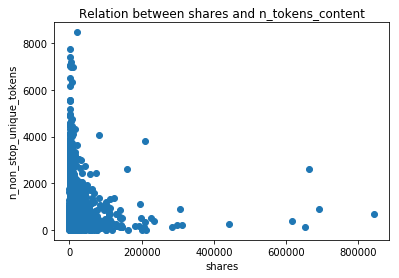

In [18]:
plt.scatter(data['shares'], data['n_tokens_content'],data=data)
plt.xlabel('shares')
plt.ylabel('n_non_stop_unique_tokens')
plt.title('Relation between shares and n_tokens_content')
plt.show()

### 3. 'n_unique_tokens'

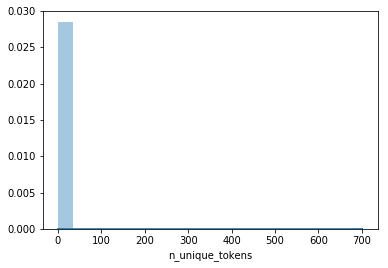

In [19]:
sns.distplot( data['n_unique_tokens'], bins=20)

In [20]:
#Rate of unique words(powerfull words) in the content

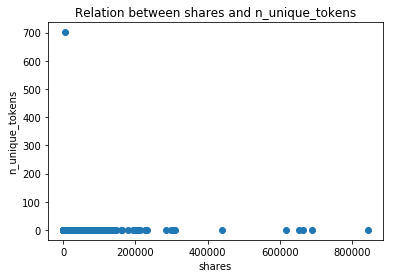

In [21]:
plt.scatter(data['shares'], data['n_unique_tokens'],data=data)
plt.xlabel('shares')
plt.ylabel('n_unique_tokens')
plt.title('Relation between shares and n_unique_tokens')
plt.show()

In [22]:
data.n_unique_tokens.describe()

count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64

In [23]:
data[data['n_unique_tokens'] > 1]

url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...        142   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037               9              1570            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
31037                     650.0         11              10        51  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
31037                    0.0                    0.0                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
31037                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  
31037                           0.0    5900  

[1 rows x 61 columns]

In [24]:
data[data['n_unique_tokens'] <=1].head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385          4               2         1  ...   
1                  0.791946          3               1         1  ...   
2                  0.663866          3               1         1  ...   
3                  0.665635          9               0         1  ...   
4                  0.540890         19              19        20  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

### 4. n_non_stop_words

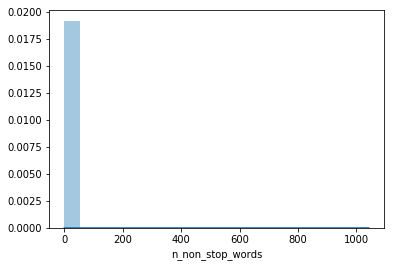

In [25]:
sns.distplot(data['n_non_stop_words'], bins=20)

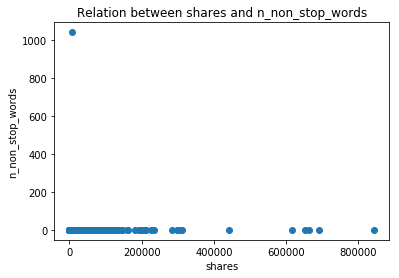

In [26]:
plt.scatter(data['shares'], data['n_non_stop_words'],data=data)
plt.xlabel('shares')
plt.ylabel('n_non_stop_words')
plt.title('Relation between shares and n_non_stop_words')
plt.show()

In [27]:
 data[data['n_non_stop_words'] > 1]

url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...        142   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037               9              1570            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
31037                     650.0         11              10        51  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
31037                    0.0                    0.0                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
31037                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  
31037                           0.0    5900  

[1 rows x 61 columns]

#We can see from above code that there is only one value of 'n_non_stop_word' which is greater than 1

### 5. n_non_stop_unique_tokens

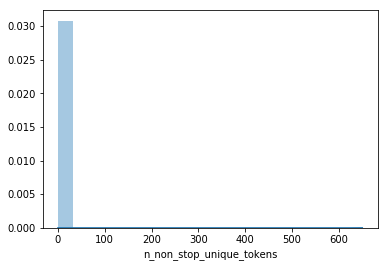

In [28]:
sns.distplot( data['n_non_stop_unique_tokens'], bins=20)

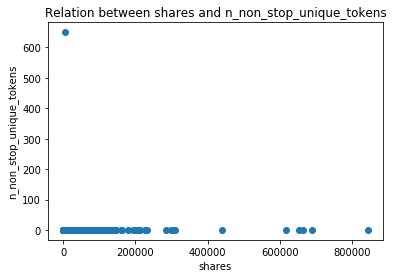

In [29]:
plt.scatter(data['shares'], data['n_non_stop_unique_tokens'],data=data)
plt.xlabel('shares')
plt.ylabel('n_non_stop_unique_tokens')
plt.title('Relation between shares and n_non_stop_unique_tokens')
plt.show()

In [30]:
data['n_non_stop_unique_tokens'].describe()

count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

In [31]:
data[data['n_non_stop_unique_tokens'] >1 ]

url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...        142   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037               9              1570            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
31037                     650.0         11              10        51  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
31037                    0.0                    0.0                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
31037                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  
31037                           0.0    5900  

[1 rows x 61 columns]

### 6. num_hrefs (Number of links)

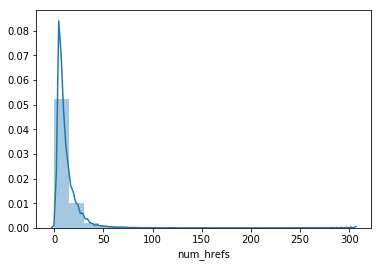

In [32]:
sns.distplot( data['num_hrefs'], bins=20)

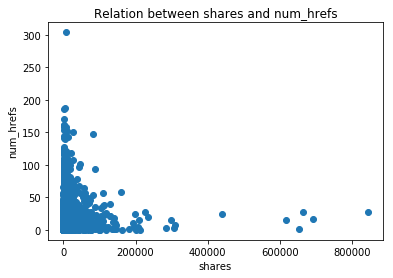

In [33]:
plt.scatter(data['shares'], data['num_hrefs'],data=data)
plt.xlabel('shares')
plt.ylabel('num_hrefs')
plt.title('Relation between shares and num_hrefs')
plt.show()

In [34]:
data.num_hrefs.describe()

count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

In [35]:
data[data['num_hrefs'] > 300]   # 186,304

url  timedelta  \
39338  http://mashable.com/2014/12/21/dueling-hashtag...         16   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
39338              11              1390          0.62261               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
39338                  0.651571        304               6         1  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
39338                 0.0625               0.733333                -0.3275   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
39338                   -0.8                   -0.1                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
39338                       0.0                     0.5   

       abs_title_sentiment_polarity  shares  
39338                           0.0    6500  

[1 rows x 61 columns]

### 7. num_self_hrefs ( Number of links to other articles published by Mashable)

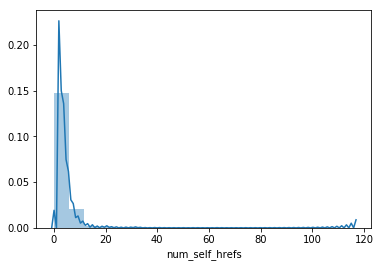

In [36]:
sns.distplot(data['num_self_hrefs'], bins=20)

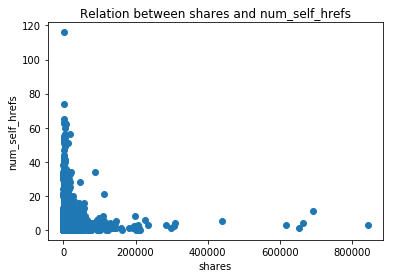

In [37]:
plt.scatter(data['shares'], data['num_self_hrefs'],data=data)
plt.xlabel('shares')
plt.ylabel('num_self_hrefs')
plt.title('Relation between shares and num_self_hrefs')
plt.show()

In [38]:
data.num_self_hrefs.describe()

count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64

In [39]:
data[data['num_self_hrefs'] > 100]  #65,82,119

url  timedelta  \
34418  http://mashable.com/2014/10/09/six-madrid-hosp...         90   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
34418              10              1046          0.15544               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
34418                  0.146341        119             116        15  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
34418                    0.2                    0.5              -0.180556   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
34418                -0.1875              -0.166667                 0.8   

       title_sentiment_polarity  abs_title_subjectivity  \
34418                       0.4                     0.3   

       abs_title_sentiment_polarity  shares  
34418                           0.4    2000  

[1 rows x 61 columns]

### 8. num_imgs

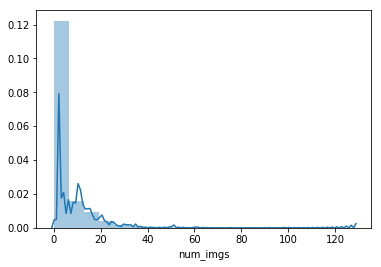

In [40]:
sns.distplot( data['num_imgs'], bins=20)

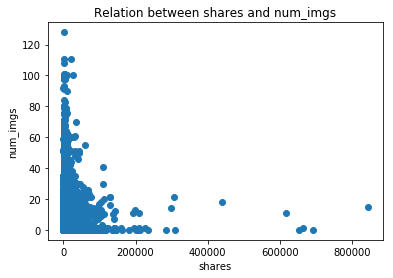

In [41]:
plt.scatter(data['shares'], data['num_imgs'],data=data)
plt.xlabel('shares')
plt.ylabel('num_imgs')
plt.title('Relation between shares and num_imgs')
plt.show()

In [42]:
data['num_imgs'].describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

In [43]:
data[data['num_imgs'] > 100]

url  timedelta  \
17891  http://mashable.com/2013/12/20/x-gaming-trends...        383   
18702  http://mashable.com/2014/01/12/first-photobomb...        361   
24564  http://mashable.com/2014/05/02/hotel-associati...        251   
24612  http://mashable.com/2014/05/03/joe-biden-comme...        249   
24802  http://mashable.com/2014/05/07/idina-menzel-de...        246   
24973  http://mashable.com/2014/05/09/weirdest-things...        243   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
17891              14              6505         0.365745               1.0   
18702               9              5194         0.202213               1.0   
24564              10              7413         0.173769               1.0   
24612               9              8474         0.188211               1.0   
24802              10              7185         0.166857               1.0   
24973               9              7004         0.167641               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
17891                  0.534433          2               1       101  ...   
18702                  0.242986         41               7       128  ...   
24564                  0.291889         28               4       108  ...   
24612                  0.318302         46              17       111  ...   
24802                  0.279277          3               3       111  ...   
24973                  0.281317          8               8       101  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
17891               0.033333                    1.0              -0.282952   
18702               0.050000                    1.0              -0.328693   
24564               0.033333                    1.0              -0.373817   
24612               0.033333                    1.0              -0.359945   
24802               0.033333                    1.0              -0.381966   
24973               0.033333                    1.0              -0.396067   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
17891                   -1.0                 -0.050            0.000000   
18702                   -0.7                 -0.050            0.400000   
24564                   -1.0                 -0.025            0.000000   
24612                   -1.0                 -0.050            0.535714   
24802                   -1.0                 -0.050            0.100000   
24973                   -1.0                 -0.050            0.602273   

       title_sentiment_polarity  abs_title_subjectivity  \
17891                  0.000000                0.500000   
18702                  0.650000                0.100000   
24564                  0.000000                0.500000   
24612                  0.285714                0.035714   
24802                  0.200000                0.400000   
24973                  0.443182                0.102273   

       abs_title_sentiment_polarity  shares  
17891                      0.000000    1400  
18702                      0.650000    2500  
24564                      0.000000    2300  
24612                      0.285714   20400  
24802                      0.200000    3000  
24973                      0.443182    4100  

[6 rows x 61 columns]

### 9. num_videos (Number of videos)

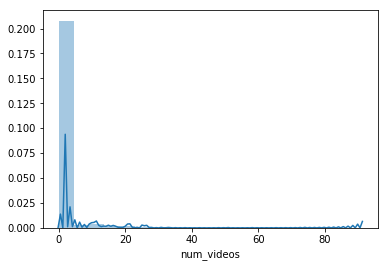

In [44]:
sns.distplot( data['num_videos'], bins=20)

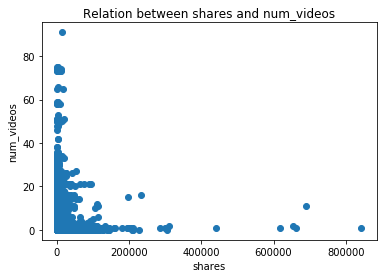

In [45]:
plt.scatter(data['shares'], data['num_videos'],data=data)
plt.xlabel('shares')
plt.ylabel('num_videos')
plt.title('Relation between shares and num_videos')
plt.show()

In [46]:
data.num_videos.describe()

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

In [47]:
data[data['num_videos']>40]    #>1 --> 5135 vaules (no outliers)

url  timedelta  \
1591   http://mashable.com/2013/02/03/super-bowl-2013...        704   
1610   http://mashable.com/2013/02/04/beyonces-super-...        703   
1614   http://mashable.com/2013/02/04/brands-super-bo...        703   
1615   http://mashable.com/2013/02/04/budweisers-clyd...        703   
1658   http://mashable.com/2013/02/04/twitter-made-su...        703   
1666   http://mashable.com/2013/02/04/will-ferrell-ol...        703   
1757    http://mashable.com/2013/02/06/beyonce-corvette/        701   
1853   http://mashable.com/2013/02/07/justin-timberla...        700   
2100          http://mashable.com/2013/02/12/job-skills/        695   
3011      http://mashable.com/2013/02/28/audi-paintball/        679   
3446   http://mashable.com/2013/03/08/anthony-sulliva...        671   
12642  http://mashable.com/2013/09/07/bicycle-powered...        488   
12667  http://mashable.com/2013/09/08/brain-window-im...        487   
17147   http://mashable.com/2013/12/06/types-of-boredom/        398   
17253  http://mashable.com/2013/12/09/single-girl-eng...        395   
17598  http://mashable.com/2013/12/16/charter-prepare...        388   
17787  http://mashable.com/2013/12/19/dannijo-social-...        385   
17935  http://mashable.com/2013/12/23/apple-13-inch-i...        381   
17997  http://mashable.com/2013/12/24/nsa-christmas-w...        380   
18101  http://mashable.com/2013/12/27/twitter-stock-s...        377   
18114  http://mashable.com/2013/12/28/ship-trapped-ic...        376   
18188  http://mashable.com/2013/12/31/reasons-stay-ho...        373   
18303  http://mashable.com/2014/01/03/vine-web-profiles/        370   
19348  http://mashable.com/2014/01/25/facebook-ad-con...        348   
19706  http://mashable.com/2014/01/31/sponsors-politi...        342   
19764  http://mashable.com/2014/02/02/snaps-super-bow...        340   
19797  http://mashable.com/2014/02/03/hackers-sue-ger...        339   
19822  http://mashable.com/2014/02/03/super-bowl-face...        339   
22960  http://mashable.com/2014/04/04/celebrity-chefs...        279   
23531  http://mashable.com/2014/04/15/best-boston-mar...        268   
24792  http://mashable.com/2014/05/07/dominique-ansel...        246   
26651   http://mashable.com/2014/06/09/paris-love-locks/        213   
26712  http://mashable.com/2014/06/10/lose-youtube-su...        212   
26728     http://mashable.com/2014/06/10/playstation-tv/        212   
26752  http://mashable.com/2014/06/10/us-companies-ch...        211   
29129  http://mashable.com/2014/07/17/malaysia-airlin...        175   
30965  http://mashable.com/2014/08/16/startup-ideas-c...        143   
31274   http://mashable.com/2014/08/22/burning-man-2014/        139   
32172  http://mashable.com/2014/09/05/late-night-host...        125   
38022  http://mashable.com/2014/12/02/cleveland-cop-t...         36   
38324  http://mashable.com/2014/12/05/nasa-orion-launch/         31   
38456  http://mashable.com/2014/12/08/massive-storm-a...         30   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...          8   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
1591                9              2478         0.394319               1.0   
1610               12              2799         0.387617               1.0   
1614               13              2784         0.387915               1.0   
1615               15              2453         0.391415               1.0   
1658                7              3288         0.375468               1.0   
1666               12              2458         0.393353               1.0   
1757               12              2573         0.395582               1.0   
1853               10              2541         0.394458               1.0   
2100               10              3050         0.399662               1.0   
3011               11              2416         0.396137               1.0   
3446               10              2349         0.402735              

### 10. average_token_length (Average length of the words in the content)

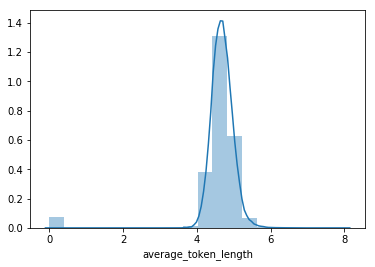

In [48]:
sns.distplot(data['average_token_length'], bins=20)

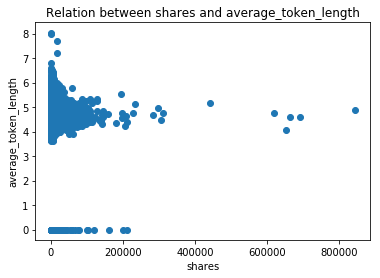

In [49]:
plt.scatter( data['shares'],data['average_token_length'],data=data)
plt.xlabel('shares')
plt.ylabel('average_token_length')
plt.title('Relation between shares and average_token_length')
plt.show()

In [50]:
data.average_token_length.describe()

count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64

### 11. num_keywords

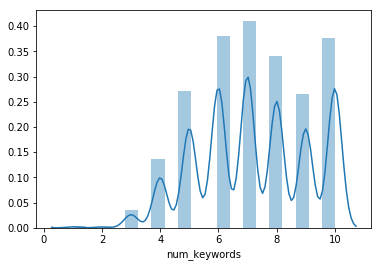

In [51]:
sns.distplot(data['num_keywords'], bins=20)

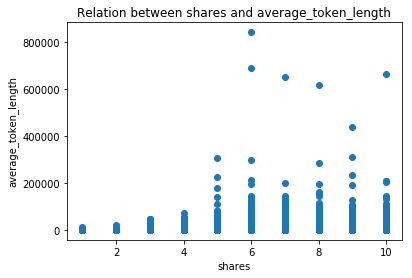

In [52]:
plt.scatter(data['num_keywords'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('average_token_length')
plt.title('Relation between shares and average_token_length')
plt.show()

In [53]:
data['num_keywords'].describe()

count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64

### 12. data_channel_is_lifestyle

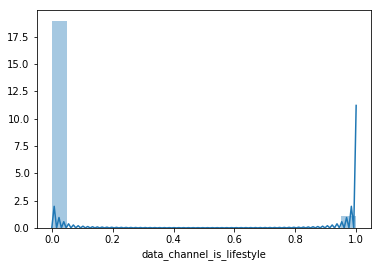

In [54]:
sns.distplot( data['data_channel_is_lifestyle'], bins=20)

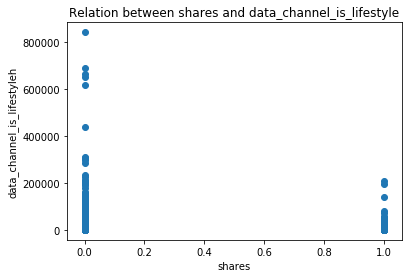

In [55]:
plt.scatter(data['data_channel_is_lifestyle'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_lifestyleh')
plt.title('Relation between shares and data_channel_is_lifestyle')
plt.show()

In [56]:
data.data_channel_is_lifestyle.describe()

count    39644.000000
mean         0.052946
std          0.223929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_lifestyle, dtype: float64

### 13. data_channel_is_entertainment

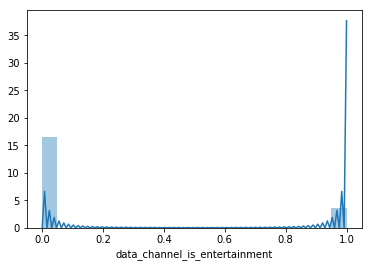

In [57]:
sns.distplot( data['data_channel_is_entertainment'], bins=20)

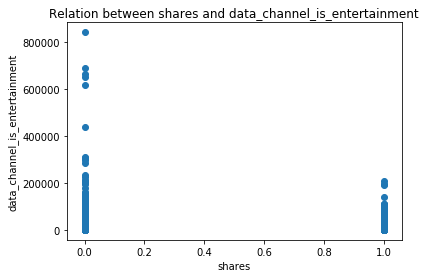

In [58]:
plt.scatter(data['data_channel_is_entertainment'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_entertainment')
plt.title('Relation between shares and data_channel_is_entertainment')
plt.show()

### 14. data_channel_is_bus

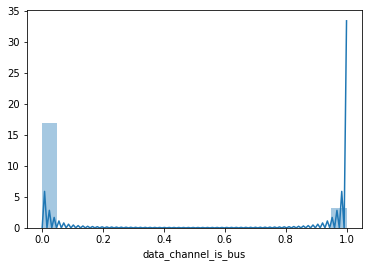

In [59]:
sns.distplot( data['data_channel_is_bus'], bins=20)

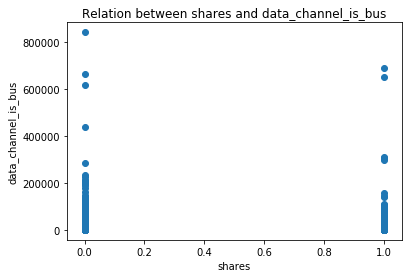

In [60]:
plt.scatter(data['data_channel_is_bus'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_bus')
plt.title('Relation between shares and data_channel_is_bus')
plt.show()

### 15. data_channel_is_socmed

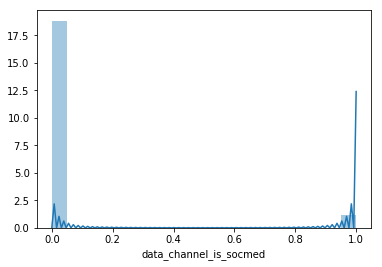

In [61]:
sns.distplot( data['data_channel_is_socmed'], bins=20)

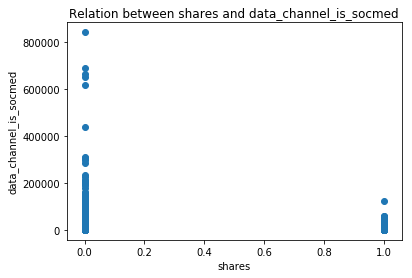

In [62]:
plt.scatter(data['data_channel_is_socmed'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_socmed')
plt.title('Relation between shares and data_channel_is_socmed')
plt.show()

### 16. data_channel_is_tech

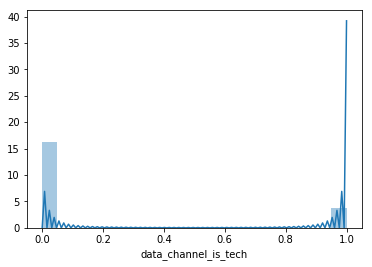

In [63]:
sns.distplot( data['data_channel_is_tech'], bins=20)

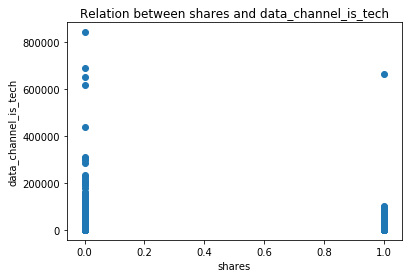

In [64]:
plt.scatter(data['data_channel_is_tech'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_tech')
plt.title('Relation between shares and data_channel_is_tech')
plt.show()

### 17. data_channel_is_world

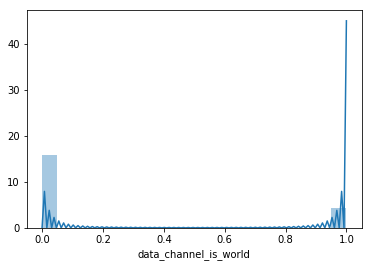

In [65]:
sns.distplot( data['data_channel_is_world'], bins=20)

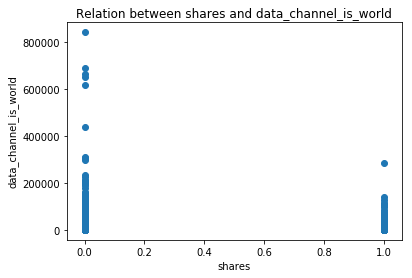

In [66]:
plt.scatter(data['data_channel_is_world'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_world')
plt.title('Relation between shares and data_channel_is_world')
plt.show()

## Shares

In [67]:
data.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

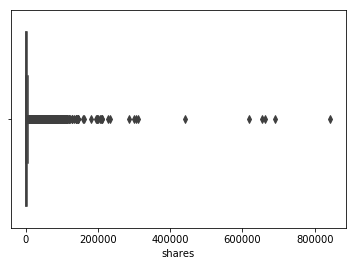

In [68]:
sns.boxplot(data['shares'])

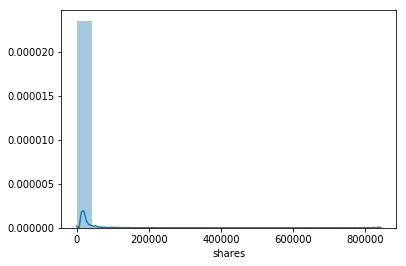

In [71]:
sns.distplot(data['shares'], bins=20)   

In [17]:
print(data['shares'].skew())
print(np.log(data['shares']).skew())

33.96388487571415
1.017799445530757


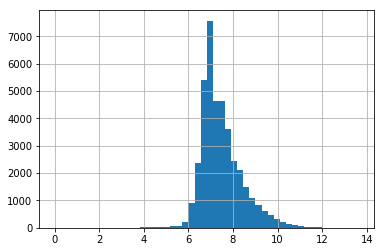

In [18]:
np.log(data['shares']).hist(bins=50)

In [19]:
data['log_shares']=np.log(data['shares'])

In [20]:
data.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385          4               2         1  ...   
1                  0.791946          3               1         1  ...   
2                  0.663866          3               1         1  ...   
3                  0.665635          9               0         1  ...   
4                  0.540890         19              19        20  ...   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  shares  log_shares  
0                0.000000                      0.187500     593    6.385194  
1                0.500000                      0.000000     711    6.566672  
2                0.500000                      0.000000    1500    7.313220  
3                0.500000                      0.000000    1200    7.090077  
4                0.045455                      0.136364     505    6.224558  

[5 rows x 62 columns]

In [77]:
data['log_shares'].describe()

count    39644.000000
mean         7.474855
std          0.930486
min          0.000000
25%          6.852243
50%          7.244228
75%          7.937375
max         13.645078
Name: log_shares, dtype: float64

In [78]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [79]:
data[data['shares'] > 100000].head()

url  timedelta  \
3043  http://mashable.com/2013/02/28/myspace-tom-twi...        679   
3139      http://mashable.com/2013/03/02/resume-design/        677   
3145  http://mashable.com/2013/03/02/wealth-inequality/        677   
4506  http://mashable.com/2013/03/28/blackberry-1-mi...        651   
5370  http://mashable.com/2013/04/15/dove-ad-beauty-...        633   

      n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3043              11               506         0.565844               1.0   
3139               9               502         0.547094               1.0   
3145              11               382         0.487805               1.0   
4506              10               905         0.460067               1.0   
5370              11               893         0.517202               1.0   

      n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
3043                  0.672956         28               6         1  ...   
3139                  0.719870         10               1         1  ...   
3145                  0.605809         15               3        11  ...   
4506                  0.645161          3               2        21  ...   
5370                  0.716730         17              11         0  ...   

      max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
3043                    1.0              -0.422500              -1.000000   
3139                    0.8              -0.189899              -0.600000   
3145                    0.7              -0.277778              -0.433333   
4506                    1.0              -0.224913              -0.666667   
5370                    1.0              -0.348674              -1.000000   

      max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
3043                 -0.125                 0.6                     -0.40   
3139                 -0.100                 1.0                      0.85   
3145                 -0.200                 0.0                      0.00   
4506                 -0.125                 0.0                      0.00   
5370                 -0.100                 0.0                      0.00   

      abs_title_subjectivity  abs_title_sentiment_polarity  shares  log_shares  
3043                     0.1                          0.40  227300   12.334026  
3139                     0.5                          0.85  144400   11.880343  
3145                     0.5                          0.00  617900   13.334082  
4506                     0.5                          0.00  306100   12.631667  
5370                     0.5                          0.00  690400   13.445026  

[5 rows x 62 columns]

In [ ]:
###
data[data.columns[0:]].corr()['shares'][:-1]

In [ ]:
x=pd.Series(data[data.columns[0:]].corr()['shares'][:-1])
x

In [ ]:
highcorr=x[x>0.1]
highcorr

In [ ]:
data.columns


## 18.'kw_min_min'

In [ ]:
sns.distplot(data['kw_min_min'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_min_min'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_min_min')
plt.title('Relation between shares and kw_min_min')
plt.show()

In [ ]:
data['kw_min_min'].describe()

In [ ]:
data[data['kw_min_min']>217]

## 19. 'kw_max_min'

In [ ]:
sns.distplot(data['kw_max_min'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_max_min'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_max_min')
plt.title('Relation between shares and kw_max_min')
plt.show()

In [ ]:
data['kw_max_min'].describe()

In [ ]:
data[data['kw_max_min']>150000]

## 20. 'kw_avg_min'

In [ ]:
sns.distplot(data['kw_avg_min'], bins=20)

In [ ]:
plt.scatter(data['kw_avg_min'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('kw_avg_min')
plt.title('Relation between shares and kw_avg_min')
plt.show()

In [ ]:
data['kw_avg_min'].describe()

In [ ]:
data[data['kw_avg_min']>20000]

##  21. 'kw_min_max'

In [ ]:
sns.distplot( data['kw_min_max'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_min_max'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_min_max')
plt.title('Relation between shares and kw_min_max')
plt.show()

In [ ]:
data['kw_min_max'].describe()

In [ ]:
data[data['kw_min_max']>700000]

## 22. 'kw_max_max'

In [ ]:
sns.distplot( data['kw_max_max'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_max_max'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_max_max')
plt.title('Relation between shares and kw_max_max')
plt.show()

## 23. 'kw_avg_max'

In [ ]:
sns.distplot( data['kw_avg_max'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_avg_max'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_avg_max')
plt.title('Relation between shares and kw_avg_max')
plt.show()

In [ ]:
data['kw_avg_max'].describe()

## 24. 'kw_min_avg'

In [ ]:
sns.distplot( data['kw_min_avg'], bins=20)

In [ ]:
plt.scatter(data['kw_min_avg'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('kw_min_avg')
plt.title('Relation between shares and kw_min_avg')
plt.show()

## 25. 'kw_max_avg'

In [ ]:
sns.distplot( data['kw_max_avg'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_max_avg'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_max_avgd')
plt.title('Relation between shares and kw_max_avg')
plt.show()

In [ ]:
data['kw_max_avg'].describe()

In [ ]:
data[data['kw_max_avg']>200000]

## 26.'kw_avg_avg'

In [ ]:
sns.distplot( data['kw_avg_avg'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['kw_avg_avg'], data=data)
plt.xlabel('shares')
plt.ylabel('kw_avg_avg')
plt.title('Relation between shares and kw_avg_avg')
plt.show()

In [ ]:
data[data['kw_avg_avg']>35000]

## 27.'self_reference_min_shares'

In [ ]:
sns.distplot( data['self_reference_min_shares'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['self_reference_min_shares'], data=data)
plt.xlabel('shares')
plt.ylabel('self_reference_min_shares')
plt.title('Relation between shares and self_reference_min_shares')
plt.show()

In [ ]:
data['self_reference_min_shares'].describe()

In [ ]:
data[data['self_reference_min_shares']>680000]

## 28.'self_reference_max_shares'

In [ ]:
sns.distplot(data['self_reference_max_shares'], bins=20)

In [ ]:
plt.scatter(data['shares'],data['self_reference_max_shares'], data=data)
plt.xlabel('shares')
plt.ylabel('self_reference_max_shares')
plt.title('Relation between shares and self_reference_max_shares')
plt.show()

In [111]:
data['self_reference_max_shares'].describe()

count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64

In [112]:
data[data['self_reference_max_shares']>700000]

url  timedelta  \
10261            http://mashable.com/2013/07/21/gaymerx/        536   
10297   http://mashable.com/2013/07/22/ebay-now-desktop/        535   
10336  http://mashable.com/2013/07/22/vevo-music-vide...        535   
13366  http://mashable.com/2013/09/21/emmys-instagram...        474   
14926     http://mashable.com/2013/10/22/cannonball-app/        443   
16348  http://mashable.com/2013/11/19/san-diego-tech-...        415   
18101  http://mashable.com/2013/12/27/twitter-stock-s...        377   
18188  http://mashable.com/2013/12/31/reasons-stay-ho...        373   
18303  http://mashable.com/2014/01/03/vine-web-profiles/        370   
24792  http://mashable.com/2014/05/07/dominique-ansel...        246   
37427  http://mashable.com/2014/11/21/bill-cosby-flor...         46   
37442  http://mashable.com/2014/11/21/event-planning-...         46   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
10261              11               486         0.569915               1.0   
10297               9               721         0.479833               1.0   
10336               9               854         0.471006               1.0   
13366              11              1489         0.487040               1.0   
14926              12               225         0.600962               1.0   
16348              11               716         0.497183               1.0   
18101               9              1322         0.531457               1.0   
18188              11               924         0.561060               1.0   
18303               8               593         0.627523               1.0   
24792              11               742         0.600000               1.0   
37427              14               624         0.514286               1.0   
37442              12               890         0.471143               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
10261                  0.753521         17               3         0  ...   
10297                  0.702970         28               9        12  ...   
10336                  0.636538         36               6        15  ...   
13366                  0.620192         13               6        15  ...   
14926                  0.658228         19               3        14  ...   
16348                  0.643805         29               4        15  ...   
18101                  0.594732        143              51         0  ...   
18188                  0.667195         89              41         0  ...   
18303                  0.678733         83              41         0  ...   
24792                  0.646341         56               3         0  ...   
37427                  0.635204         22               6         1  ...   
37442                  0.580531         37              11         1  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
10261                    1.0              -0.388492                 -1.000   
10297                    1.0              -0.245833                 -0.625   
10336                    1.0              -0.198148                 -0.400   
13366                    1.0              -0.318750                 -0.625   
14926                    0.7              -0.344444                 -0.500   
16348                    1.0              -0.244705                 -0.500   
18101                    0.8              -0.393056                 -0.800   
18188                    0.8              -0.447288                 -0.700   
18303                    0.8              -0.448538                 -1.000   
24792                    0.8              -0.284074                 -0.800   
37427                    1.0              -0.226852                 -0.700   
37442                    1.0              -0.232692                 -0.700   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
10261              

##  29. 'self_reference_avg_sharess'

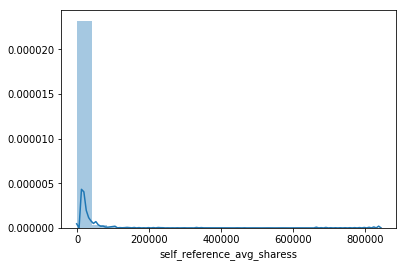

In [113]:
sns.distplot( data['self_reference_avg_sharess'], bins=20)

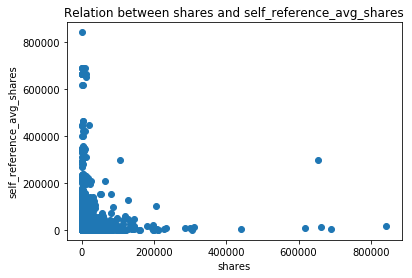

In [114]:
plt.scatter(data['shares'],data['self_reference_avg_sharess'], data=data)
plt.xlabel('shares')
plt.ylabel('self_reference_avg_shares')
plt.title('Relation between shares and self_reference_avg_shares')
plt.show()

In [115]:
data['self_reference_avg_sharess'].describe()

count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64

In [116]:
data[data['self_reference_avg_sharess']>680000]

url  timedelta  \
5504   http://mashable.com/2013/04/17/guy-in-norelco-...        631   
5598   http://mashable.com/2013/04/18/texas-fertilize...        630   
6383        http://mashable.com/2013/05/05/earned-media/        613   
7109   http://mashable.com/2013/05/20/dove-ad-most-wa...        598   
10261            http://mashable.com/2013/07/21/gaymerx/        536   
17319  http://mashable.com/2013/12/10/open-source-int...        394   
27827  http://mashable.com/2014/06/26/student-debt-co...        196   
28702  http://mashable.com/2014/07/11/amazon-faa-perm...        181   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
5504                9               132         0.704545               1.0   
5598               10               681         0.499241               1.0   
6383               12               662         0.493865               1.0   
7109                9               299         0.559322               1.0   
10261              11               486         0.569915               1.0   
17319              11               165         0.697531               1.0   
27827              13               261         0.536680               1.0   
28702              10               945         0.497840               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
5504                   0.818182          1               1         0  ...   
5598                   0.703325         19               1        13  ...   
6383                   0.701613          6               1         1  ...   
7109                   0.731429          4               3         1  ...   
10261                  0.753521         17               3         0  ...   
17319                  0.835052          3               2         0  ...   
27827                  0.571429         20               3        15  ...   
28702                  0.714801          1               1         2  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
5504                0.333333              -1.000000              -1.000000   
5598                0.500000              -0.138194              -0.312500   
6383                1.000000              -0.216358              -0.400000   
7109                0.750000              -0.240278              -0.500000   
10261               1.000000              -0.388492              -1.000000   
17319               0.333333              -0.625000              -0.625000   
27827               0.900000              -0.322917              -0.333333   
28702               1.000000              -0.257788              -1.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
5504               -1.000000                0.00                     0.000   
5598               -0.050000                0.00                     0.000   
6383               -0.066667                0.00                     0.000   
7109               -0.125000                0.50                     0.500   
10261              -0.100000                0.00                     0.000   
17319              -0.625000                0.60                     0.000   
27827              -0.312500                0.75                     0.675   
28702              -0.050000                0.00                     0.000   

       abs_title_subjectivity  abs_title_sentiment_polarity  shares  \
5504                     0.50                         0.000     800   
5598                     0.50                         0.000    1400   
6383                     0.50                         0.000    1800   
7109                     0.00                         0.500    4200   
10261                    0.50                         0.000     728   
17319                    0.10                         0.000    8000   
27827                    0.25                         0.675    4200   
28702                    0.50             

## 30. 'weekday_is_monday'

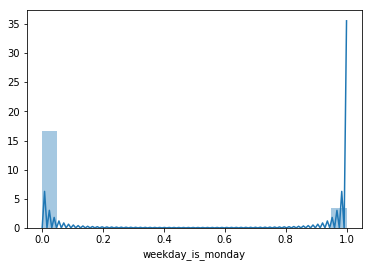

In [117]:
sns.distplot( data['weekday_is_monday'], bins=20)

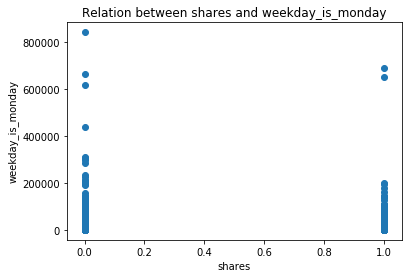

In [118]:
plt.scatter(data['weekday_is_monday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_monday')
plt.title('Relation between shares and weekday_is_monday')
plt.show()

## 31. 'weekday_is_tuesday'

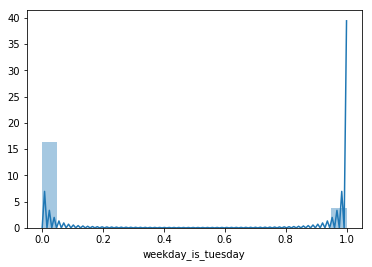

In [119]:
sns.distplot( data['weekday_is_tuesday'], bins=20)

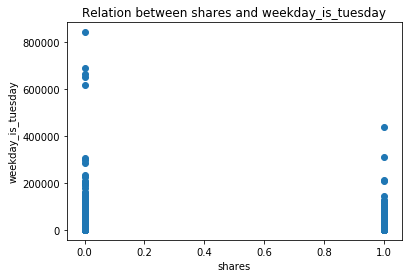

In [120]:
plt.scatter(data['weekday_is_tuesday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_tuesday')
plt.title('Relation between shares and weekday_is_tuesday')
plt.show()

## 32. 'weekday_is_wednesday'

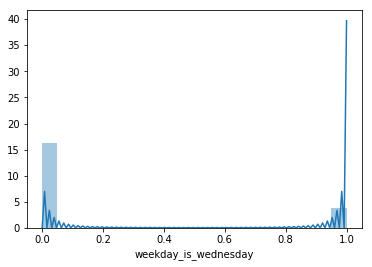

In [121]:
sns.distplot( data['weekday_is_wednesday'], bins=20)

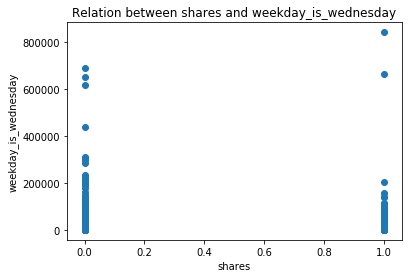

In [122]:
plt.scatter(data['weekday_is_wednesday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_wednesday')
plt.title('Relation between shares and weekday_is_wednesday')
plt.show()

## 33. 'weekday_is_thursday'

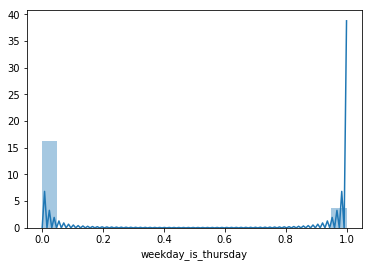

In [123]:
sns.distplot( data['weekday_is_thursday'], bins=20)

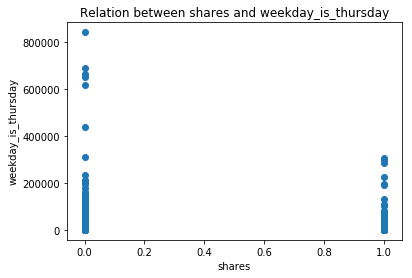

In [124]:
plt.scatter(data['weekday_is_thursday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_thursday')
plt.title('Relation between shares and weekday_is_thursday')
plt.show()

## 34. 'weekday_is_friday'   

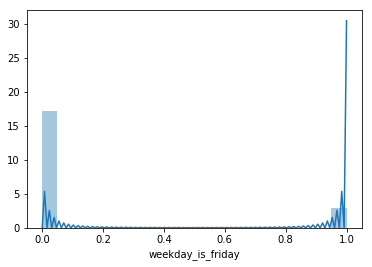

In [125]:
sns.distplot(data['weekday_is_friday'], bins=20)

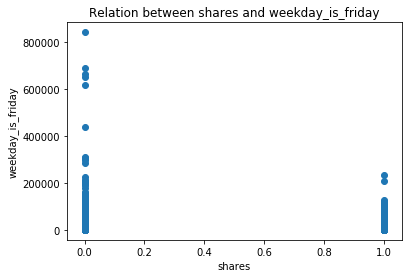

In [126]:
plt.scatter(data['weekday_is_friday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_friday')
plt.title('Relation between shares and weekday_is_friday')
plt.show()

## 35. 'weekday_is_saturday'

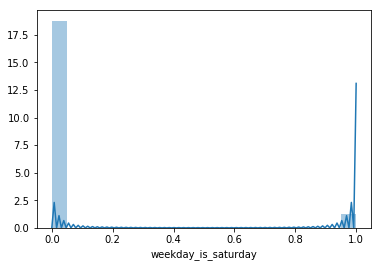

In [127]:
sns.distplot( data['weekday_is_saturday'], bins=20)

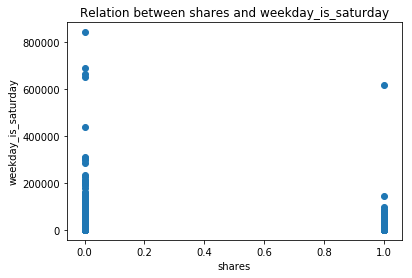

In [128]:
plt.scatter(data['weekday_is_saturday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_saturday')
plt.title('Relation between shares and weekday_is_saturday')
plt.show()

## 36. 'weekday_is_sunday' 

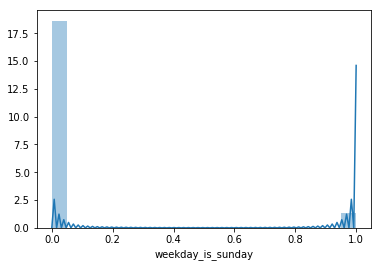

In [129]:
sns.distplot( data['weekday_is_sunday'], bins=20)

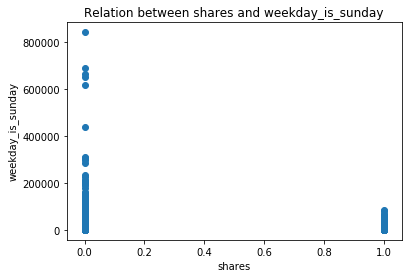

In [130]:
plt.scatter(data['weekday_is_sunday'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('weekday_is_sunday')
plt.title('Relation between shares and weekday_is_sunday')
plt.show()

## 37. 'is_weekend'

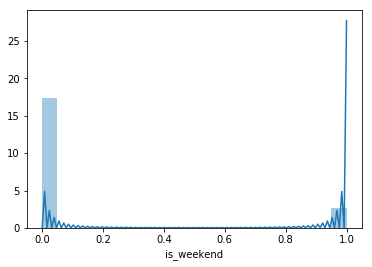

In [131]:
sns.distplot( data['is_weekend'], bins=20)

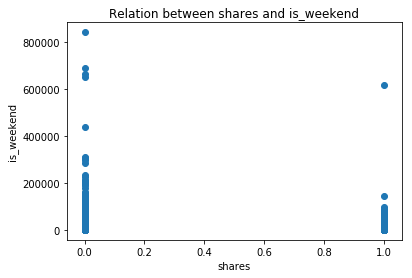

In [132]:
plt.scatter(data['is_weekend'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('is_weekend')
plt.title('Relation between shares and is_weekend')
plt.show()

## 38. 'LDA_00'

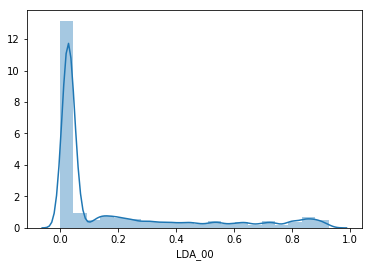

In [133]:
sns.distplot( data['LDA_00'], bins=20)

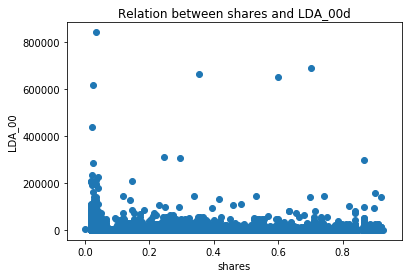

In [134]:
plt.scatter(data['LDA_00'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('LDA_00')
plt.title('Relation between shares and LDA_00d')
plt.show()

##  39. 'LDA_01'

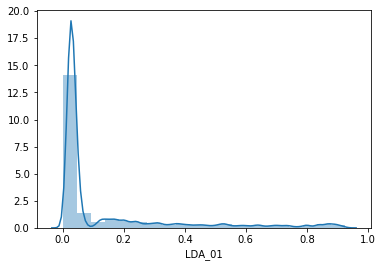

In [135]:
sns.distplot( data['LDA_01'], bins=20)

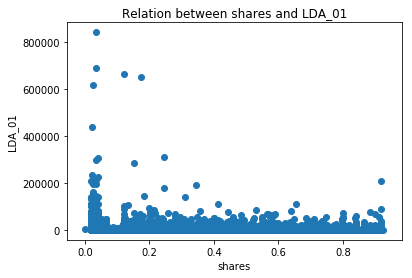

In [136]:
plt.scatter(data['LDA_01'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('LDA_01')
plt.title('Relation between shares and LDA_01')
plt.show()

## 40. 'LDA_02'

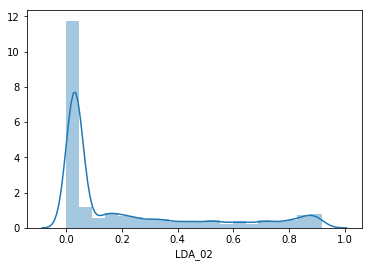

In [137]:
sns.distplot( data['LDA_02'], bins=20)

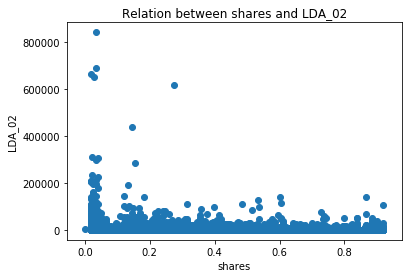

In [138]:
plt.scatter(data['LDA_02'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('LDA_02')
plt.title('Relation between shares and LDA_02')
plt.show()

## 41. 'LDA_03'

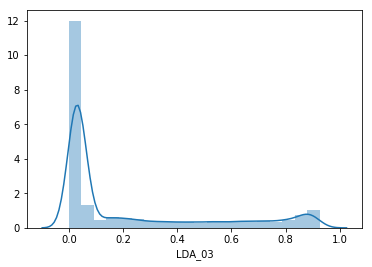

In [139]:
sns.distplot(data['LDA_03'], bins=20)

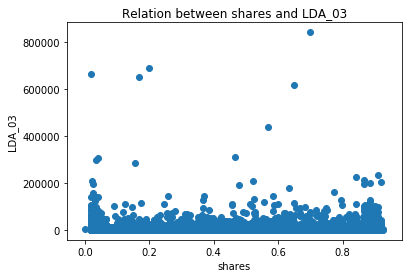

In [140]:
plt.scatter(data['LDA_03'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('LDA_03')
plt.title('Relation between shares and LDA_03')
plt.show()

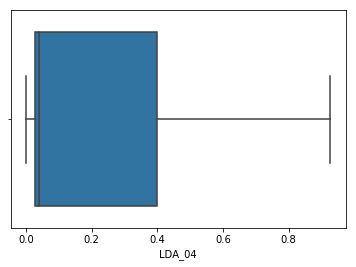

In [14]:
sns.boxplot(data['LDA_04'])

## 42.'LDA_04'

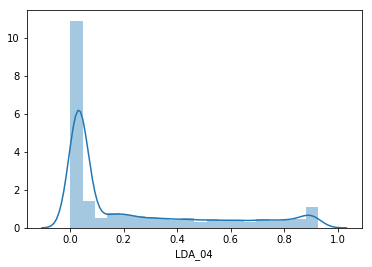

In [141]:
sns.distplot( data['LDA_04'], bins=20)

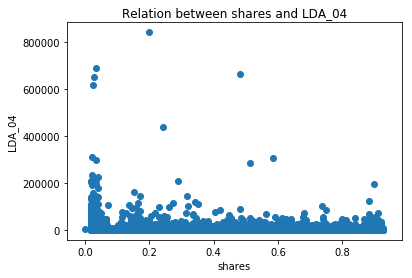

In [142]:
plt.scatter(data['LDA_04'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('LDA_04')
plt.title('Relation between shares and LDA_04')
plt.show()

## 43.'global_subjectivity'

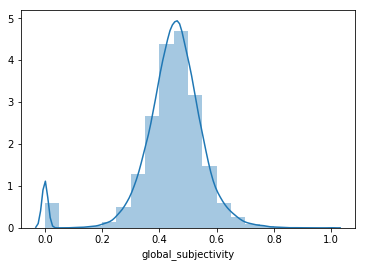

In [143]:
sns.distplot( data['global_subjectivity'], bins=20)

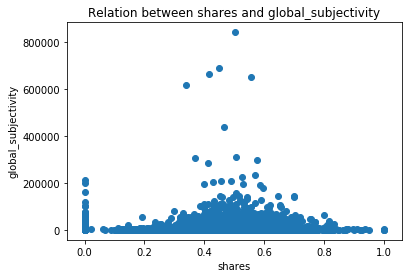

In [144]:
plt.scatter(data['global_subjectivity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('global_subjectivity')
plt.title('Relation between shares and global_subjectivity')
plt.show()

## 44. 'global_sentiment_polarity'

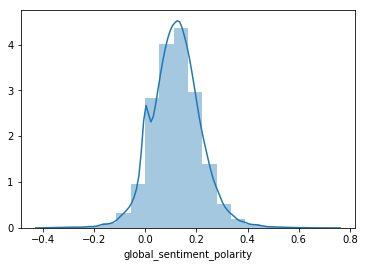

In [145]:
sns.distplot( data['global_sentiment_polarity'], bins=20)

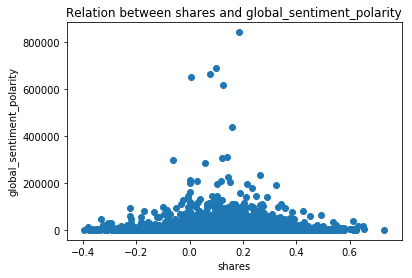

In [146]:
plt.scatter(data['global_sentiment_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('global_sentiment_polarity')
plt.title('Relation between shares and global_sentiment_polarity')
plt.show()

## 45. 'global_rate_positive_words'

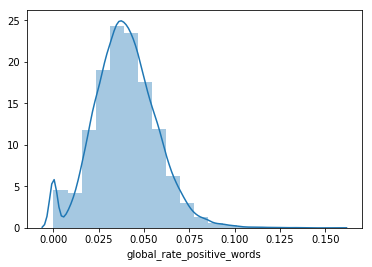

In [147]:
sns.distplot( data['global_rate_positive_words'], bins=20)

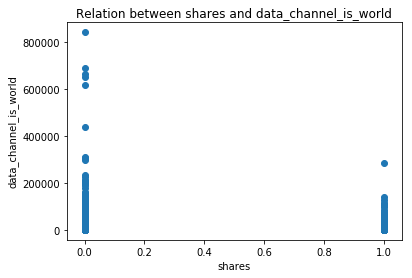

In [148]:
plt.scatter(data['data_channel_is_world'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_world')
plt.title('Relation between shares and data_channel_is_world')
plt.show()

## 46. 'global_rate_negative_words'

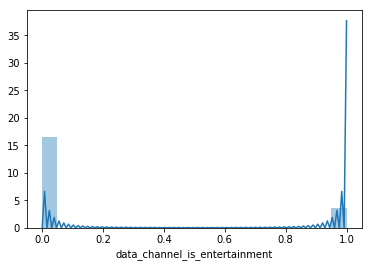

In [149]:
sns.distplot( data['data_channel_is_entertainment'], bins=20)

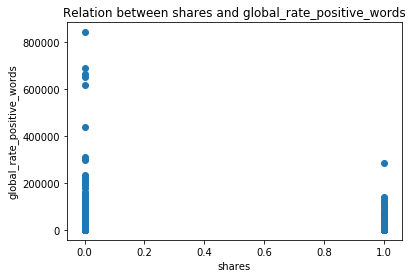

In [150]:
plt.scatter(data['data_channel_is_world'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('global_rate_positive_words')
plt.title('Relation between shares and global_rate_positive_words')
plt.show()

## 47. 'rate_positive_words'

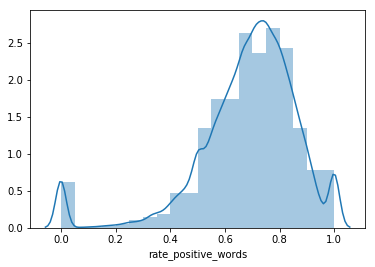

In [151]:
sns.distplot(data['rate_positive_words'], bins=20)

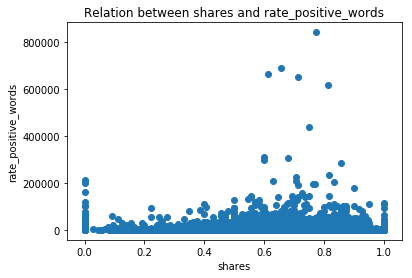

In [152]:
plt.scatter(data['rate_positive_words'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('rate_positive_words')
plt.title('Relation between shares and rate_positive_words')
plt.show()

## 48. 'rate_negative_words'

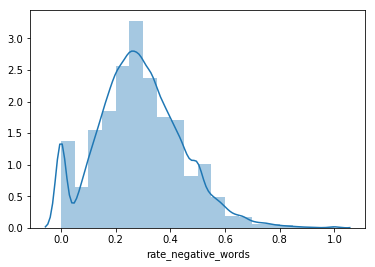

In [153]:
sns.distplot(data['rate_negative_words'], bins=20)

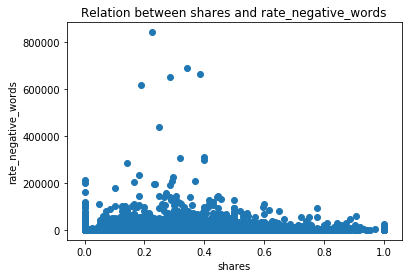

In [154]:
plt.scatter(data['rate_negative_words'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('rate_negative_words')
plt.title('Relation between shares and rate_negative_words')
plt.show()

## 49. 'avg_positive_polarity'

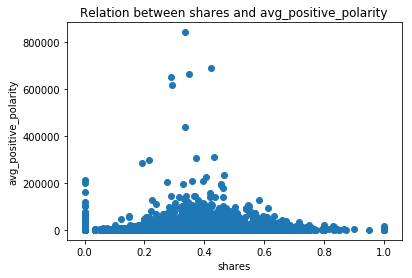

In [155]:
plt.scatter(data['avg_positive_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('avg_positive_polarity')
plt.title('Relation between shares and avg_positive_polarity')
plt.show()

## 50. 'min_positive_polarity'

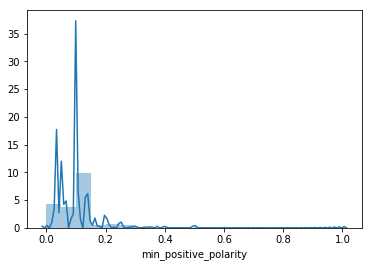

In [156]:
sns.distplot( data['min_positive_polarity'], bins=20)

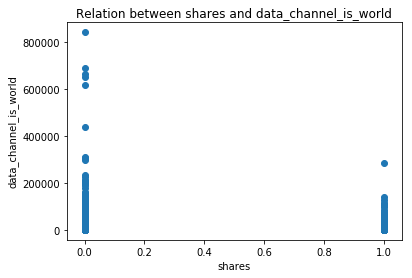

In [157]:
plt.scatter(data['data_channel_is_world'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('data_channel_is_world')
plt.title('Relation between shares and data_channel_is_world')
plt.show()

## 51. 'max_positive_polarity'

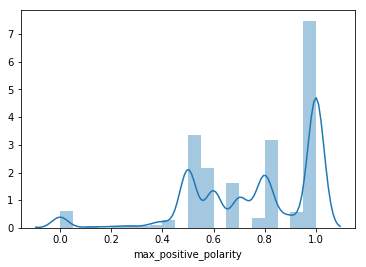

In [158]:
sns.distplot( data['max_positive_polarity'], bins=20)

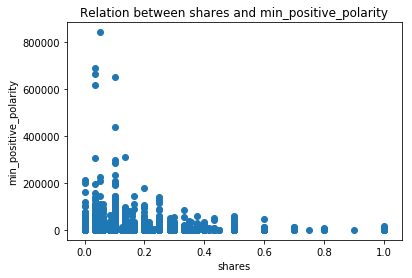

In [159]:
plt.scatter(data['min_positive_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('min_positive_polarity')
plt.title('Relation between shares and min_positive_polarity')
plt.show()

## 52. 'avg_negative_polarity'

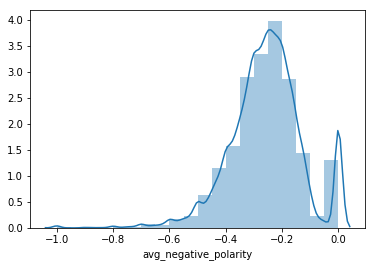

In [160]:
sns.distplot( data['avg_negative_polarity'], bins=20)

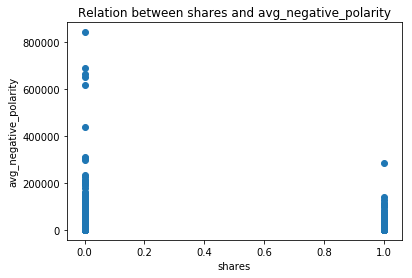

In [161]:
plt.scatter(data['data_channel_is_world'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('avg_negative_polarity')
plt.title('Relation between shares and avg_negative_polarity')
plt.show()

In [ ]:
count

## 53. 'min_negative_polarity'

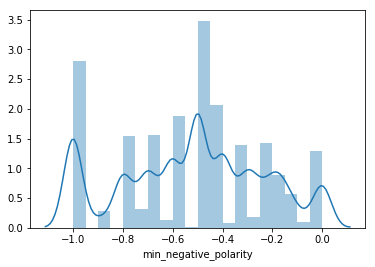

In [162]:
sns.distplot(data['min_negative_polarity'], bins=20)

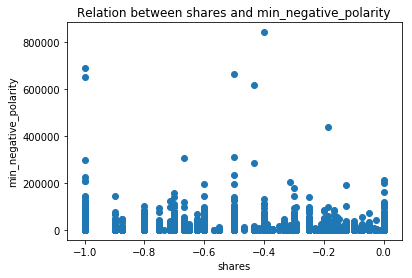

In [163]:
plt.scatter(data['min_negative_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('min_negative_polarity')
plt.title('Relation between shares and min_negative_polarity')
plt.show()

## 54. 'max_negative_polarity'

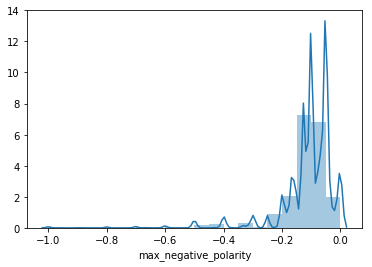

In [164]:
sns.distplot( data['max_negative_polarity'], bins=20)

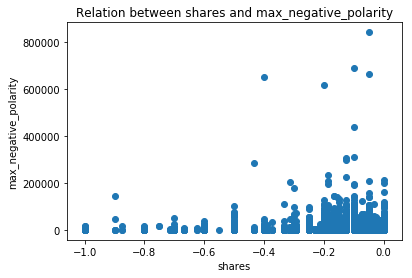

In [165]:
plt.scatter(data['max_negative_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('max_negative_polarity')
plt.title('Relation between shares and max_negative_polarity')
plt.show()

## 55. 'title_subjectivity'

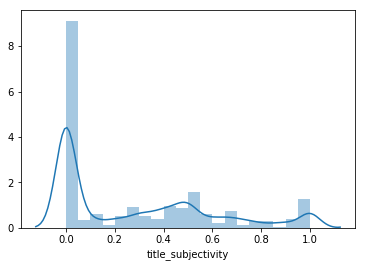

In [166]:
sns.distplot( data['title_subjectivity'], bins=20)

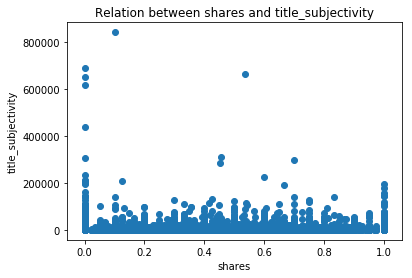

In [167]:
plt.scatter(data['title_subjectivity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('title_subjectivity')
plt.title('Relation between shares and title_subjectivity')
plt.show()

## 56. 'title_sentiment_polarity'

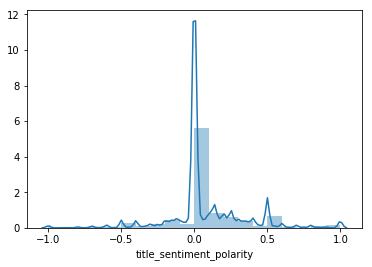

In [168]:
sns.distplot( data['title_sentiment_polarity'], bins=20)

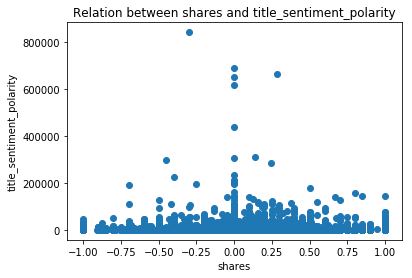

In [169]:
plt.scatter(data['title_sentiment_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('title_sentiment_polarity')
plt.title('Relation between shares and title_sentiment_polarity')
plt.show()

## 57. 'abs_title_subjectivity'    

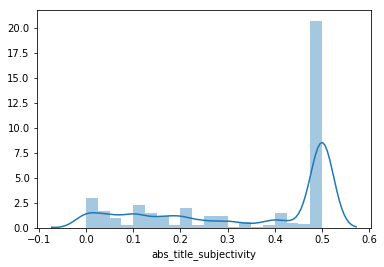

In [170]:
sns.distplot(data['abs_title_subjectivity'], bins=20)

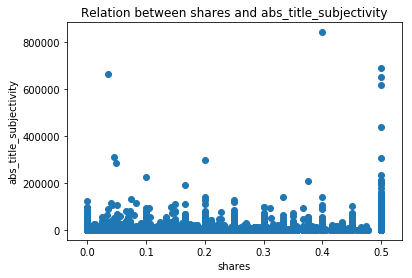

In [171]:
plt.scatter(data['abs_title_subjectivity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('abs_title_subjectivity')
plt.title('Relation between shares and abs_title_subjectivity')
plt.show()

## 58. 'abs_title_sentiment_polarity'

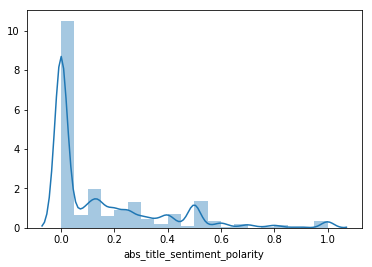

In [172]:
sns.distplot( data['abs_title_sentiment_polarity'], bins=20)

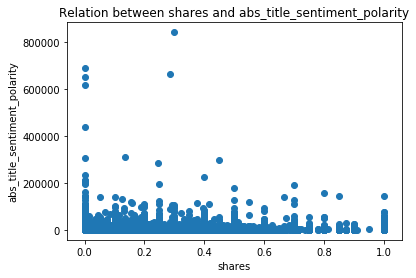

In [173]:
plt.scatter(data['abs_title_sentiment_polarity'], data['shares'],data=data)
plt.xlabel('shares')
plt.ylabel('abs_title_sentiment_polarity')
plt.title('Relation between shares and abs_title_sentiment_polarity')
plt.show()

## checking out ouliers using boxplot 

In [5]:
data=data.drop('url',axis=1)

In [6]:
col=data.columns

In [7]:
def bivar(col):
    print("_______________________________________________________________________")
    print()
    print()
    print("*************Univariate Analysis*****************")
    print()
    print()
    print(col.describe())
    print()
    print()
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.boxplot(col)
    plt.subplot(132)    
    sns.distplot(col)    
    plt.subplot(133)
    sns.violinplot(x = col)
    plt.show()
    print()
    print()
    print("*************Bivariate Analysis*****************")
    print()
    print()
    fig = plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.scatterplot(x=col,y=data['shares'])
    if col.nunique()<=5:
        plt.subplot(122)
        sns.countplot(col)        
        print(pd.DataFrame(col.value_counts().head()))
        print()
        print()        
    plt.show()
    temp=col.corr(data['shares'])
    print()
    print()
    print("The Corelation between Target Column and Input Column is : ",temp)
    print()
    print()

_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64






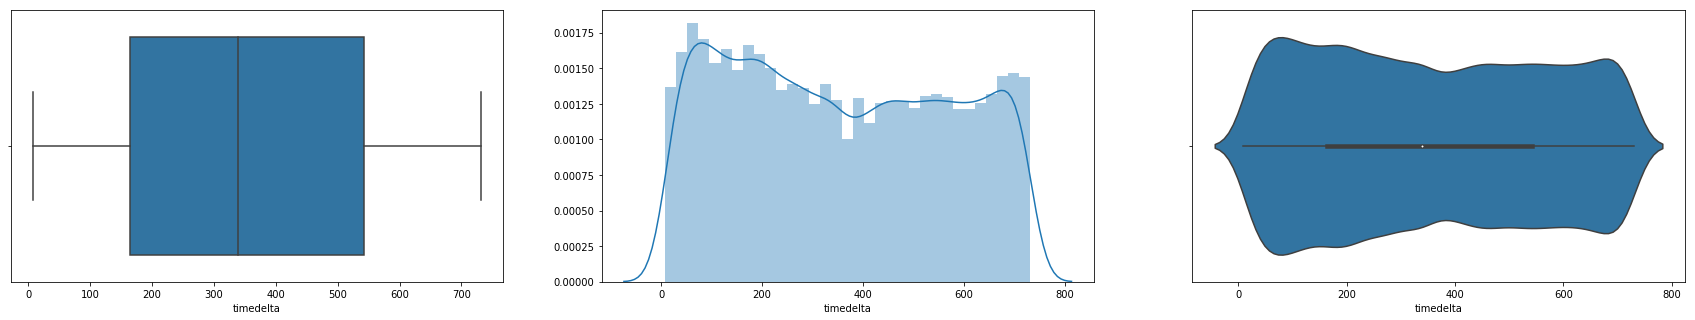



*************Bivariate Analysis*****************




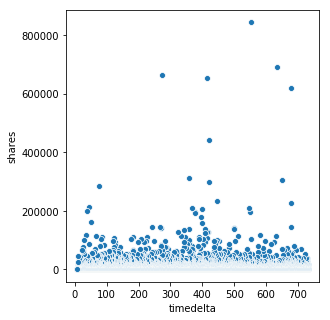



The Corelation between Target Column and Input Column is :  0.008662287711262545


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64






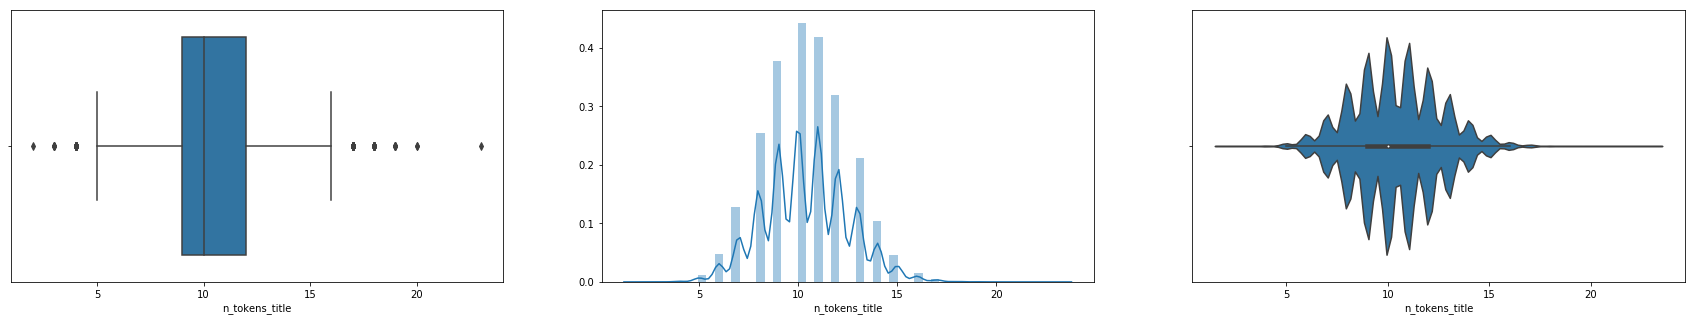



*************Bivariate Analysis*****************




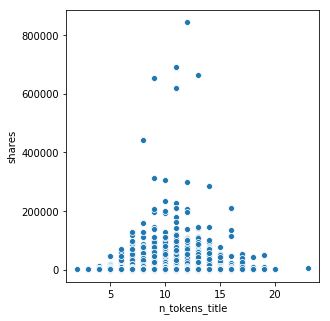



The Corelation between Target Column and Input Column is :  0.00878311884181902


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64






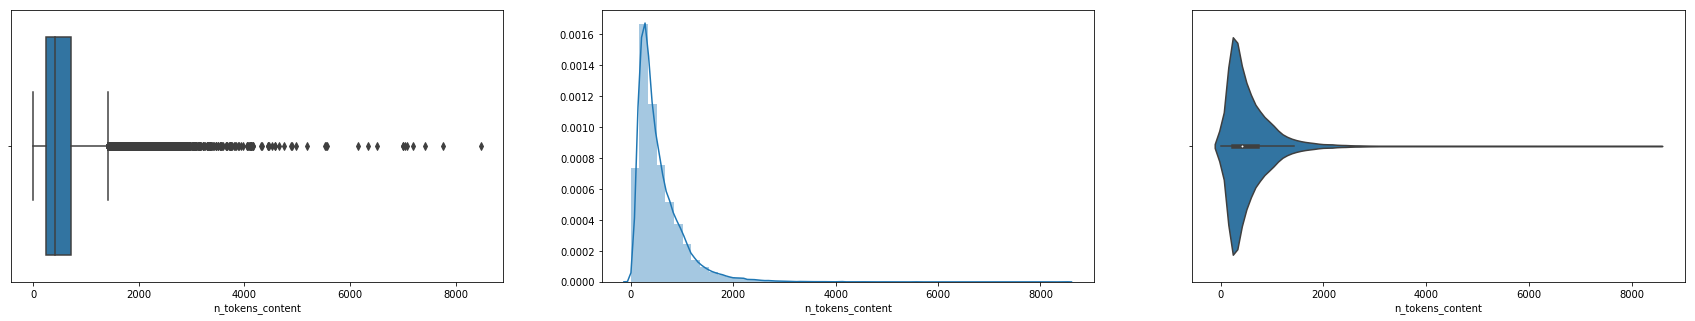



*************Bivariate Analysis*****************




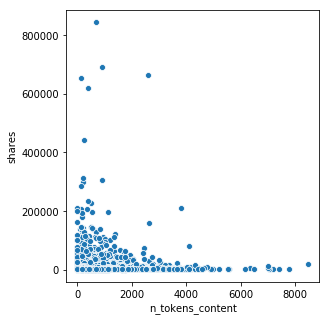



The Corelation between Target Column and Input Column is :  0.0024589843450908426


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64






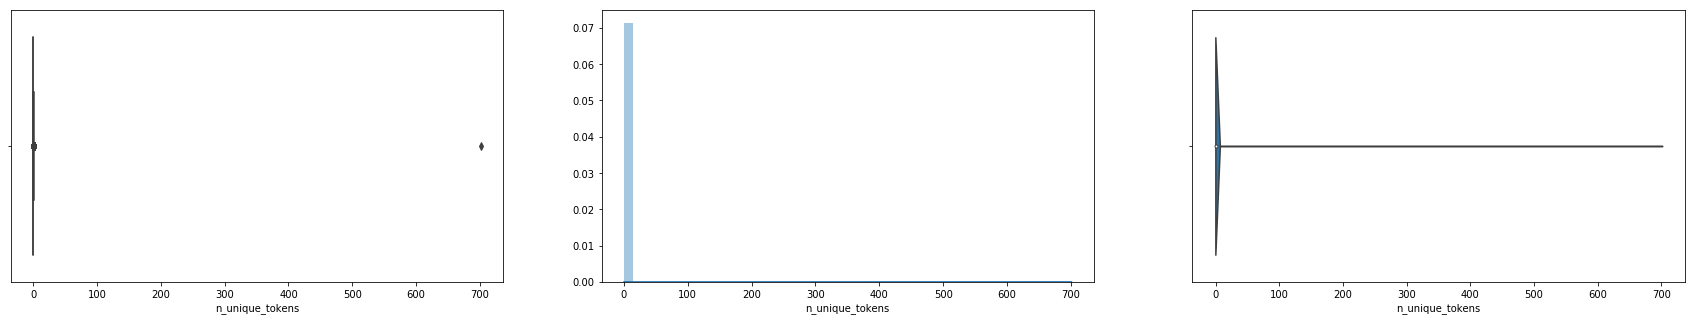



*************Bivariate Analysis*****************




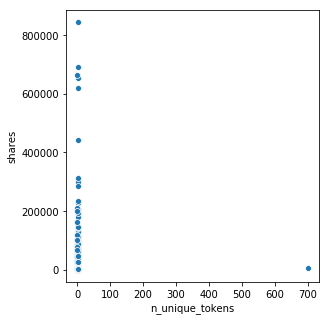



The Corelation between Target Column and Input Column is :  0.0008063456614799162


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64






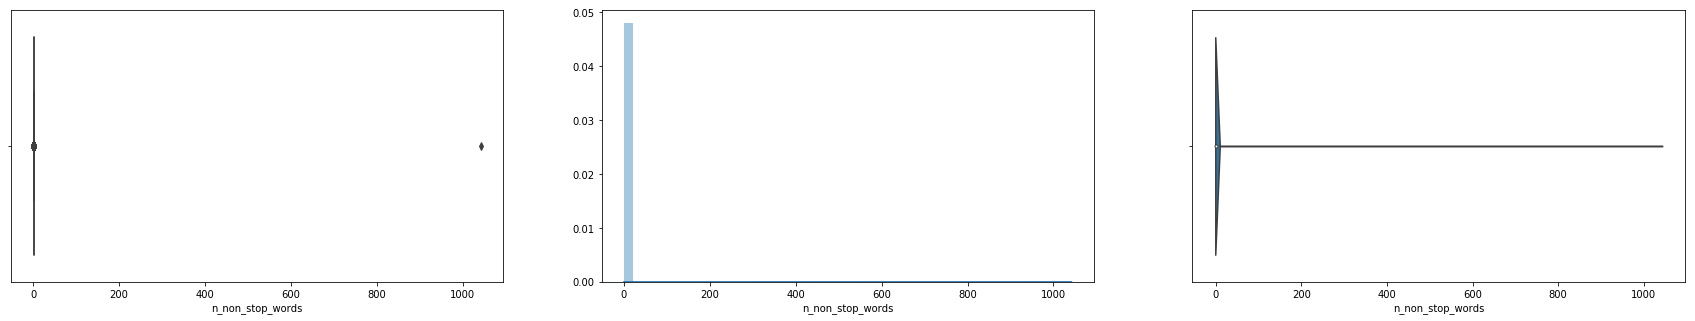



*************Bivariate Analysis*****************




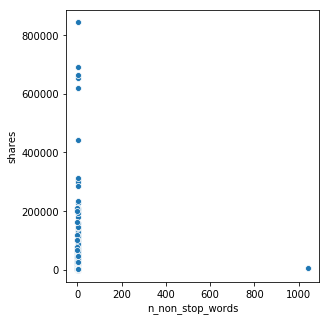



The Corelation between Target Column and Input Column is :  0.0004429416174394546


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64






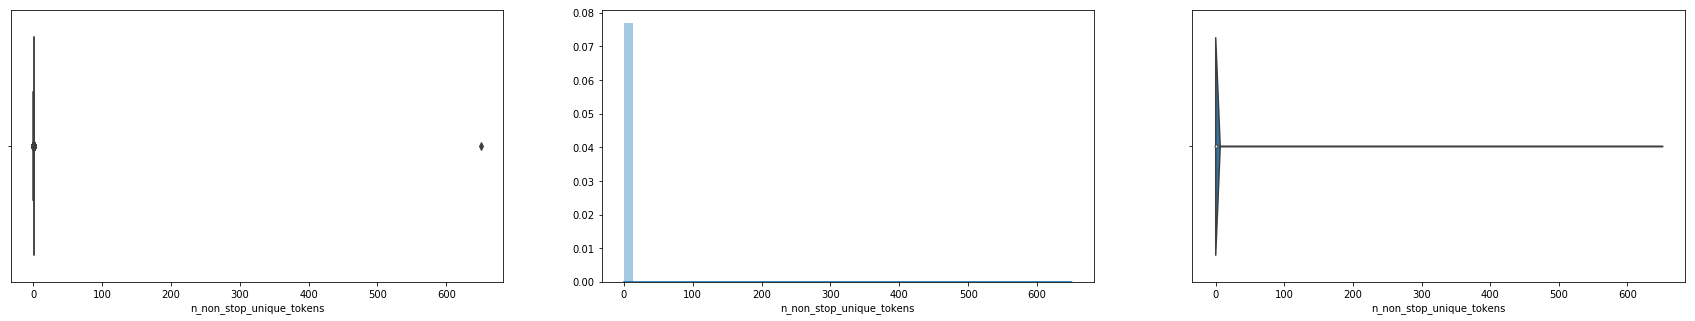



*************Bivariate Analysis*****************




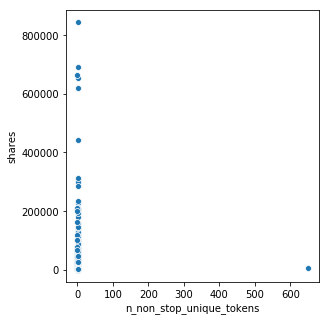



The Corelation between Target Column and Input Column is :  0.00011417193813487008


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64






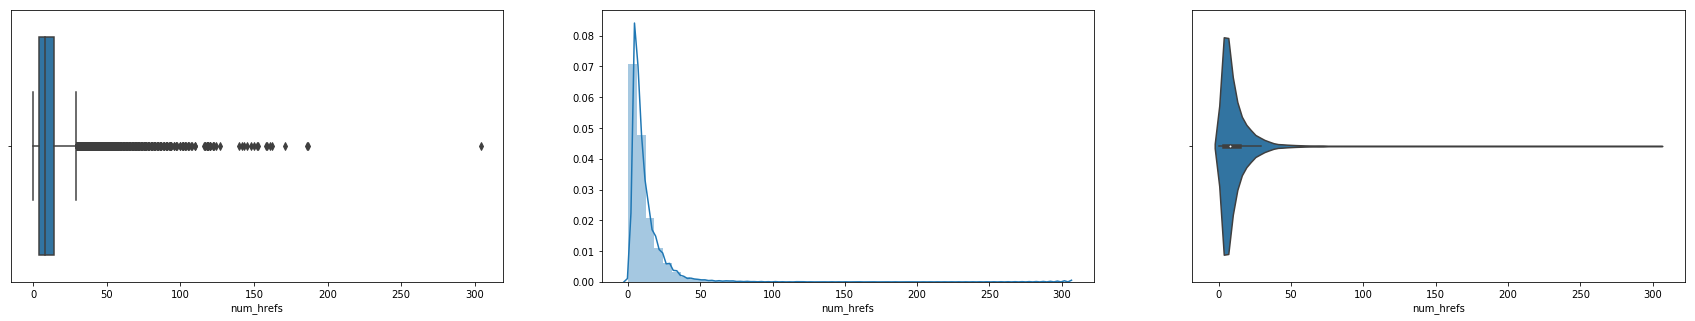



*************Bivariate Analysis*****************




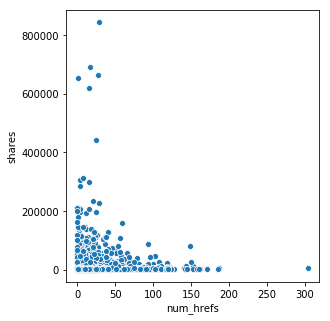



The Corelation between Target Column and Input Column is :  0.04540400840592806


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64






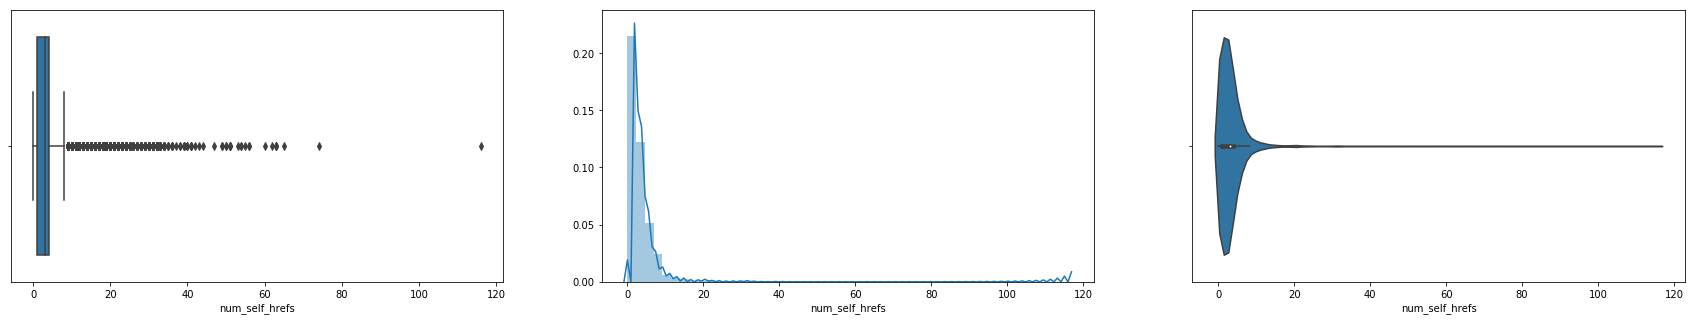



*************Bivariate Analysis*****************




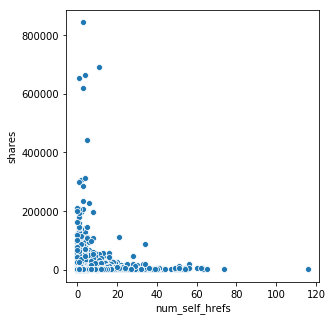



The Corelation between Target Column and Input Column is :  -0.0019004033728369568


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64






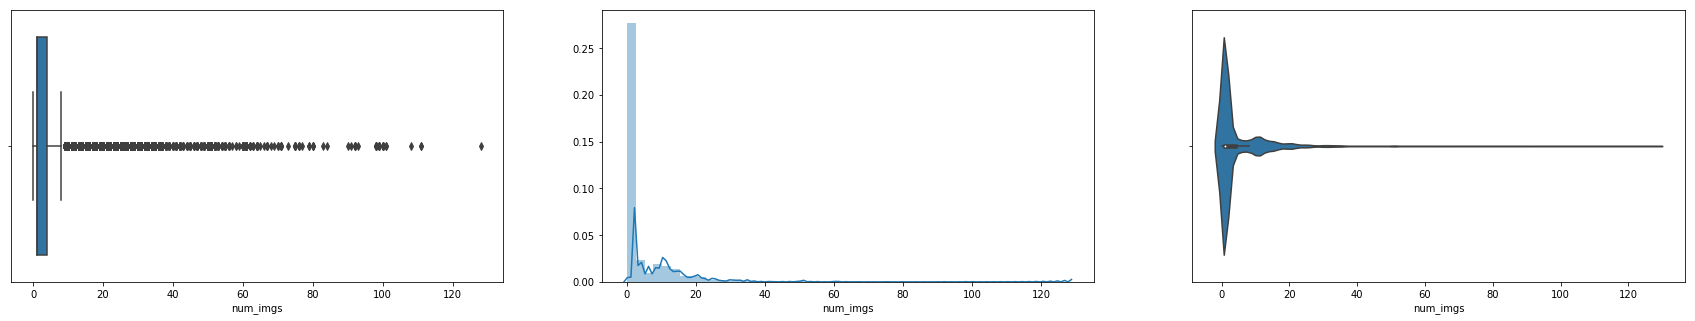



*************Bivariate Analysis*****************




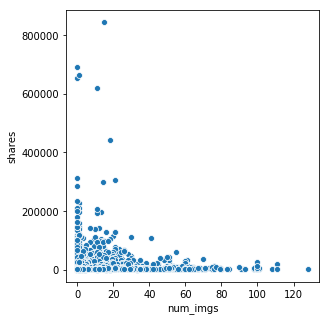



The Corelation between Target Column and Input Column is :  0.039387597847628734


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64






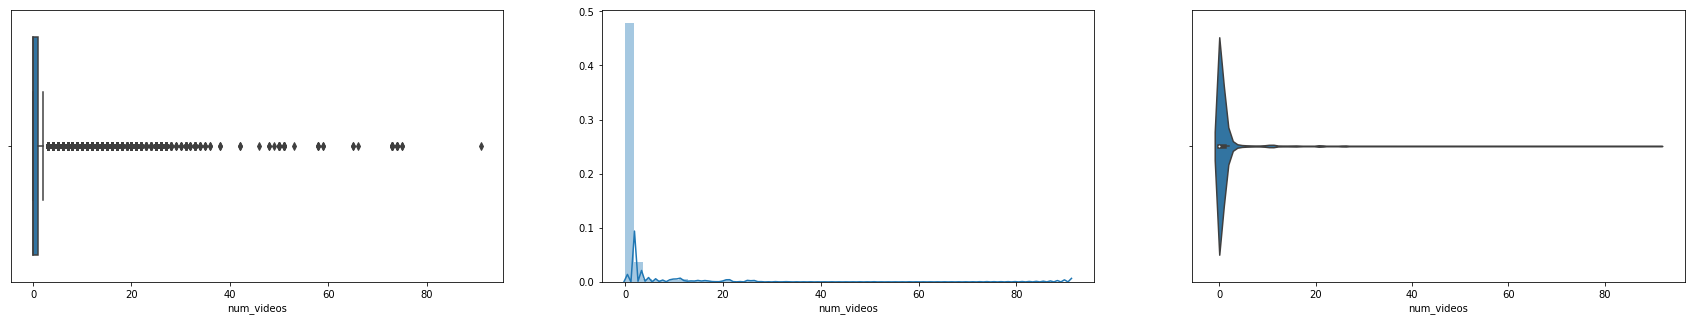



*************Bivariate Analysis*****************




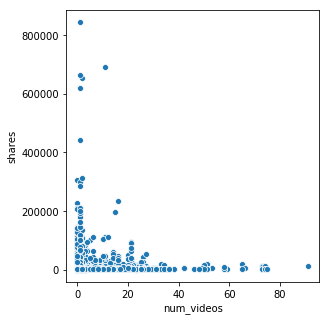



The Corelation between Target Column and Input Column is :  0.023936069530131002


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64






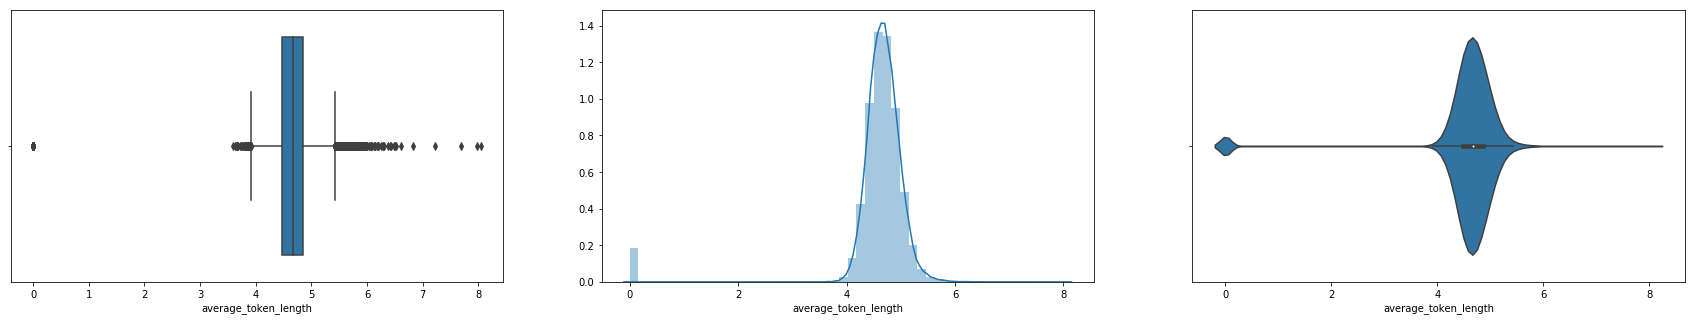



*************Bivariate Analysis*****************




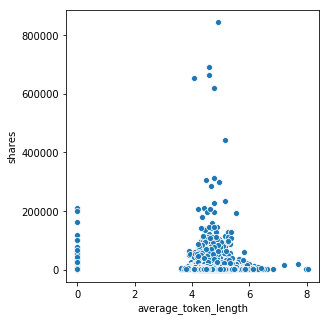



The Corelation between Target Column and Input Column is :  -0.02200729806003892


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64






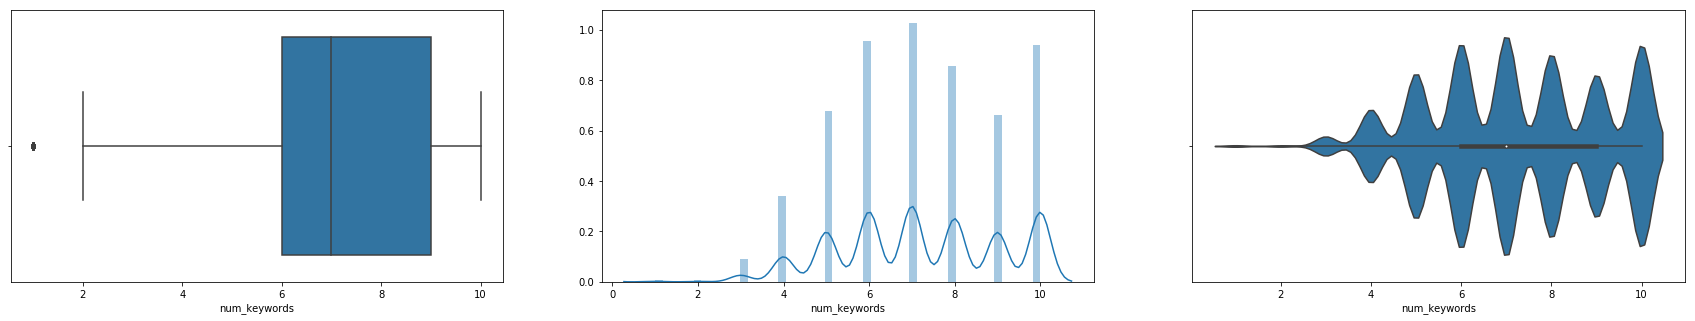



*************Bivariate Analysis*****************




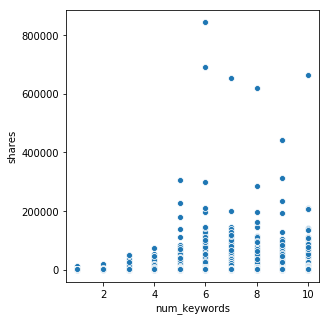



The Corelation between Target Column and Input Column is :  0.021818227151875088


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.052946
std          0.223929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_lifestyle, dtype: float64






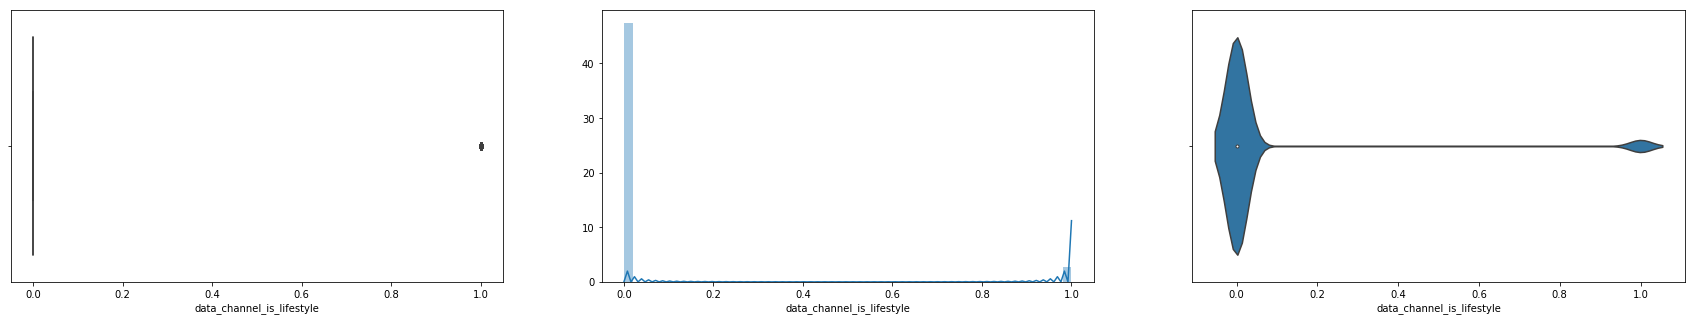



*************Bivariate Analysis*****************


   data_channel_is_lifestyle
0                      37545
1                       2099




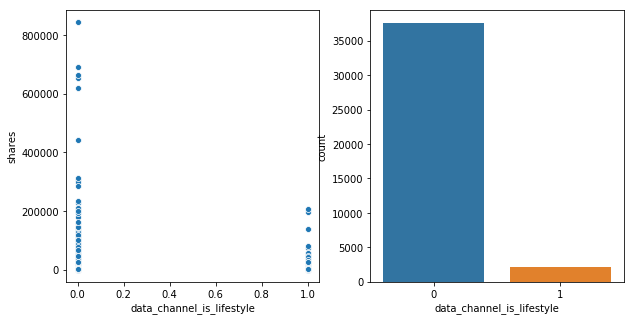



The Corelation between Target Column and Input Column is :  0.00583126730654684


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.178009
std          0.382525
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_entertainment, dtype: float64






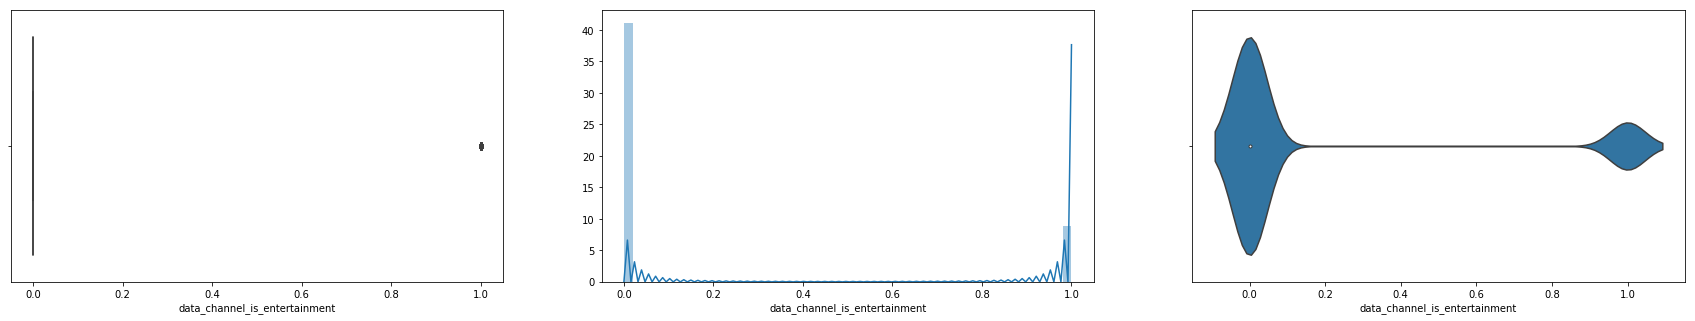



*************Bivariate Analysis*****************


   data_channel_is_entertainment
0                          32587
1                           7057




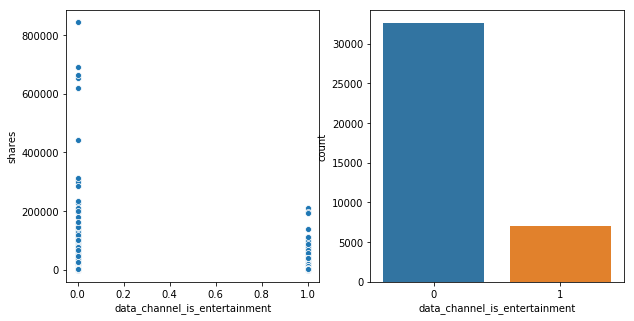



The Corelation between Target Column and Input Column is :  -0.017006198429558257


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.157855
std          0.364610
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_bus, dtype: float64






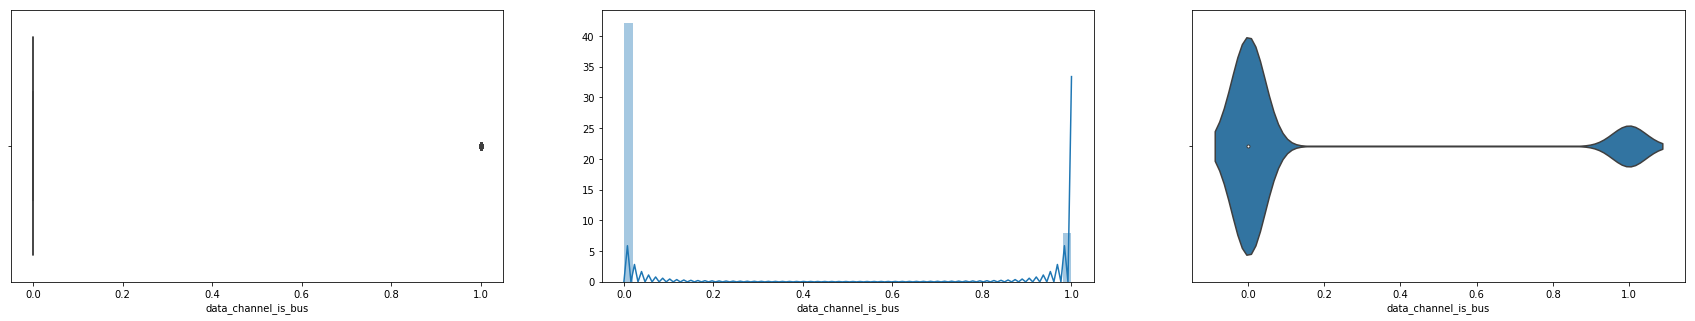



*************Bivariate Analysis*****************


   data_channel_is_bus
0                33386
1                 6258




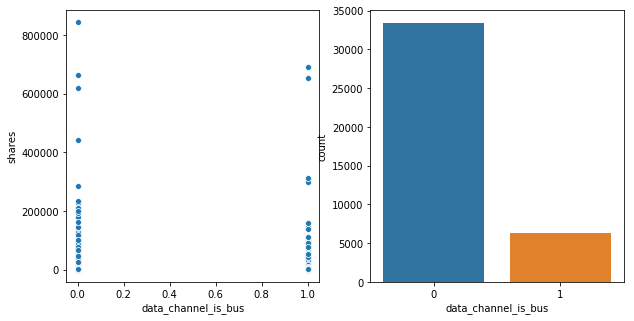



The Corelation between Target Column and Input Column is :  -0.012376166187936001


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.058597
std          0.234871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_socmed, dtype: float64






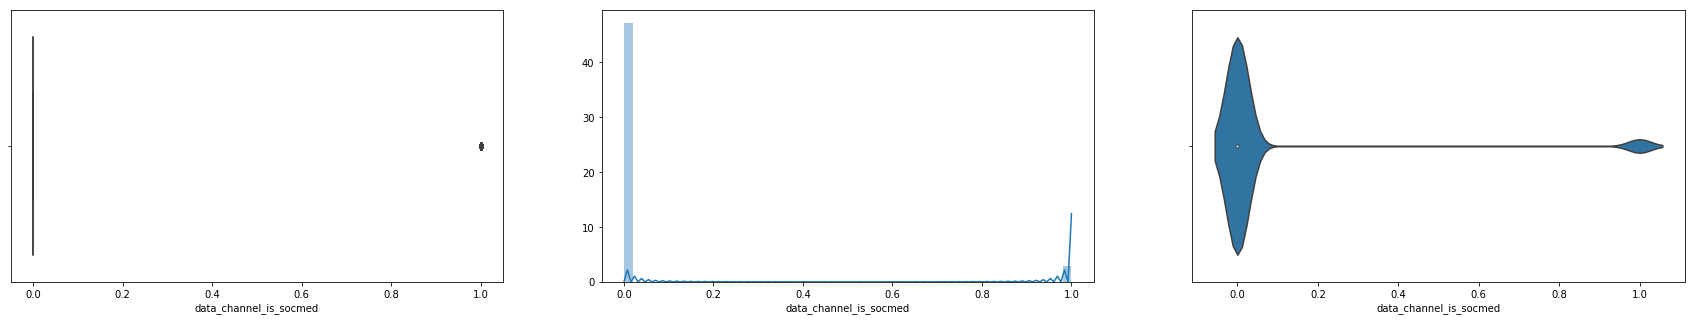



*************Bivariate Analysis*****************


   data_channel_is_socmed
0                   37321
1                    2323




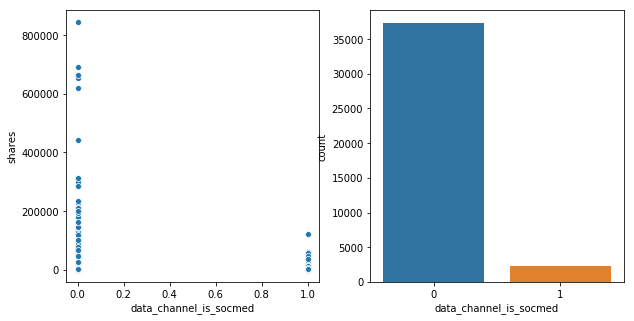



The Corelation between Target Column and Input Column is :  0.005021216306495155


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.185299
std          0.388545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_tech, dtype: float64






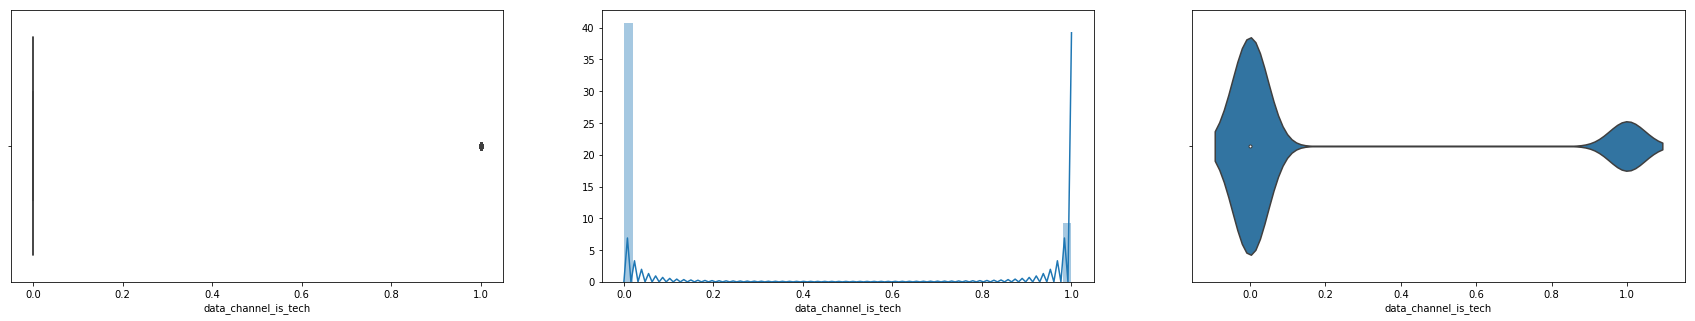



*************Bivariate Analysis*****************


   data_channel_is_tech
0                 32298
1                  7346




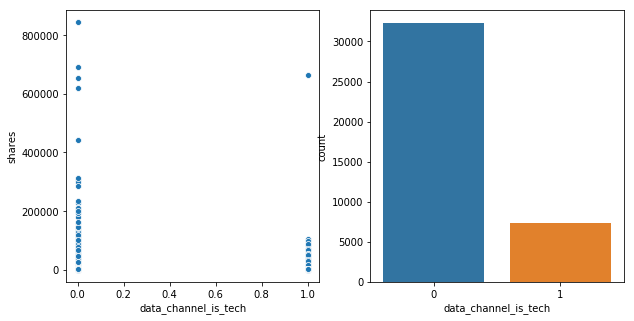



The Corelation between Target Column and Input Column is :  -0.013252874428024511


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.212567
std          0.409129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: data_channel_is_world, dtype: float64






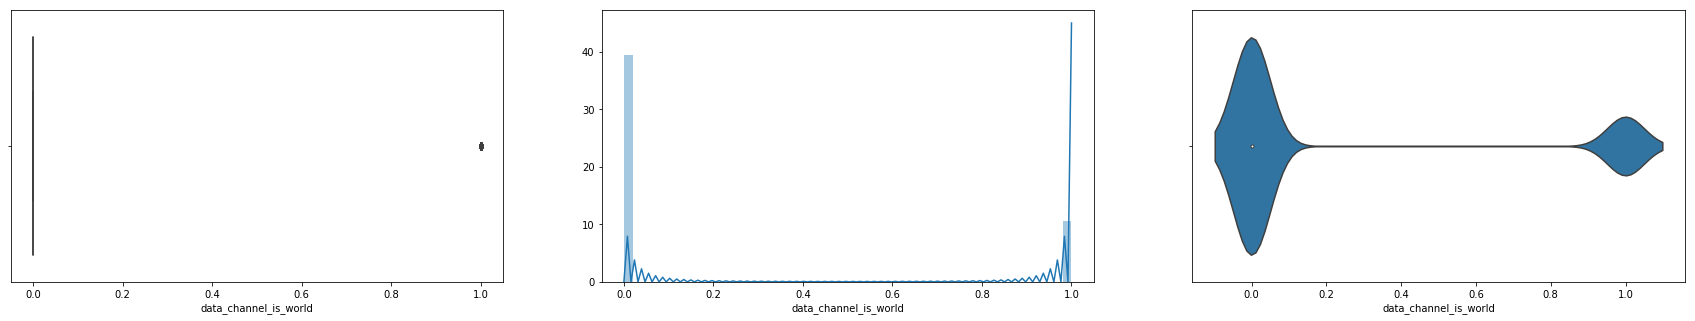



*************Bivariate Analysis*****************


   data_channel_is_world
0                  31217
1                   8427




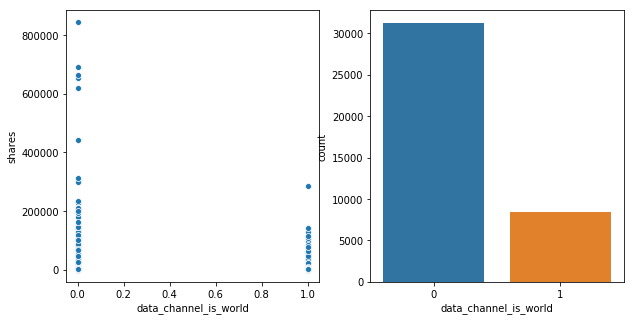



The Corelation between Target Column and Input Column is :  -0.04949730893119846


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64






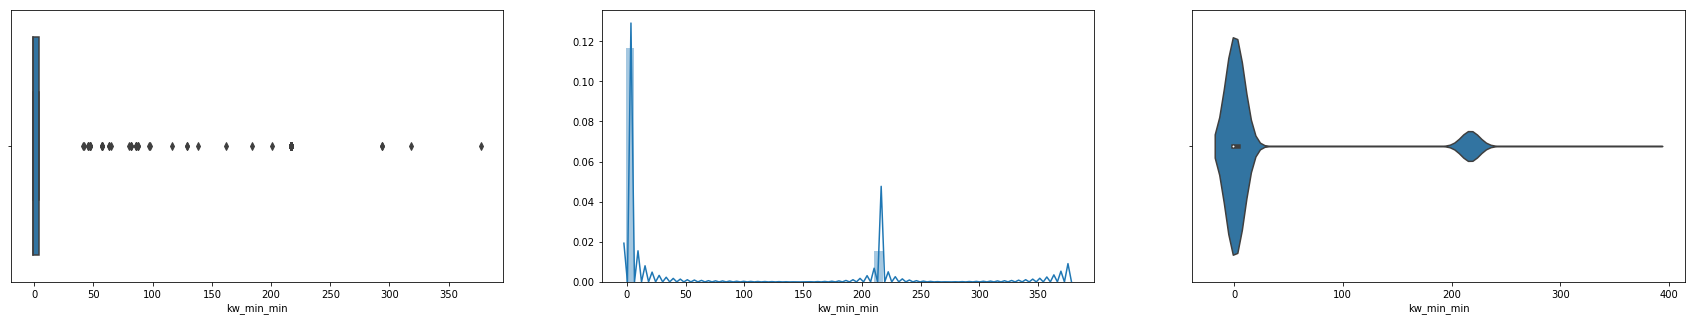



*************Bivariate Analysis*****************




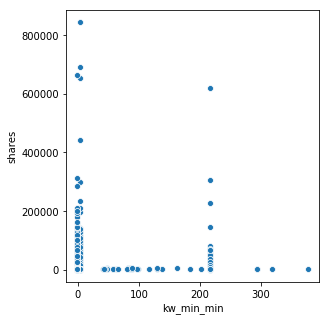



The Corelation between Target Column and Input Column is :  -0.0010509877309311817


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64






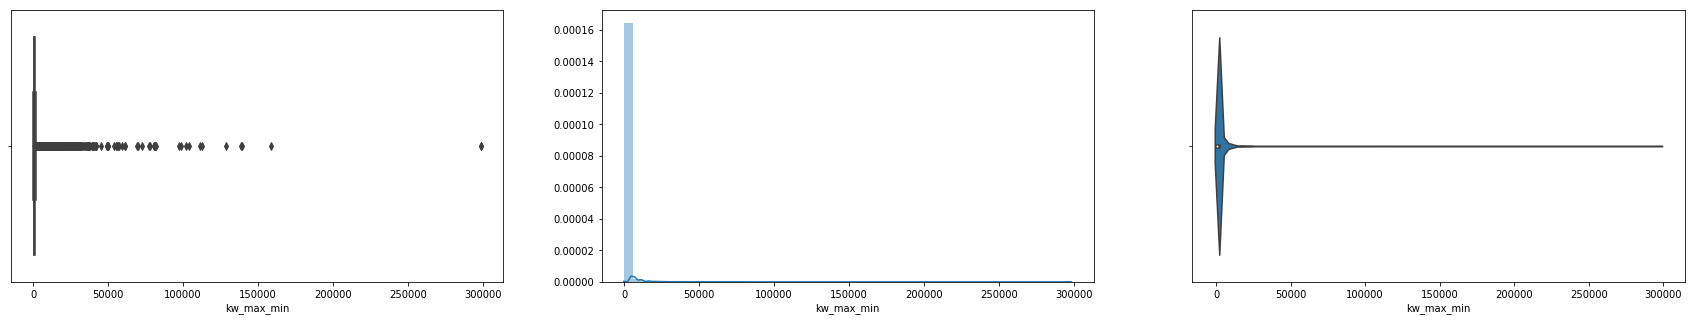



*************Bivariate Analysis*****************




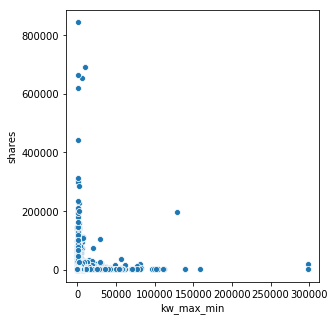



The Corelation between Target Column and Input Column is :  0.030113936670928234


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857140
Name: kw_avg_min, dtype: float64






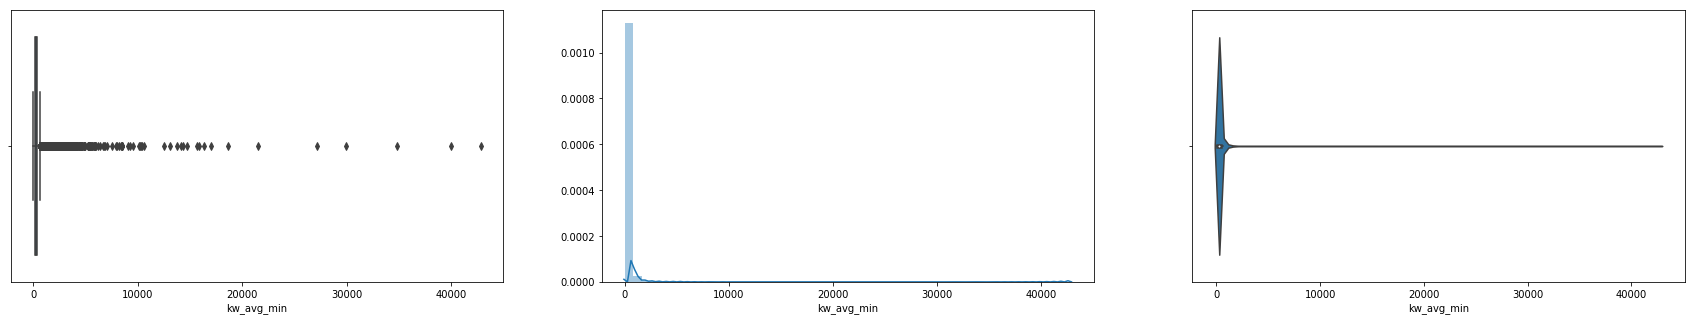



*************Bivariate Analysis*****************




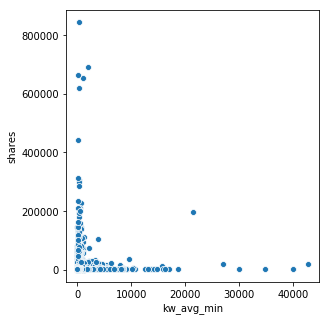



The Corelation between Target Column and Input Column is :  0.03040554741642695


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64






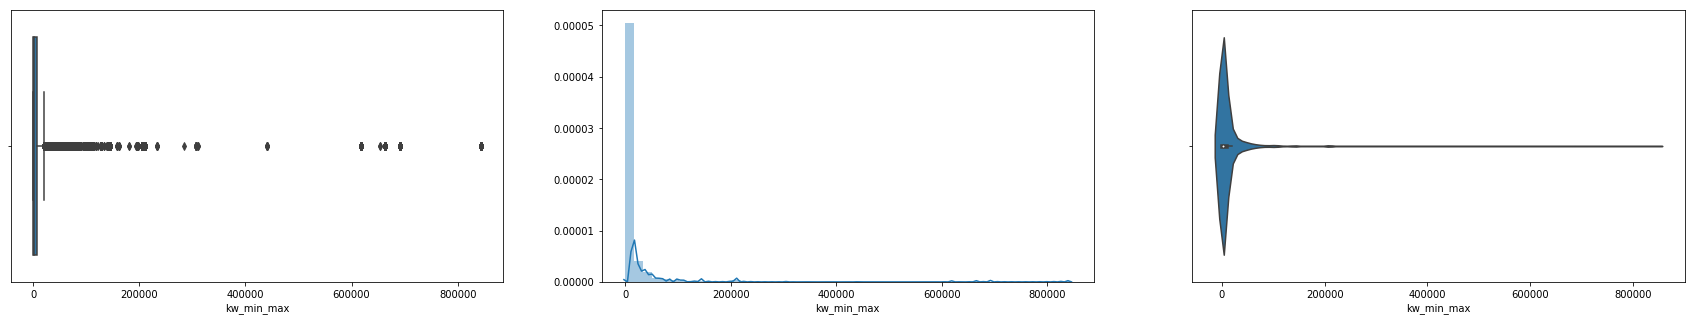



*************Bivariate Analysis*****************




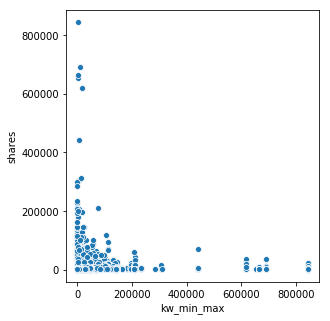



The Corelation between Target Column and Input Column is :  0.003901431977032077


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64






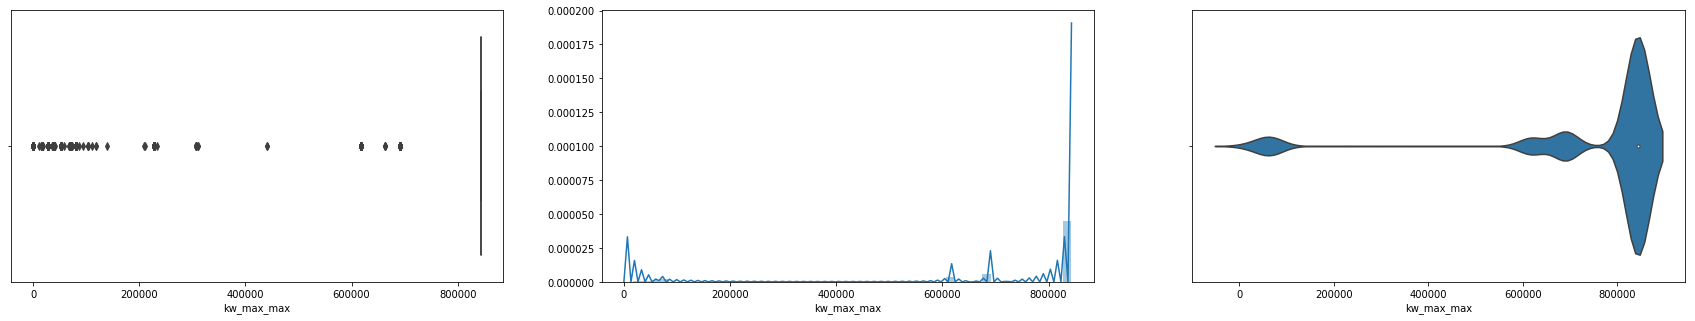



*************Bivariate Analysis*****************




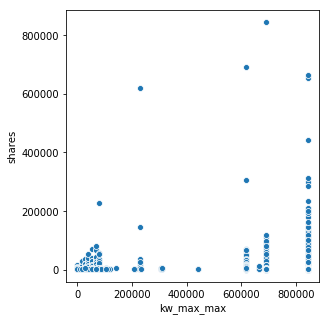



The Corelation between Target Column and Input Column is :  0.007862569278242302


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222250
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64






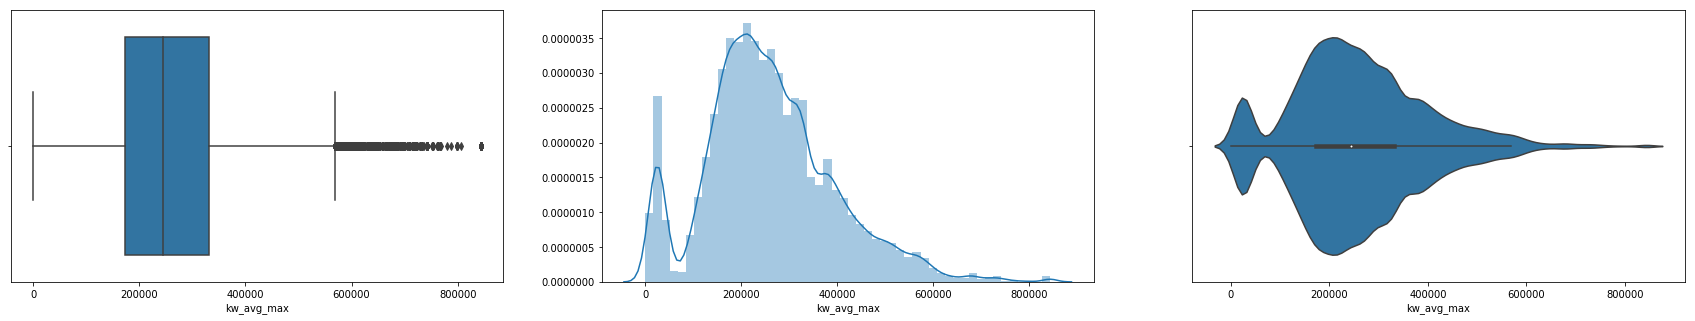



*************Bivariate Analysis*****************




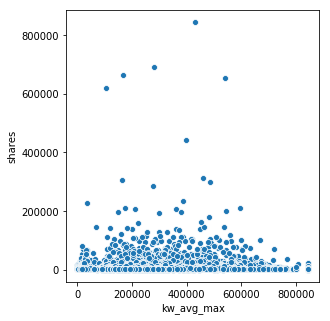



The Corelation between Target Column and Input Column is :  0.04468584480956024


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean      1117.146610
std       1137.456951
min         -1.000000
25%          0.000000
50%       1023.635611
75%       2056.781031
max       3613.039820
Name: kw_min_avg, dtype: float64






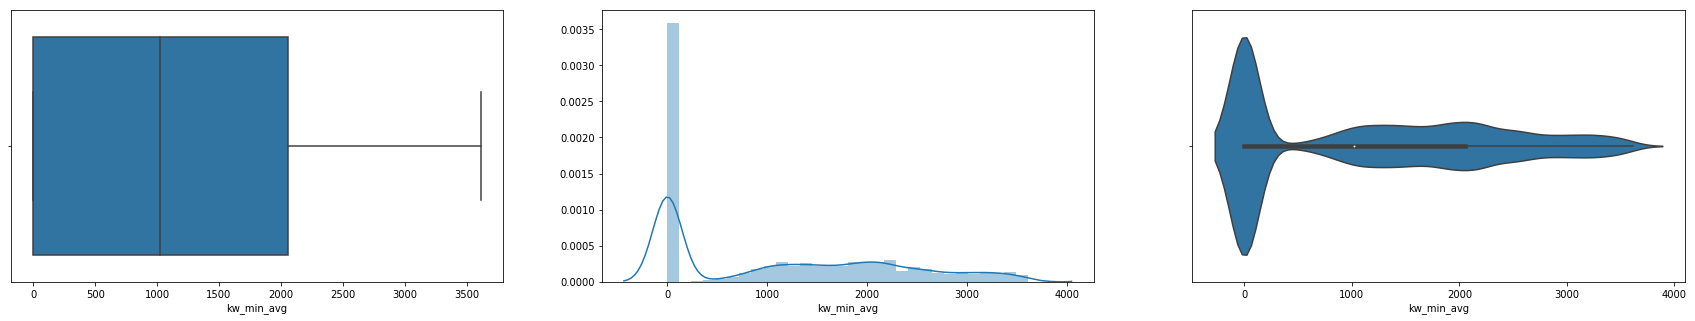



*************Bivariate Analysis*****************




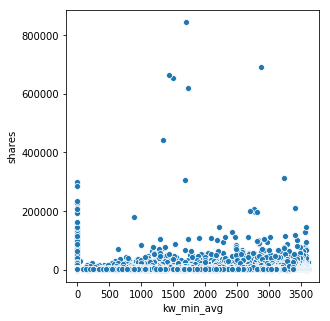



The Corelation between Target Column and Input Column is :  0.03955069447824312


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64






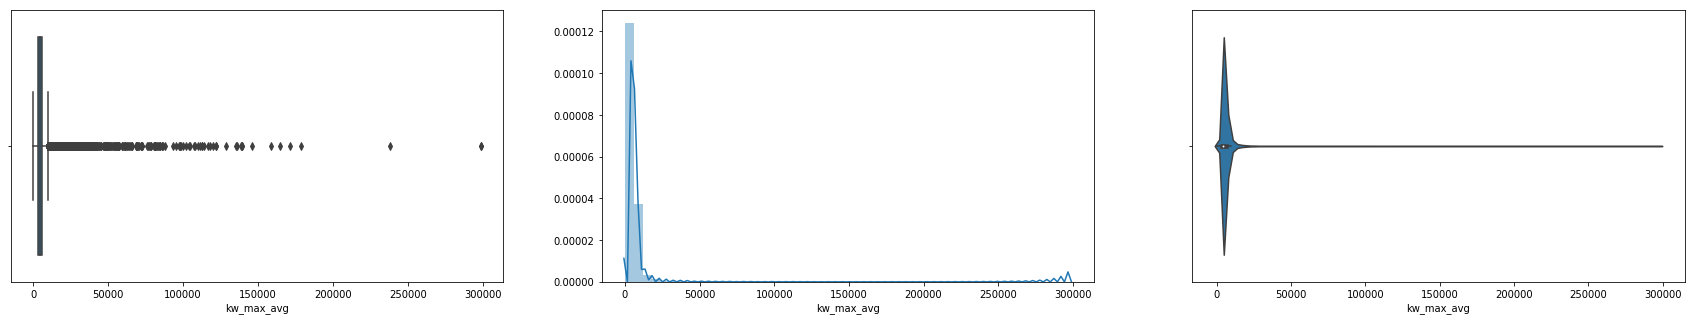



*************Bivariate Analysis*****************




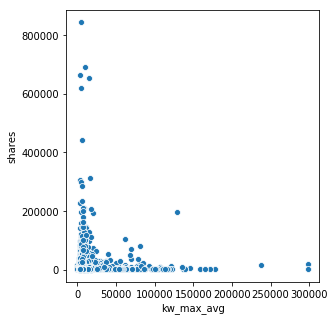



The Corelation between Target Column and Input Column is :  0.06430586384763805


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448565
50%       2870.074878
75%       3600.229564
max      43567.659950
Name: kw_avg_avg, dtype: float64






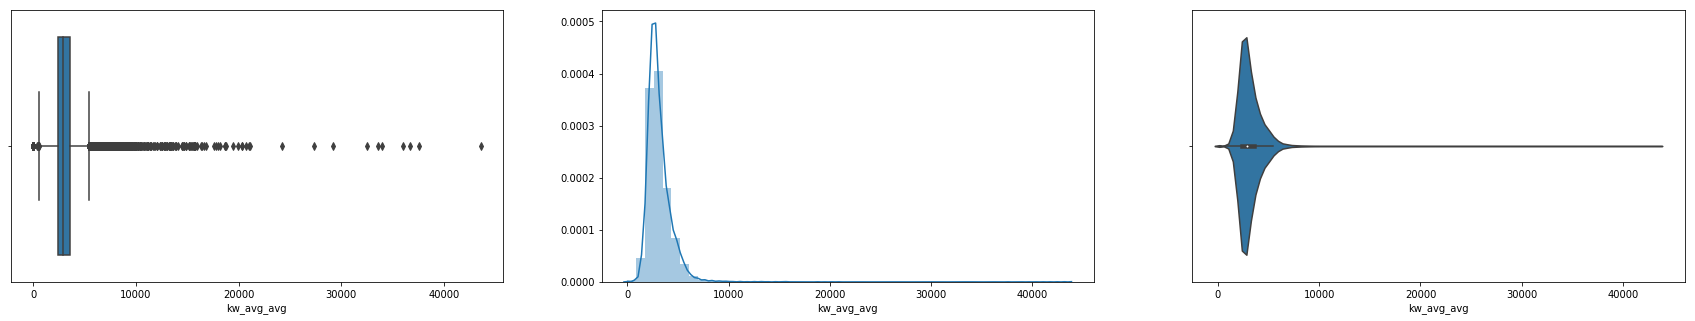



*************Bivariate Analysis*****************




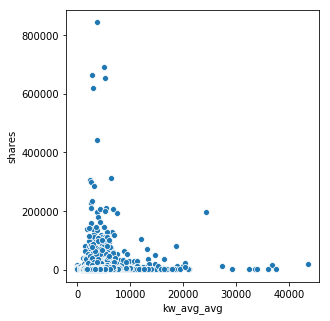



The Corelation between Target Column and Input Column is :  0.1104128627094625


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64






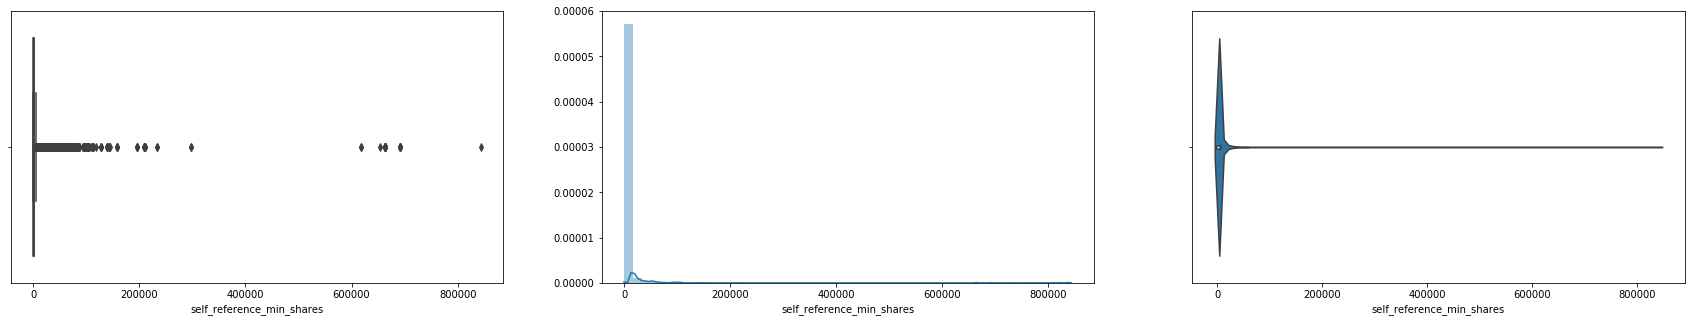



*************Bivariate Analysis*****************




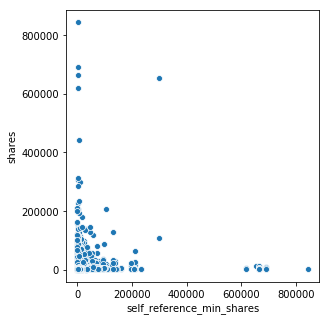



The Corelation between Target Column and Input Column is :  0.05595757511084392


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64






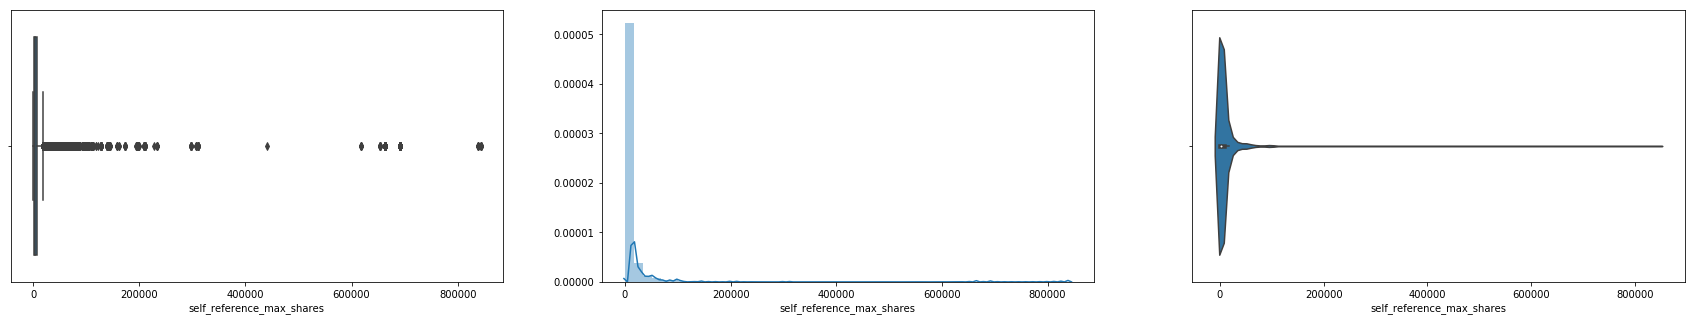



*************Bivariate Analysis*****************




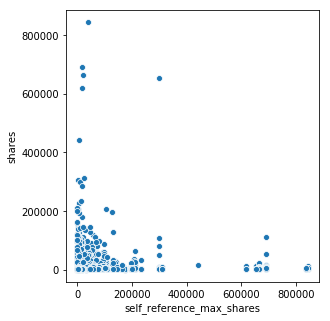



The Corelation between Target Column and Input Column is :  0.04711522330980033


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64






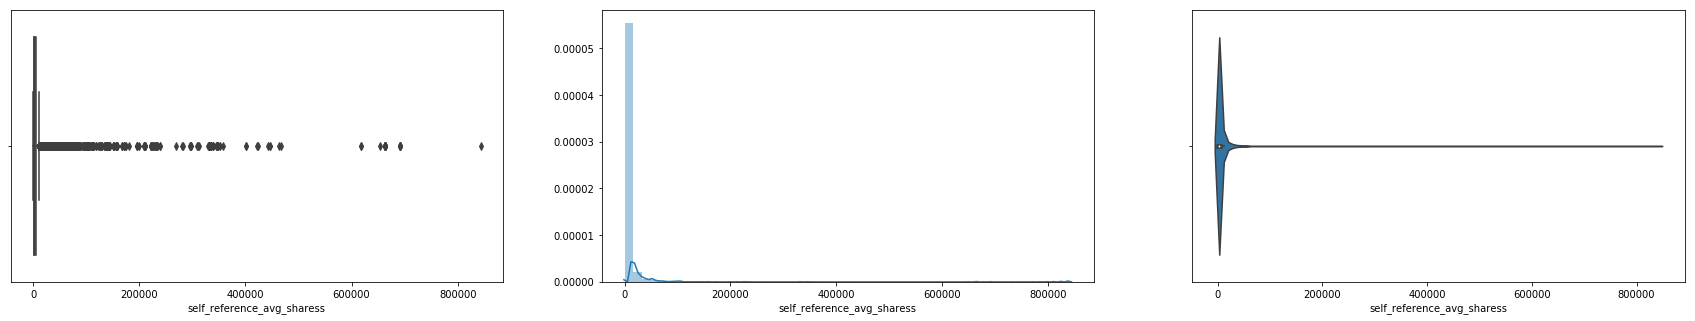



*************Bivariate Analysis*****************




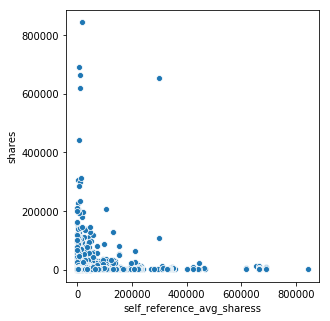



The Corelation between Target Column and Input Column is :  0.057788897391294065


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.168020
std          0.373889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_monday, dtype: float64






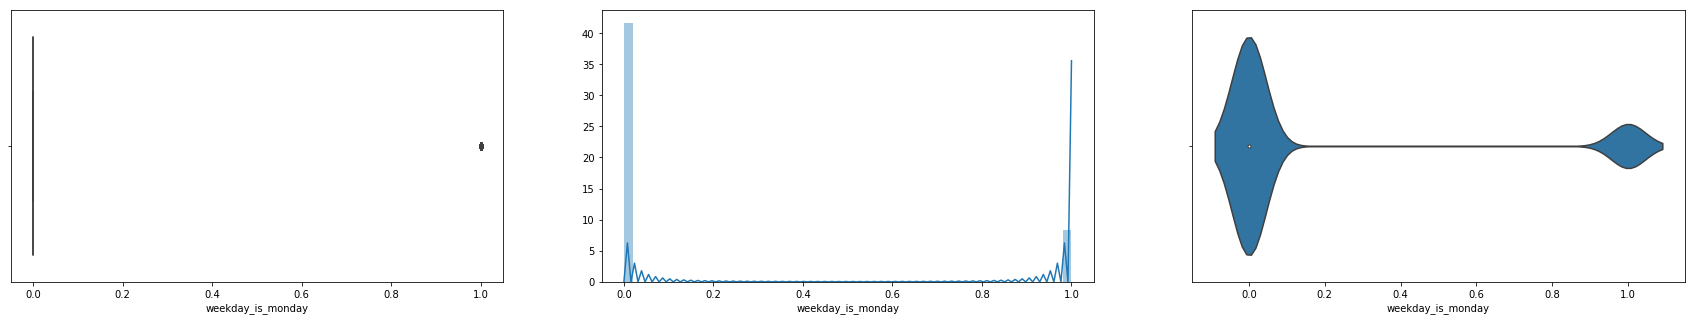



*************Bivariate Analysis*****************


   weekday_is_monday
0              32983
1               6661




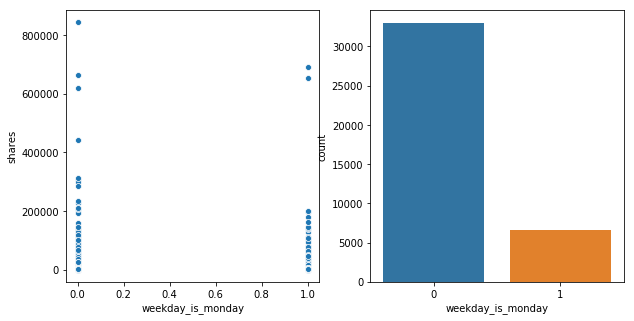



The Corelation between Target Column and Input Column is :  0.009726435058827807


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.186409
std          0.389441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_tuesday, dtype: float64






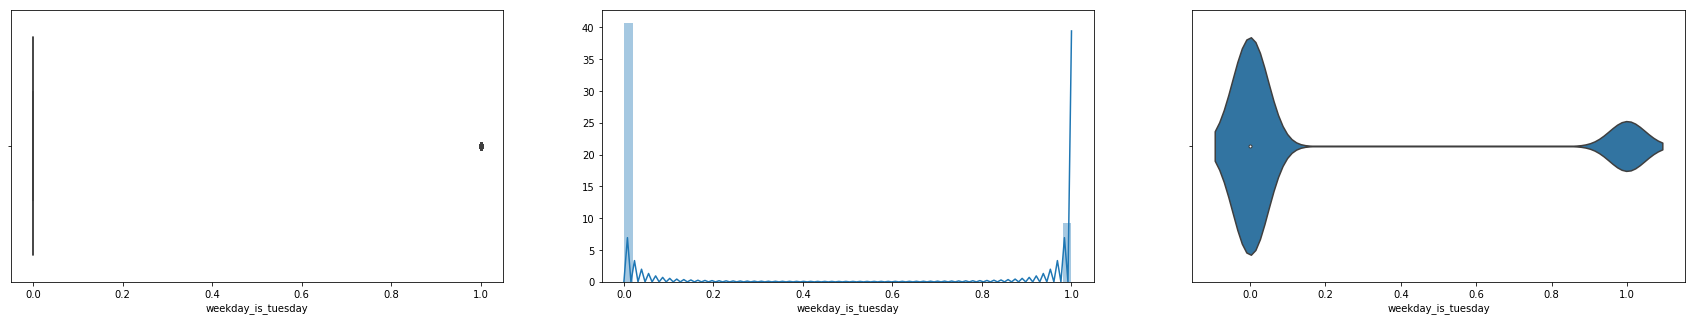



*************Bivariate Analysis*****************


   weekday_is_tuesday
0               32254
1                7390




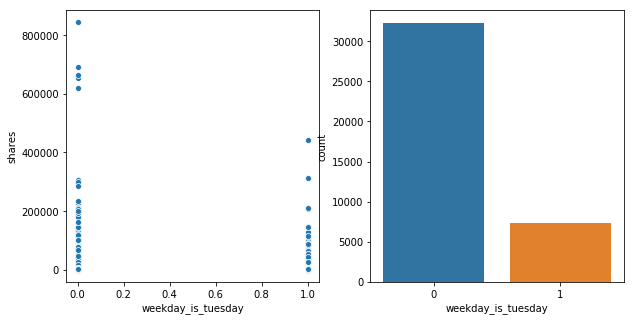



The Corelation between Target Column and Input Column is :  -0.007940651946220885


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.187544
std          0.390353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_wednesday, dtype: float64






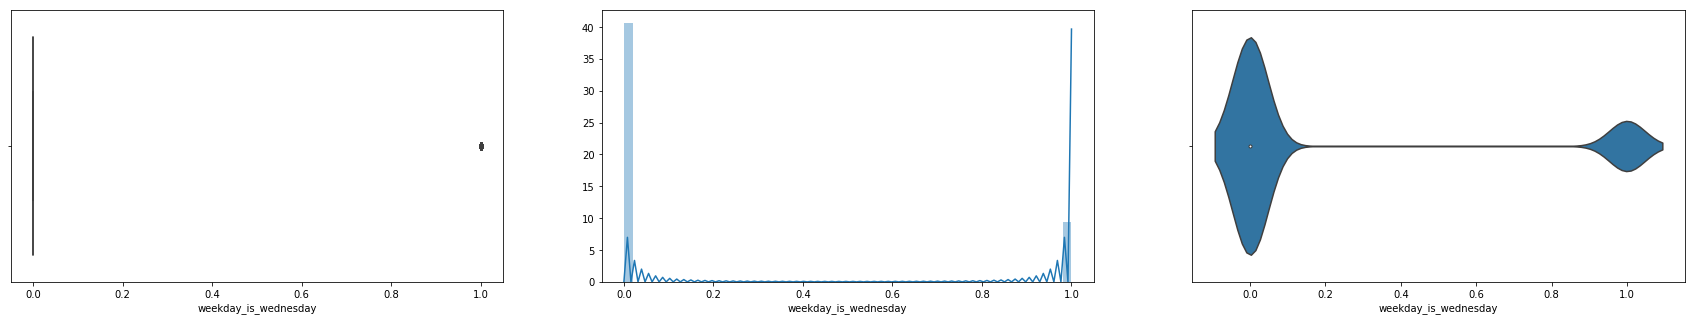



*************Bivariate Analysis*****************


   weekday_is_wednesday
0                 32209
1                  7435




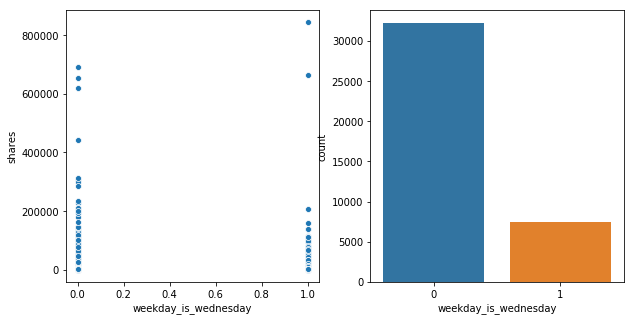



The Corelation between Target Column and Input Column is :  -0.0038006718995361667


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.183306
std          0.386922
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_thursday, dtype: float64






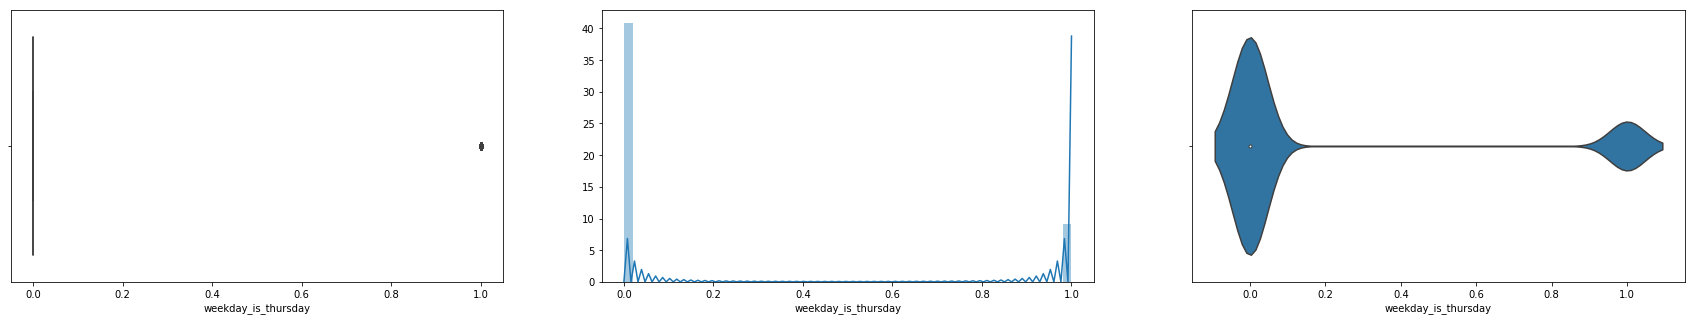



*************Bivariate Analysis*****************


   weekday_is_thursday
0                32377
1                 7267




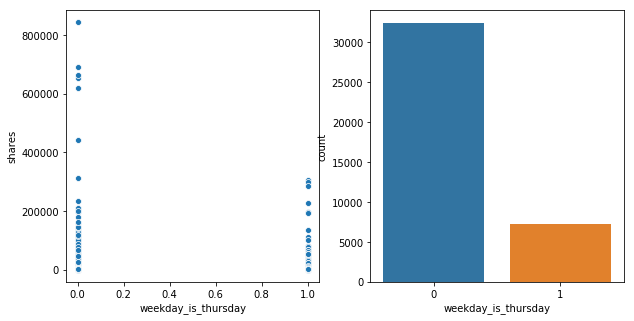



The Corelation between Target Column and Input Column is :  -0.008833243677374517


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.143805
std          0.350896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_friday, dtype: float64






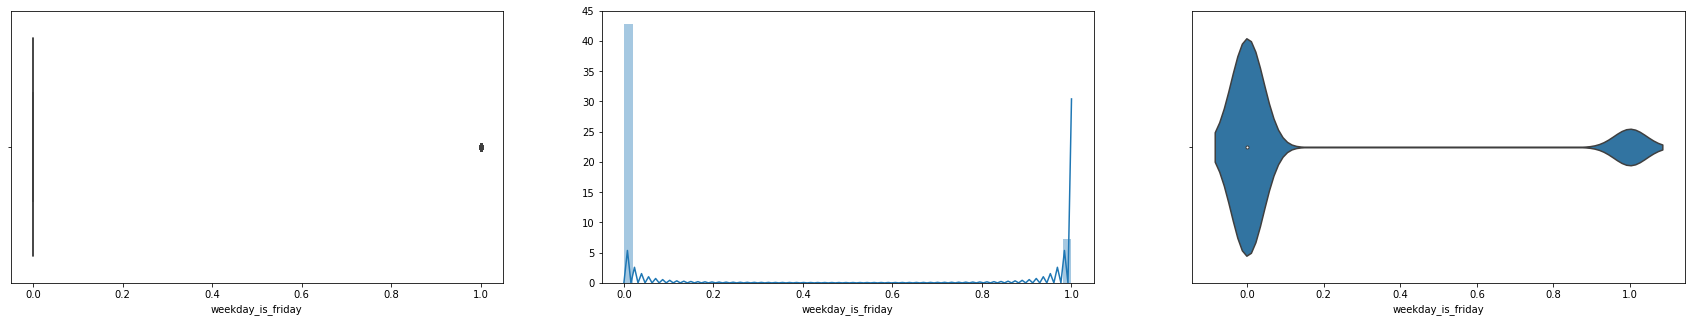



*************Bivariate Analysis*****************


   weekday_is_friday
0              33943
1               5701




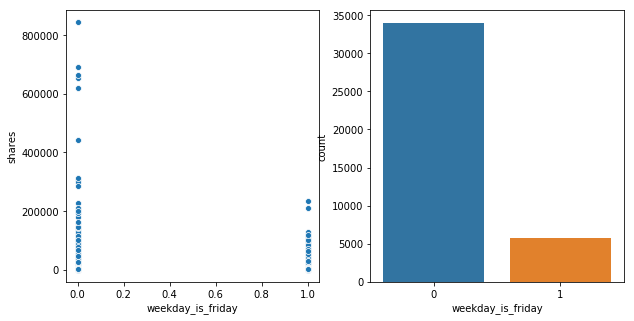



The Corelation between Target Column and Input Column is :  -0.0038843499366703043


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.061876
std          0.240933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_saturday, dtype: float64






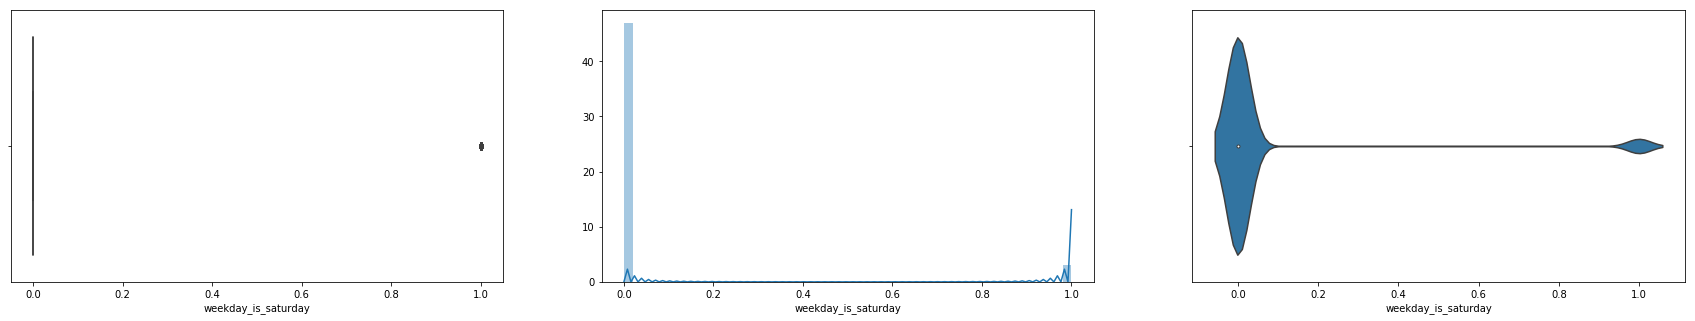



*************Bivariate Analysis*****************


   weekday_is_saturday
0                37191
1                 2453




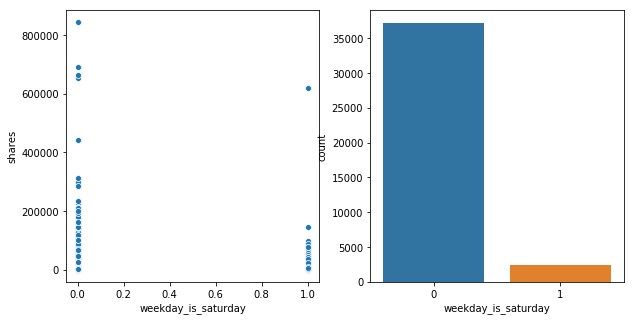



The Corelation between Target Column and Input Column is :  0.015082249374438758


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.069039
std          0.253524
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_sunday, dtype: float64






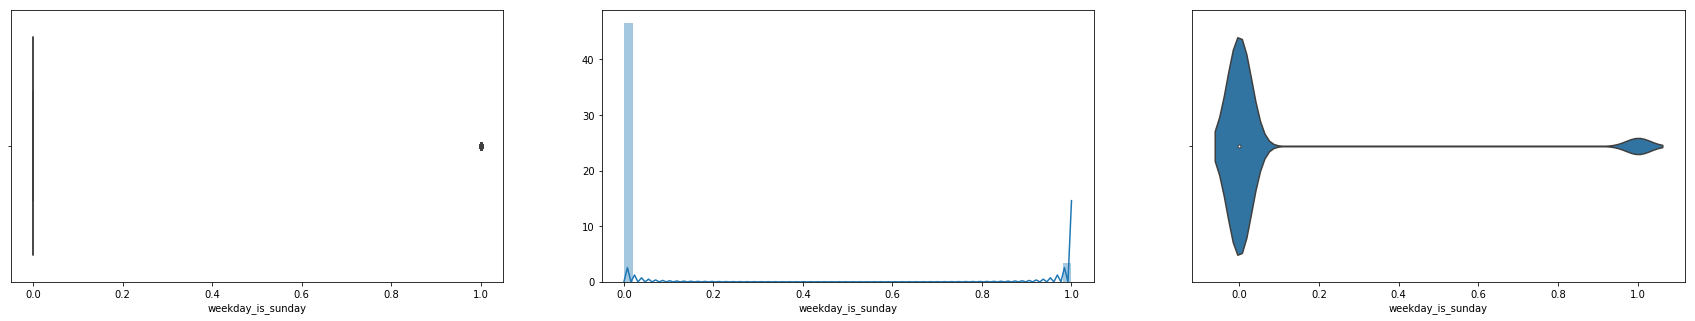



*************Bivariate Analysis*****************


   weekday_is_sunday
0              36907
1               2737




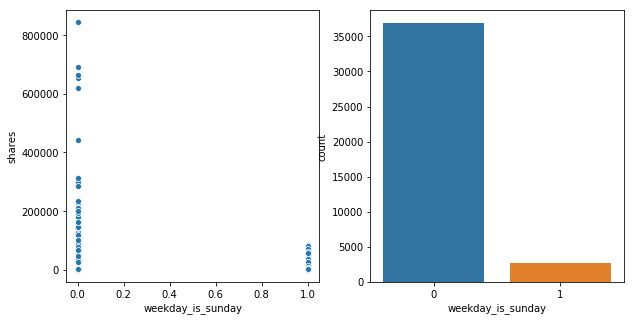



The Corelation between Target Column and Input Column is :  0.008229538740752353


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.130915
std          0.337312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_weekend, dtype: float64






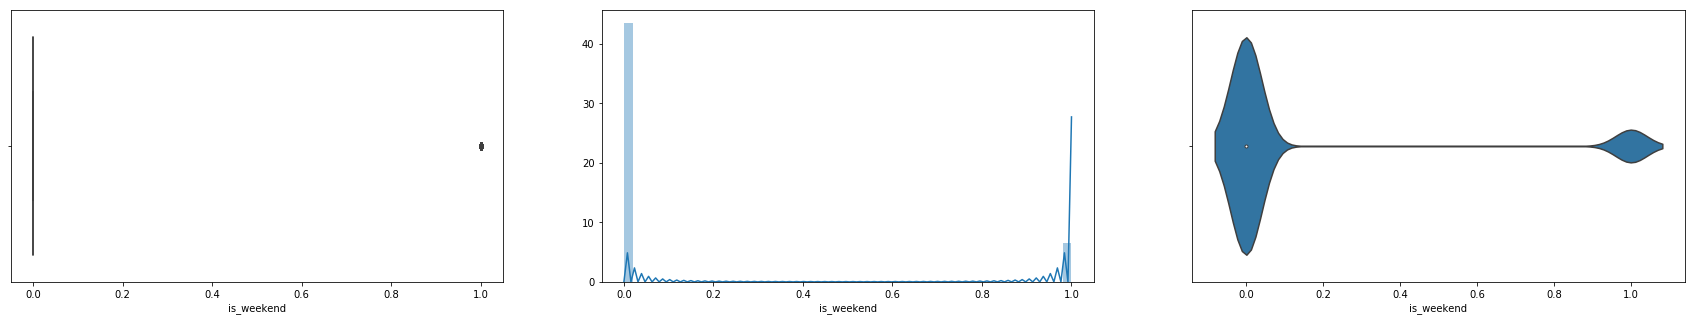



*************Bivariate Analysis*****************


   is_weekend
0       34454
1        5190




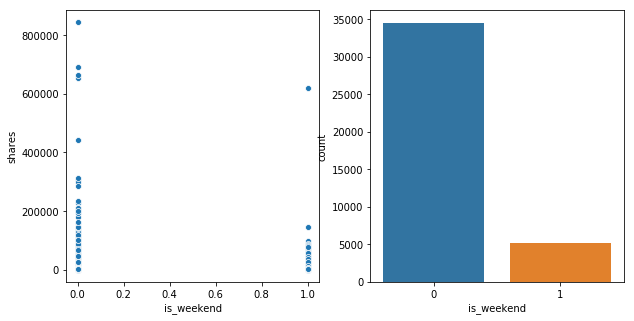



The Corelation between Target Column and Input Column is :  0.016958185255365167


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64






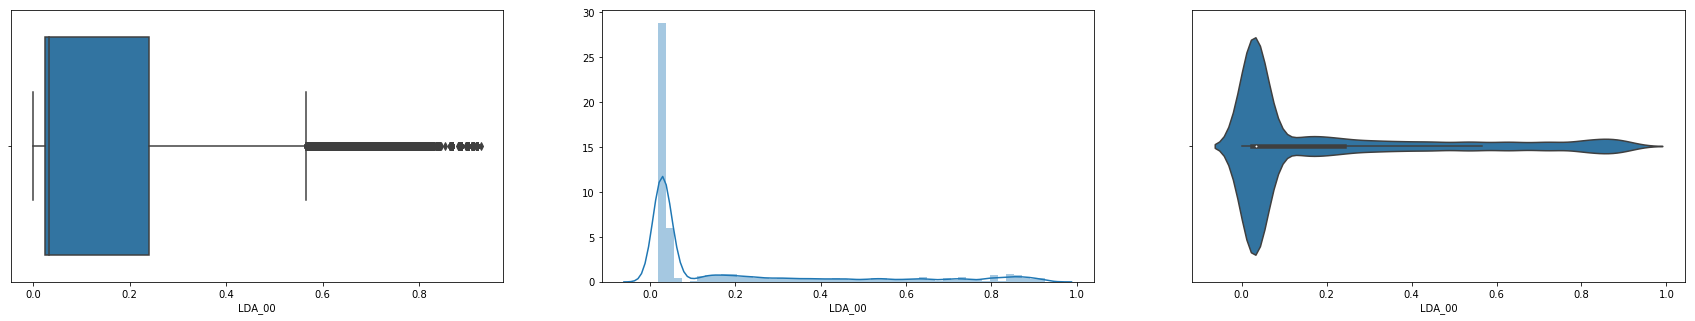



*************Bivariate Analysis*****************




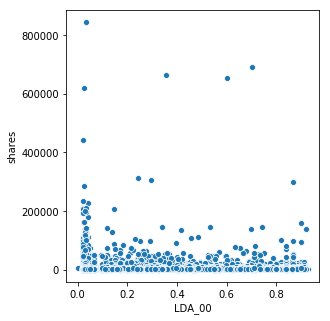



The Corelation between Target Column and Input Column is :  -0.003793063145058734


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64






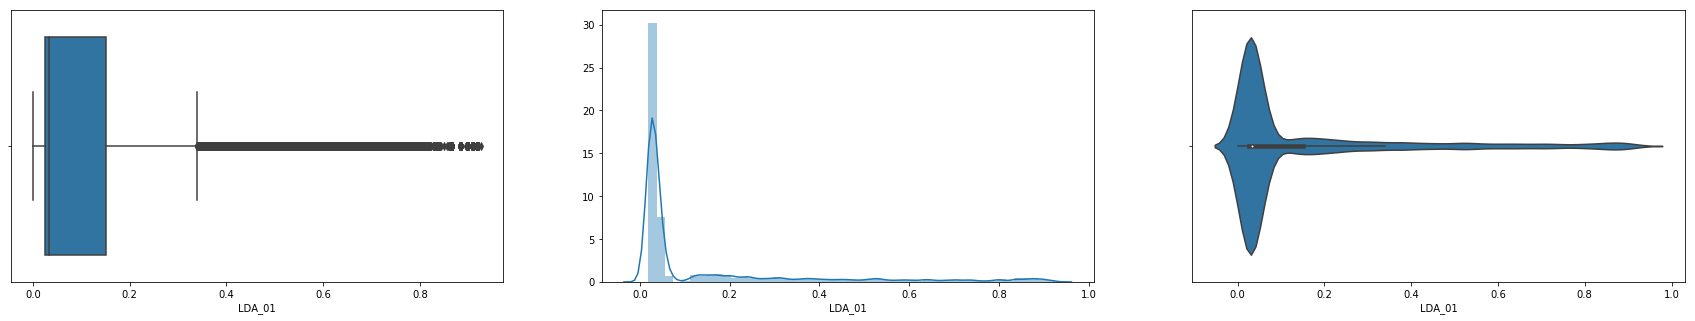



*************Bivariate Analysis*****************




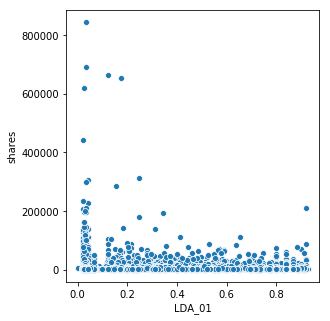



The Corelation between Target Column and Input Column is :  -0.010182873750029416


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64






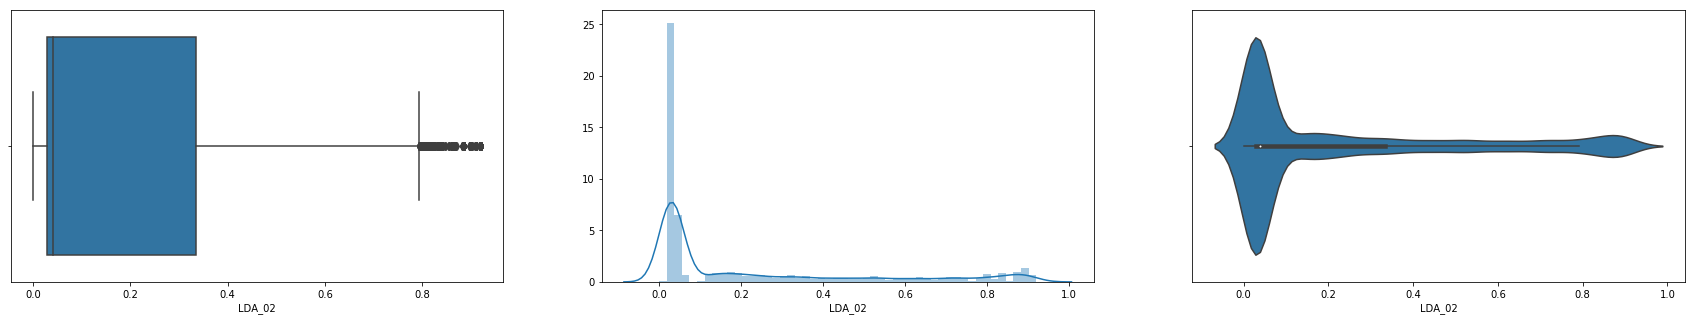



*************Bivariate Analysis*****************




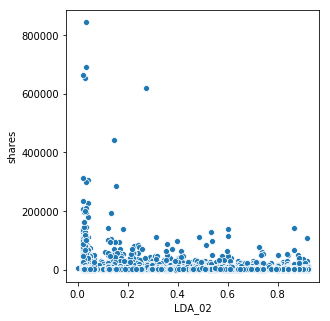



The Corelation between Target Column and Input Column is :  -0.05916272983083368


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64






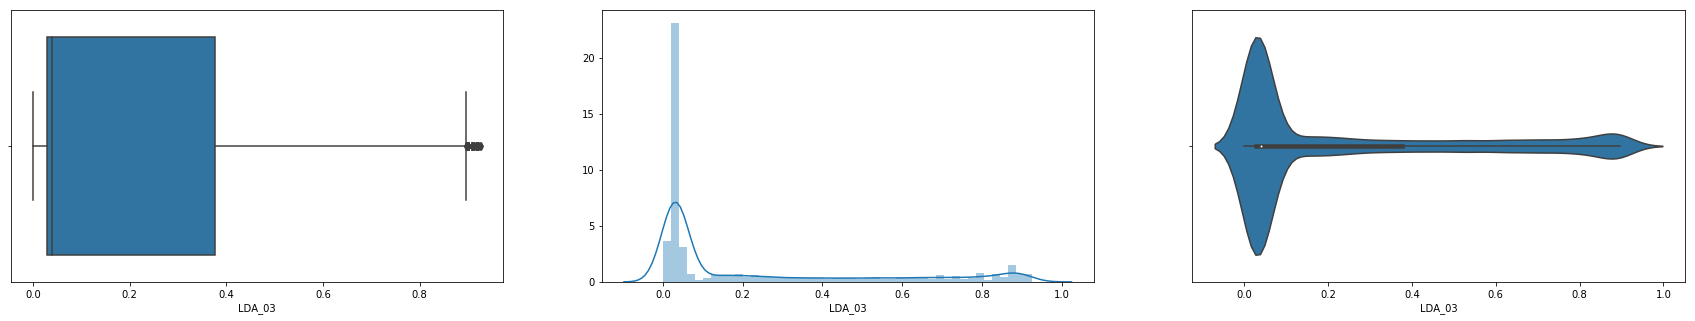



*************Bivariate Analysis*****************




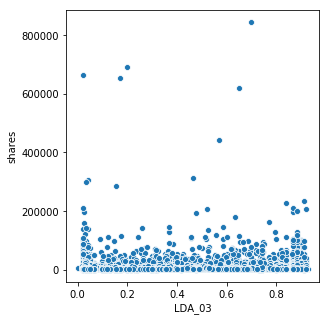



The Corelation between Target Column and Input Column is :  0.0837714920052308


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64






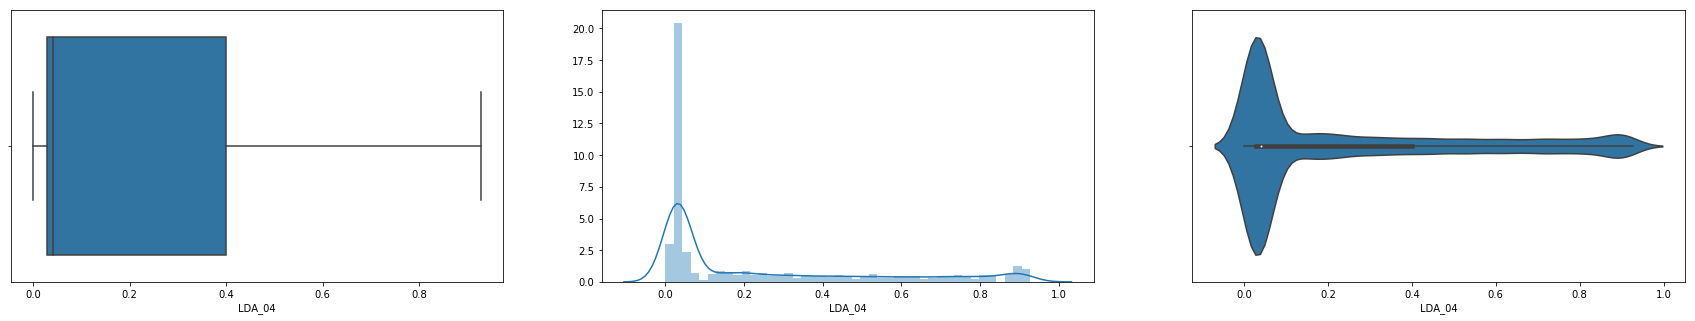



*************Bivariate Analysis*****************




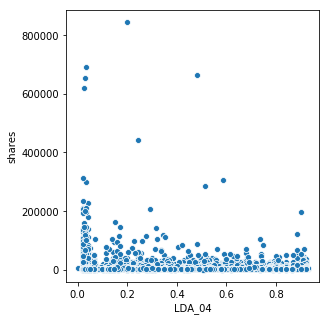



The Corelation between Target Column and Input Column is :  -0.016621938185469472


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64






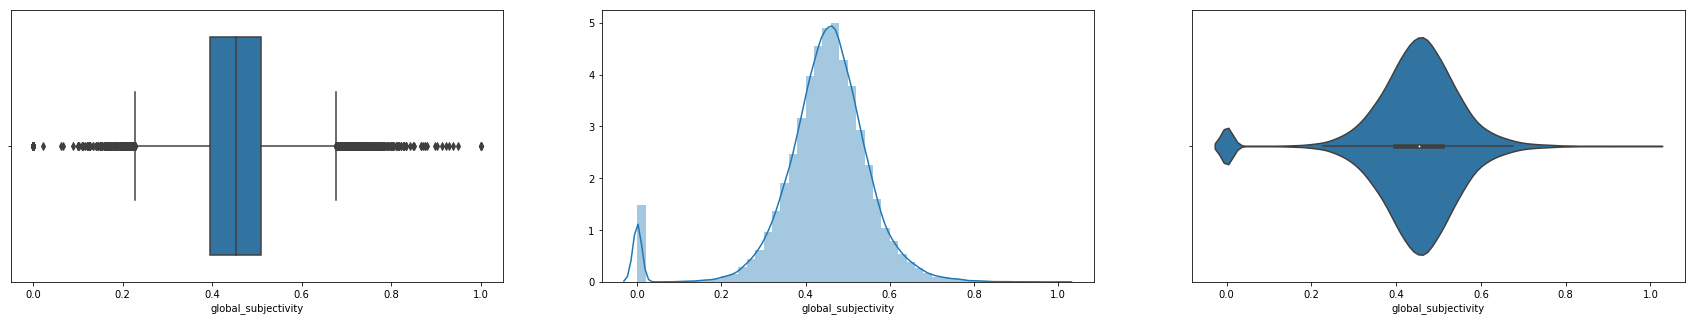



*************Bivariate Analysis*****************




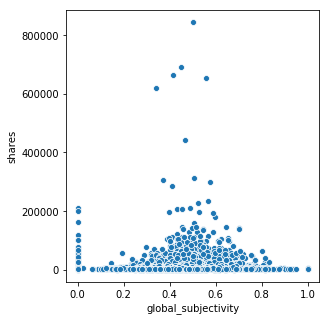



The Corelation between Target Column and Input Column is :  0.03160406219783574


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64






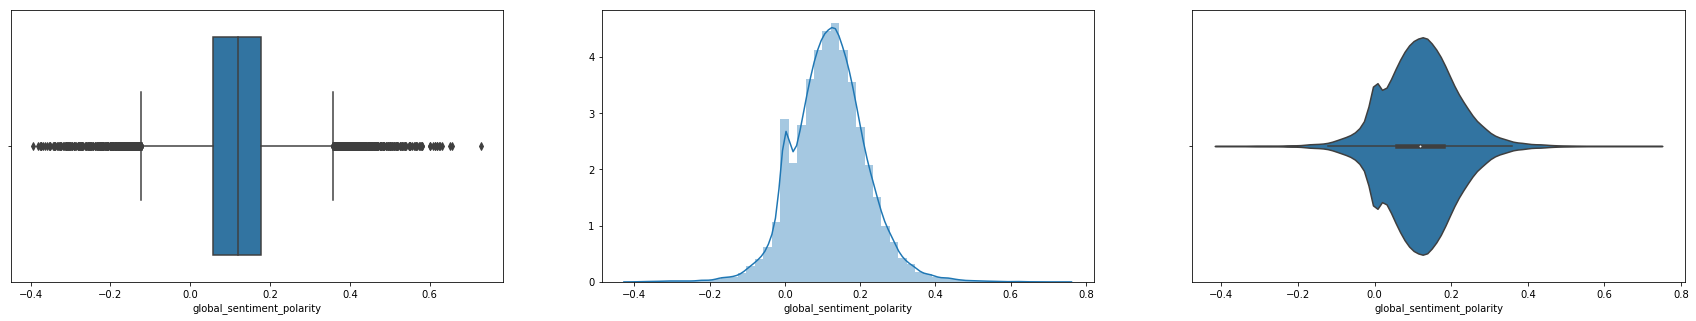



*************Bivariate Analysis*****************




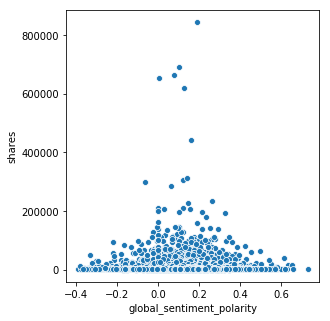



The Corelation between Target Column and Input Column is :  0.00416292907972501


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64






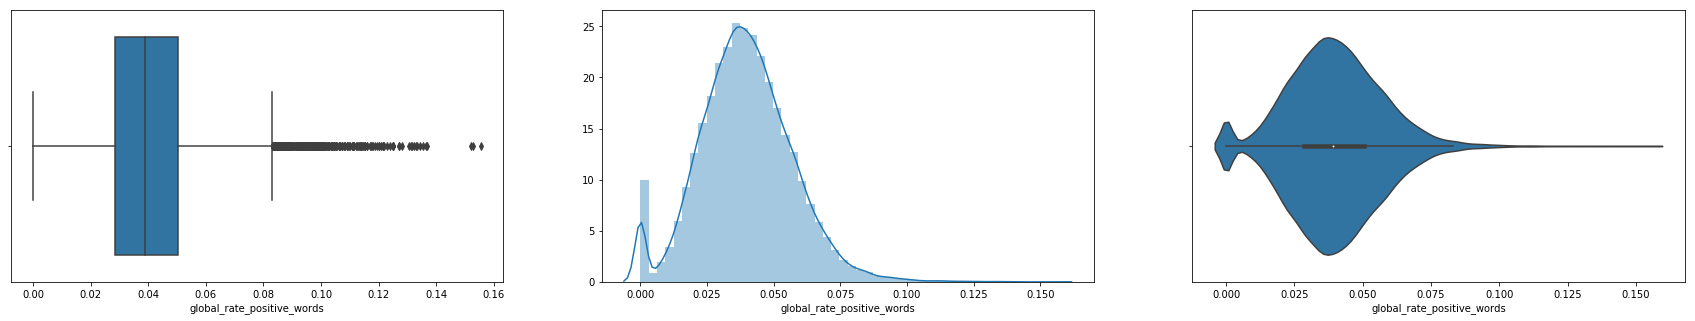



*************Bivariate Analysis*****************




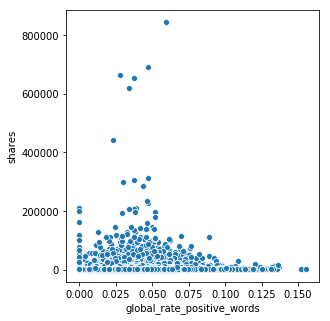



The Corelation between Target Column and Input Column is :  0.0005432341278151099


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64






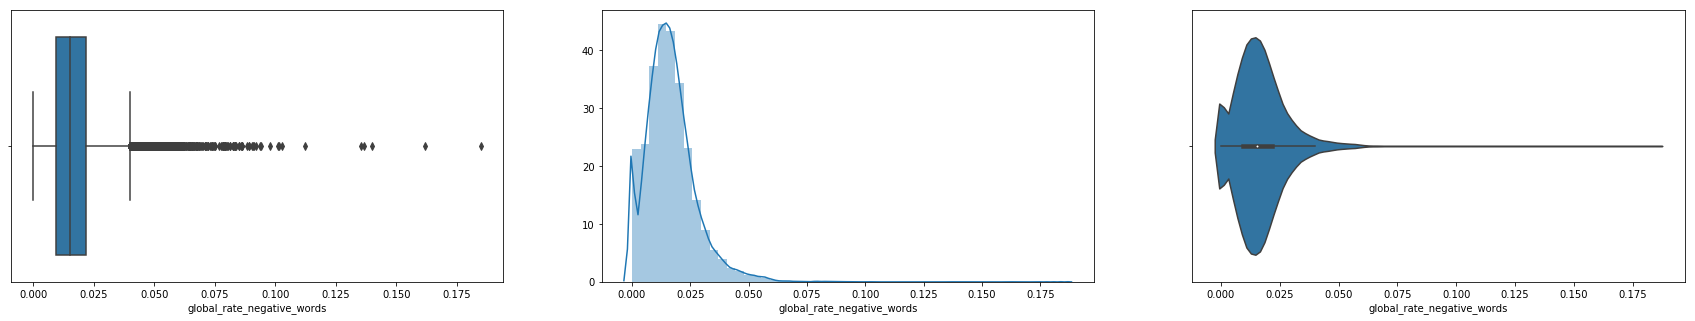



*************Bivariate Analysis*****************




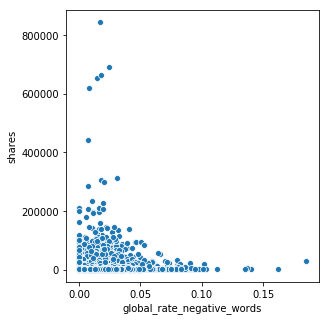



The Corelation between Target Column and Input Column is :  0.006615172949299856


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64






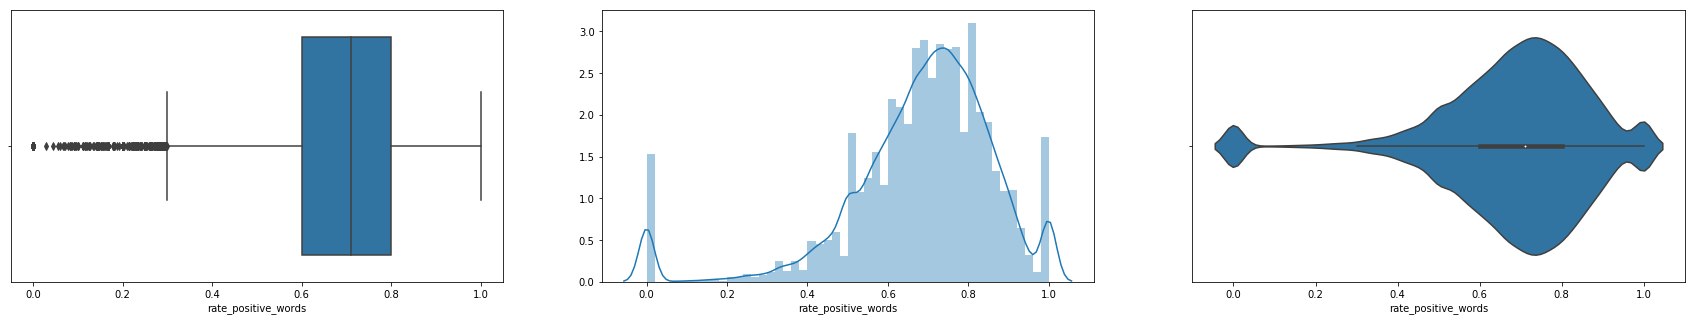



*************Bivariate Analysis*****************




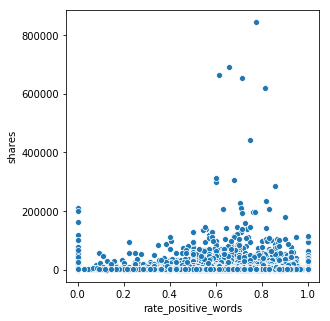



The Corelation between Target Column and Input Column is :  -0.013241304223597481


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64






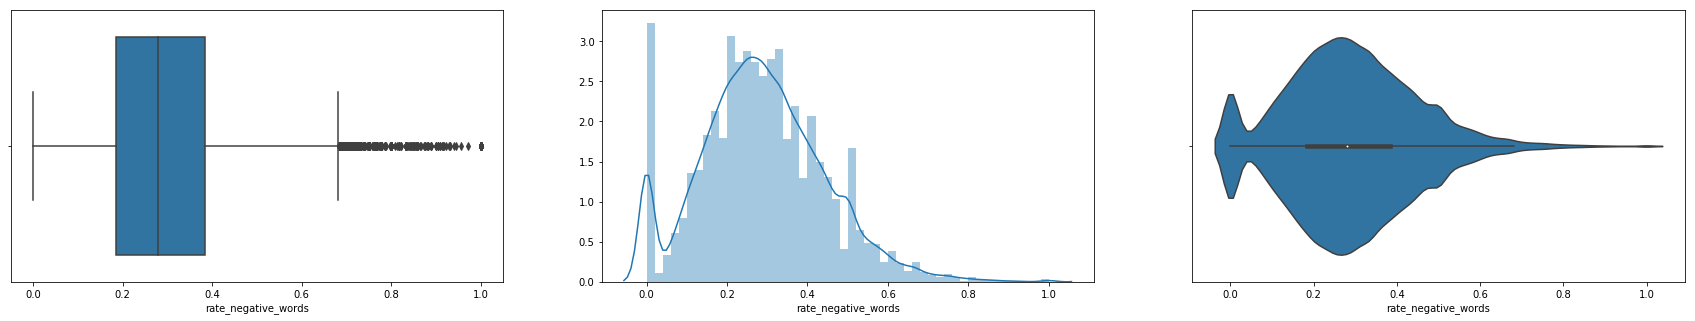



*************Bivariate Analysis*****************




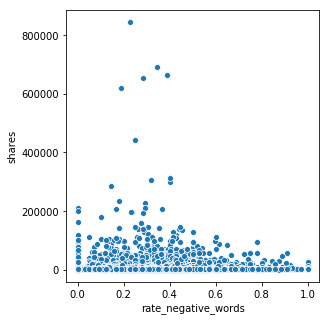



The Corelation between Target Column and Input Column is :  -0.005183138297384304


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64






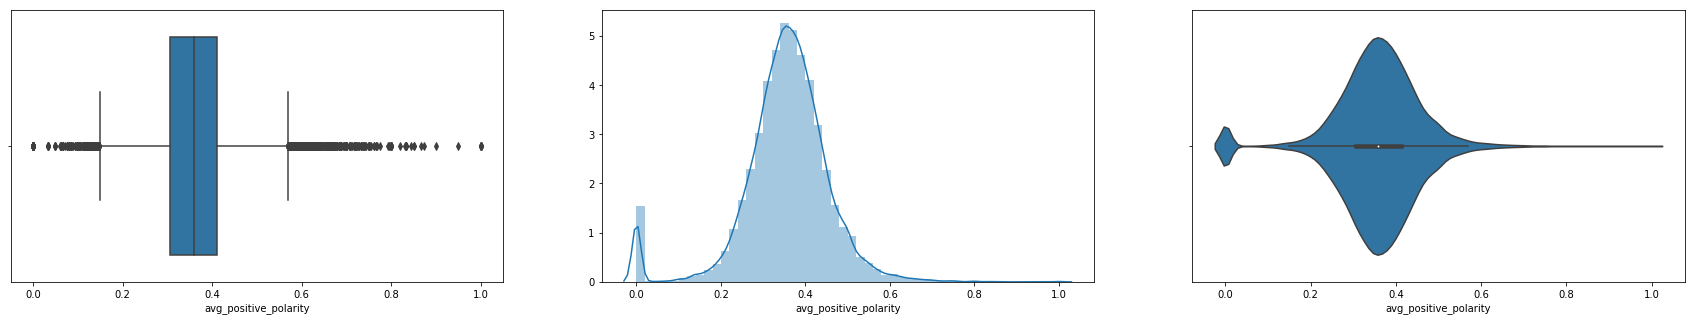



*************Bivariate Analysis*****************




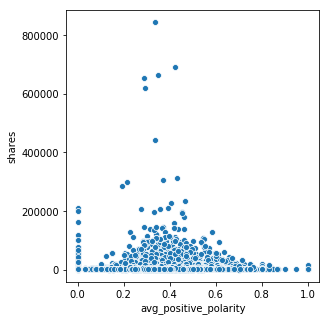



The Corelation between Target Column and Input Column is :  0.012142198866445629


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64






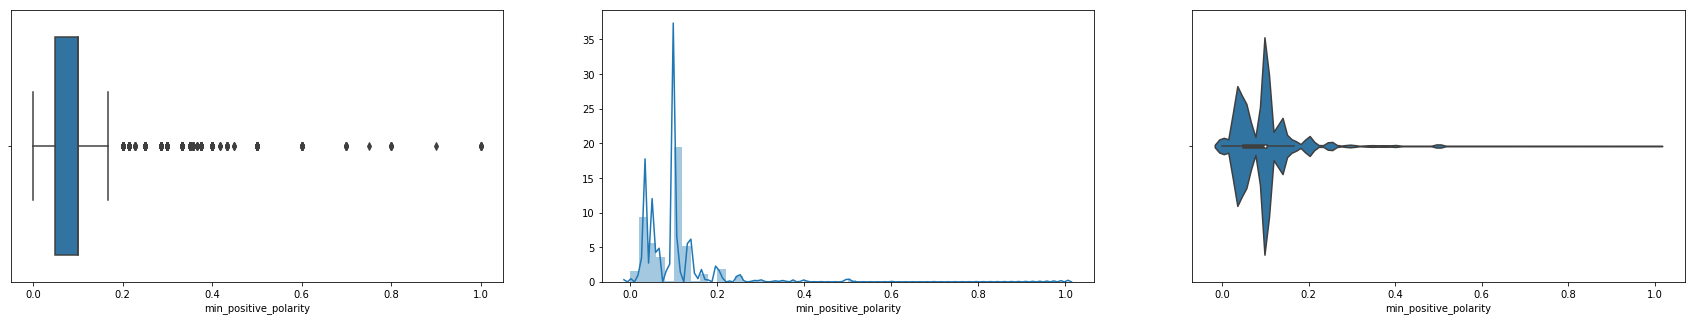



*************Bivariate Analysis*****************




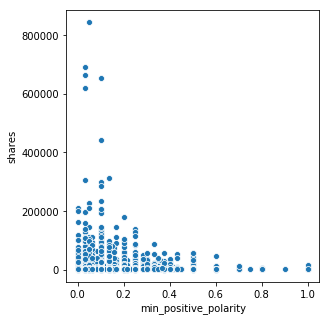



The Corelation between Target Column and Input Column is :  -4.009525290875695e-05


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64






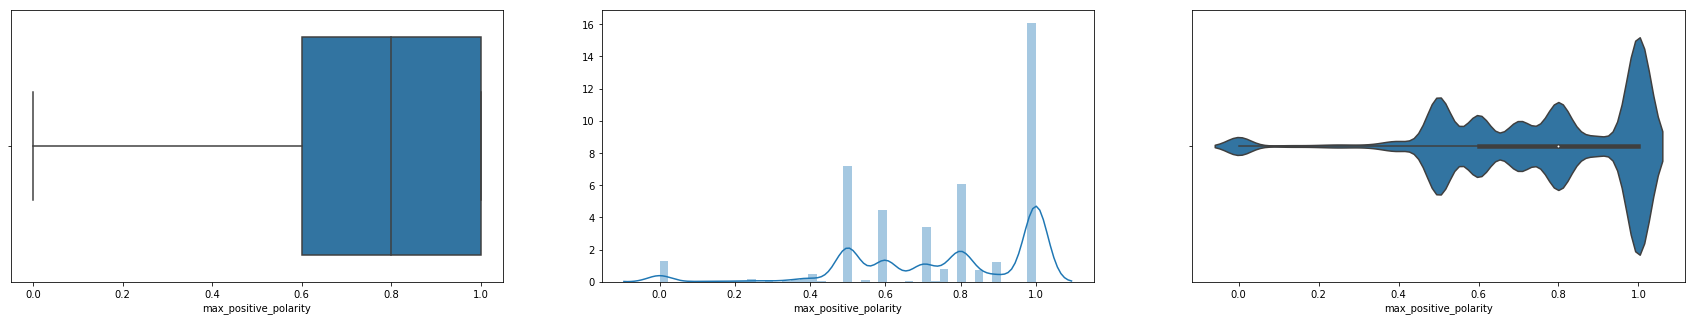



*************Bivariate Analysis*****************




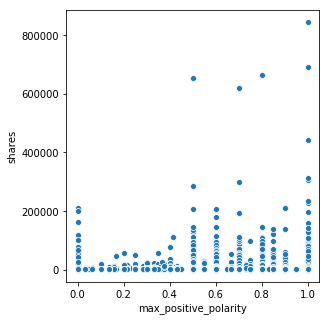



The Corelation between Target Column and Input Column is :  0.010067794397577443


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64






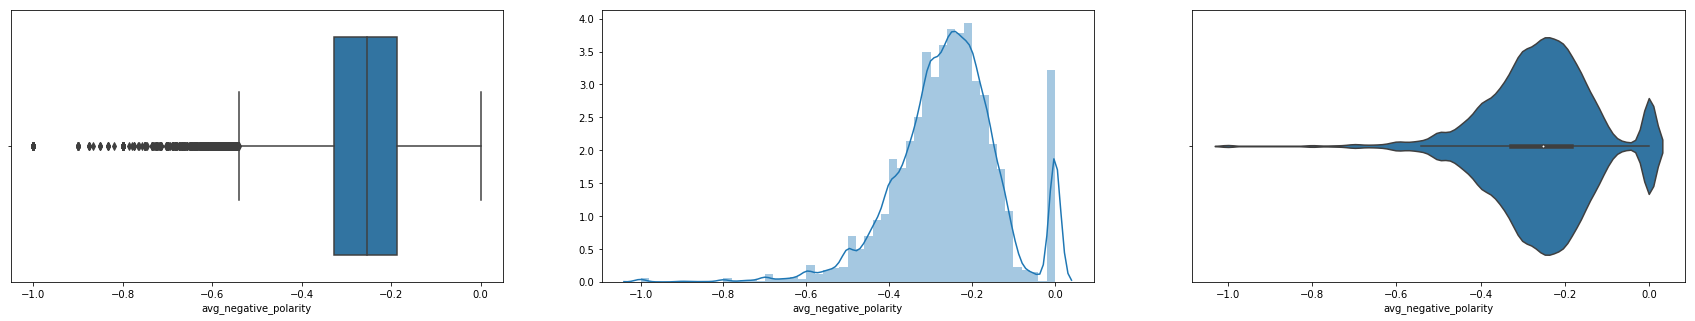



*************Bivariate Analysis*****************




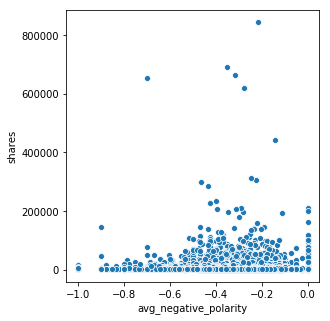



The Corelation between Target Column and Input Column is :  -0.03202890860983149


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        -0.521944
std          0.290290
min         -1.000000
25%         -0.700000
50%         -0.500000
75%         -0.300000
max          0.000000
Name: min_negative_polarity, dtype: float64






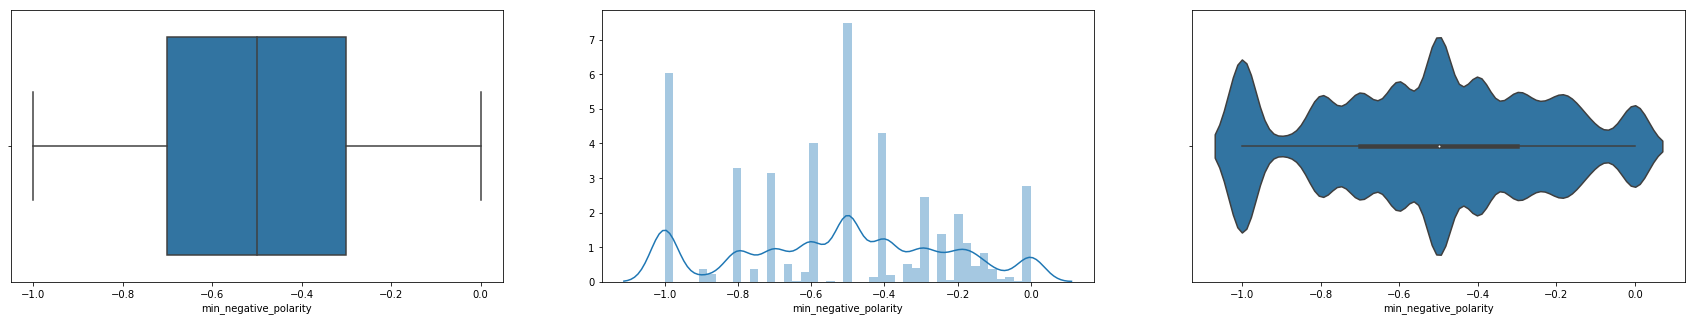



*************Bivariate Analysis*****************




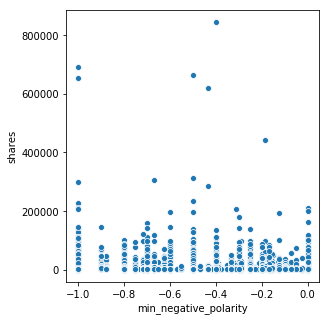



The Corelation between Target Column and Input Column is :  -0.019297375182386486


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64






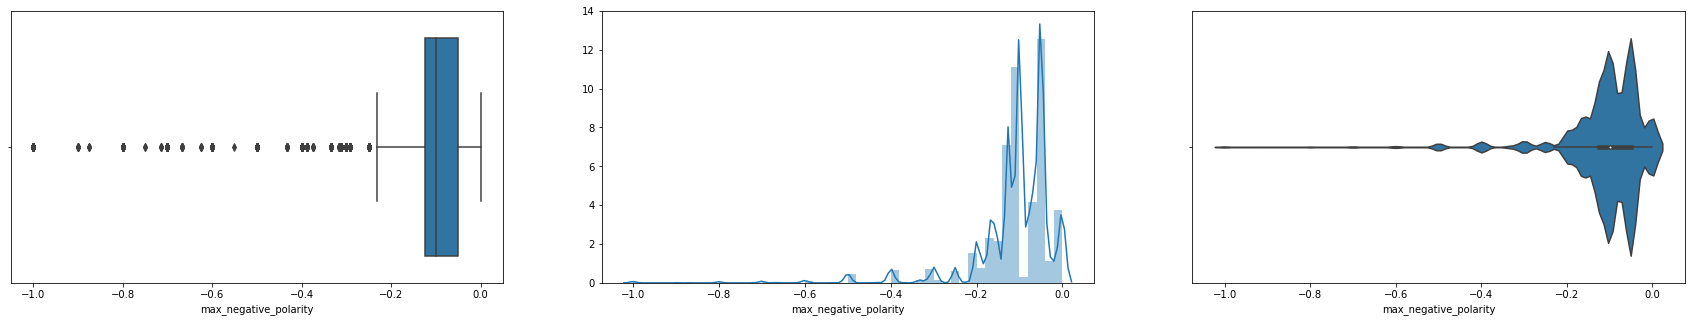



*************Bivariate Analysis*****************




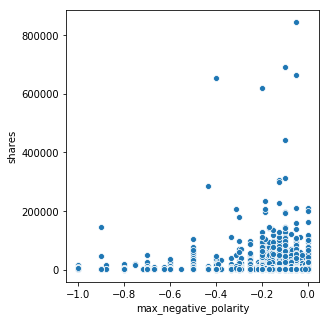



The Corelation between Target Column and Input Column is :  -0.019300211386032176


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64






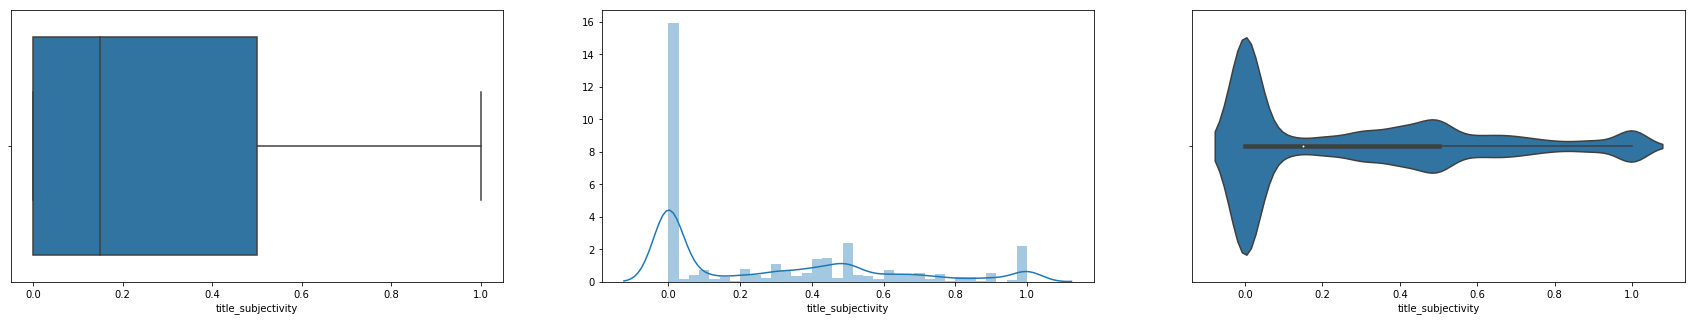



*************Bivariate Analysis*****************




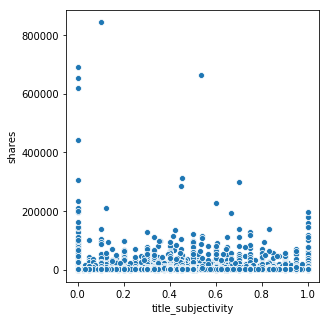



The Corelation between Target Column and Input Column is :  0.021966682304800166


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64






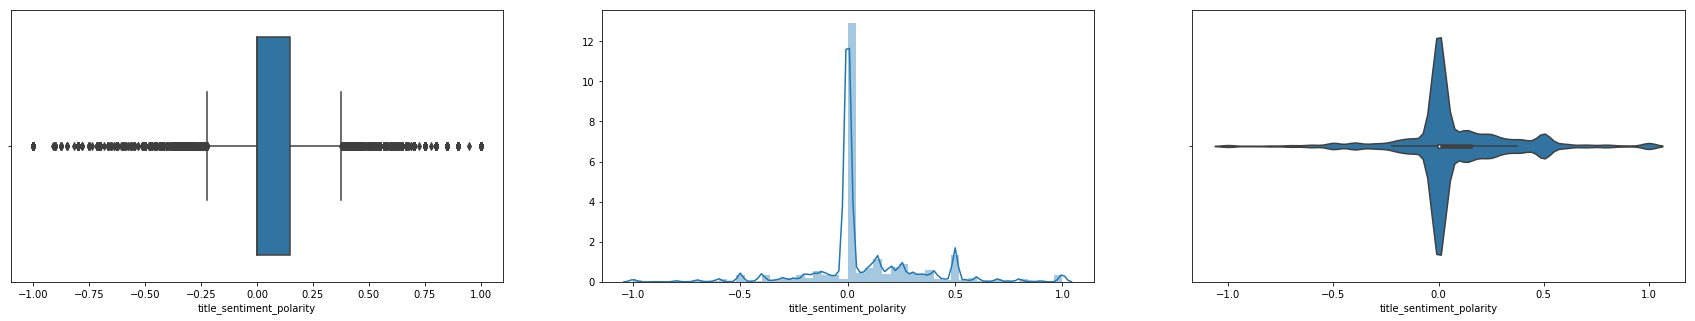



*************Bivariate Analysis*****************




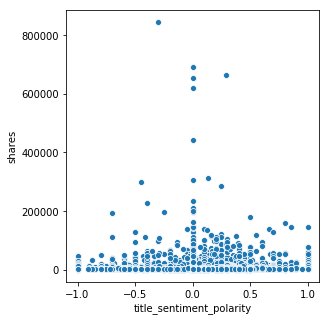



The Corelation between Target Column and Input Column is :  0.012771873146251198


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64






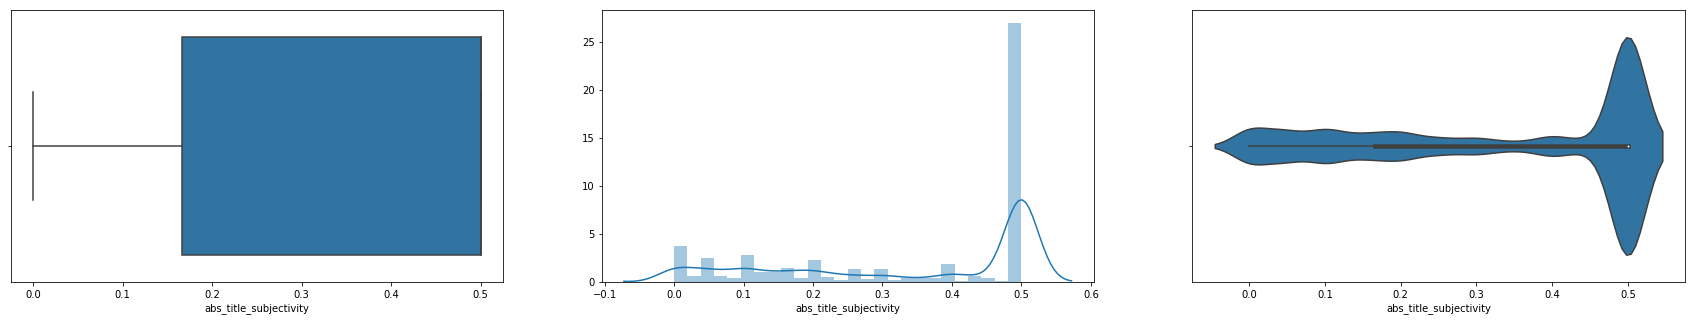



*************Bivariate Analysis*****************




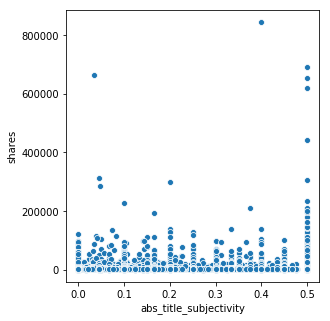



The Corelation between Target Column and Input Column is :  0.0014809979089468054


_______________________________________________________________________


*************Univariate Analysis*****************


count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64






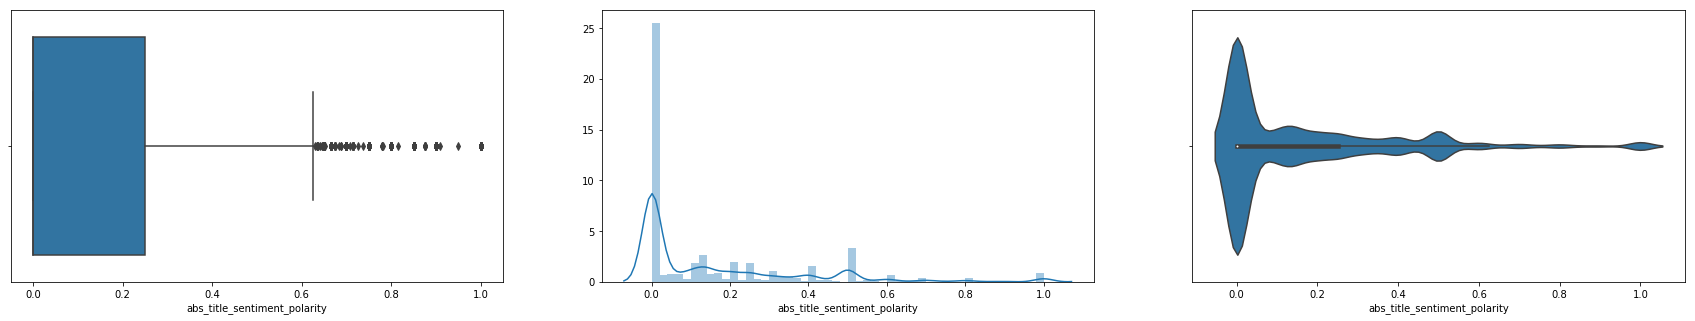



*************Bivariate Analysis*****************




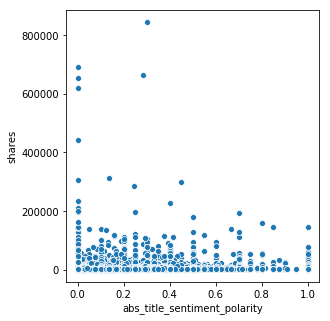



The Corelation between Target Column and Input Column is :  0.02713523099113887


_______________________________________________________________________


*************Univariate Analysis*****************


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64






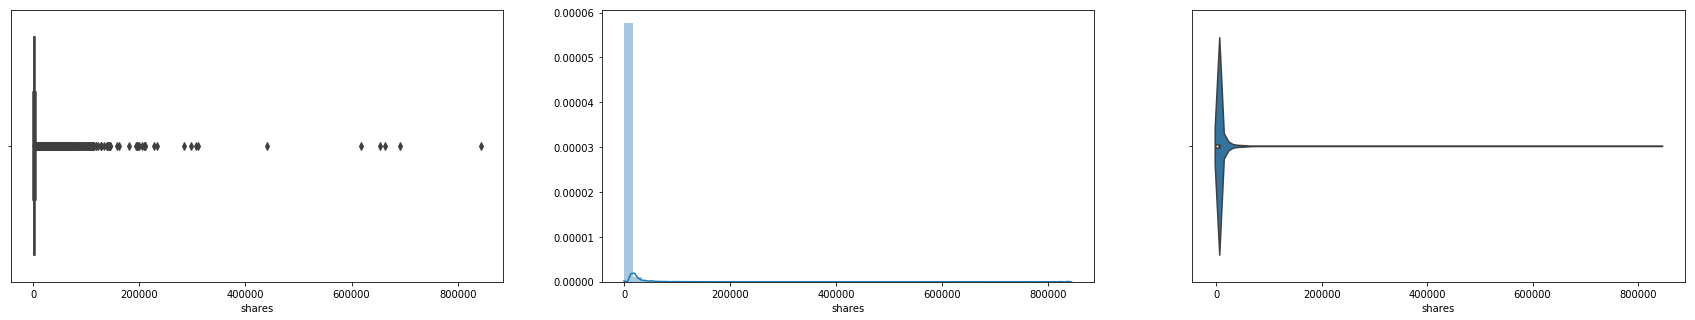



*************Bivariate Analysis*****************




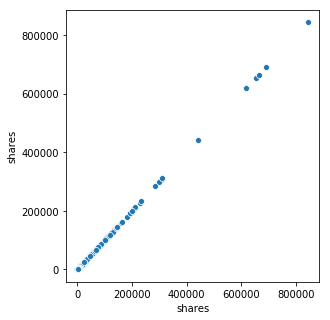



The Corelation between Target Column and Input Column is :  0.9999999999999999




In [8]:
for i in col:
    bivar(data[i])

## Droping columns which do not have ouliers and taking columns which have ouliers 

In [21]:
new_data=data.drop(['url', 'timedelta','data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares','log_shares'],axis=1)

In [22]:
new_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

In [82]:
data.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...        731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2  http://mashable.com/2013/01/07/apple-40-billio...        731   
3  http://mashable.com/2013/01/07/astronaut-notre...        731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385          4               2         1  ...   
1                  0.791946          3               1         1  ...   
2                  0.663866          3               1         1  ...   
3                  0.665635          9               0         1  ...   
4                  0.540890         19              19        20  ...   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  shares  log_shares  
0                0.000000                      0.187500     593    6.385194  
1                0.500000                      0.000000     711    6.566672  
2                0.500000                      0.000000    1500    7.313220  
3                0.500000                      0.000000    1200    7.090077  
4                0.045455                      0.136364     505    6.224558  

[5 rows x 62 columns]

## Finding number of outliers and replacing it with null

In [23]:
col=new_data.columns

In [24]:
def out_null(col):
    if col.nunique()>3:
        IQR=col.quantile(0.75)-col.quantile(0.25)
        UL=col.quantile(0.75)+1.5*IQR
        DL=col.quantile(0.25)-1.5*IQR
        col.where(col.between(DL,UL),np.nan,inplace=True)

#****************Initializing the function**************************

for i in new_data.columns:
    out_null(new_data[i])
    
    
   # cf = my dataframe
    #col = column in my dataframe

In [11]:
data.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

## finding out the percentage columns with null values

In [86]:
(data.isnull().sum()/len(data))*100

url                              0.0
timedelta                        0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
k

## Treating null values with mice

In [87]:
k=mice(new_data)

C:\Users\DELL\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [88]:
k.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [90]:
k

0            1         2    3         4          5          6   \
0      12.0   219.000000  0.663594  1.0  0.815385   4.000000   2.000000   
1       9.0   255.000000  0.604743  1.0  0.791946   3.000000   1.000000   
2       9.0   211.000000  0.575130  1.0  0.663866   3.000000   1.000000   
3       9.0   531.000000  0.503788  1.0  0.665635   9.000000   0.000000   
4      13.0  1072.000000  0.415646  1.0  0.540890  19.000000  10.093414   
5      10.0   370.000000  0.559889  1.0  0.698198   2.000000   2.000000   
6       8.0   960.000000  0.418163  1.0  0.549834  21.000000  10.314390   
7      12.0   989.000000  0.433574  1.0  0.572108  20.000000  10.271822   
8      11.0    97.000000  0.670103  1.0  0.836735   2.000000   0.000000   
9      10.0   231.000000  0.636364  1.0  0.797101   4.000000   1.000000   
10      9.0  1248.000000  0.490050  1.0  0.731638  11.000000   0.000000   
11     10.0   187.000000  0.666667  1.0  0.800000   7.000000   0.000000   
12      9.0   274.000000  0.609195  1.0  0.707602  18.000000   2.000000   
13      9.0   285.000000  0.744186  1.0  0.841530   4.000000   2.000000   
14      8.0   259.000000  0.562753  1.0  0.644444  19.000000   3.000000   
15     12.0   682.000000  0.459542  1.0  0.634961  10.000000   0.000000   
16      8.0  1118.000000  0.512397  1.0  0.709770  26.000000   7.958862   
17      8.0   397.000000  0.624679  1.0  0.805668  11.000000   0.000000   
18     11.0   103.000000  0.689320  1.0  0.806452   3.000000   1.000000   
19      8.0  1207.000000  0.410579  1.0  0.548969  24.000000  10.545374   
20     13.0  1248.000000  0.390638  1.0  0.523388  21.000000  10.474614   
21      9.0   391.000000  0.510256  1.0  0.650000   9.000000   2.000000   
22     11.0  1154.000000  0.427305  1.0  0.572816  20.000000  10.039270   
23     11.0   125.000000  0.674797  1.0  0.797468   1.000000   1.000000   
24     13.0   244.000000  0.560000  1.0  0.680272   3.000000   2.000000   
25      8.0   266.000000  0.572581  1.0  0.721088   5.000000   2.000000   
26      8.0   331.000000  0.562691  1.0  0.724490   5.000000   3.000000   
27     12.0  1225.000000  0.385452  1.0  0.508519  22.000000  10.581477   
28     10.0   243.000000  0.619247  1.0  0.824427   1.000000   1.000000   
29     11.0   723.000000  0.490934  1.0  0.642241  18.000000   1.000000   
...     ...          ...       ...  ...       ...        ...        ...   
39614   9.0   904.000000  0.472158  1.0  0.606822  27.000000   2.000000   
39615  11.0     0.000000  0.683573  1.0  0.810876   0.000000   0.000000   
39616  15.0     0.000000  0.695401  1.0  0.825089   0.000000   0.000000   
39617  11.0   991.000000  0.459173  1.0  0.618487  11.595922   3.000000   
39618  14.0   488.000000  0.517454  1.0  0.683502  14.000000   5.933774   
39619  14.0   428.000000  0.512881  1.0  0.698745   2.000000   1.000000   
39620  13.0   413.000000  0.556675  1.0  0.692913  11.000000   2.000000   
39621   9.0   468.000000  0.582781  1.0  0.691318  17.000000   1.000000   
39622  11.0  1122.000000  0.439421  1.0  0.635258   4.000000   1.000000   
39623  14.0   436.000000  0.529412  1.0  0.701681   6.000000   6.000000   
39624  12.0   429.000000  0.514925  1.0  0.658436   3.000000   3.000000   
39625  13.0   224.000000  0.570136  1.0  0.731343   7.000000   7.000000   
39626  12.0   249.000000  0.567227  1.0  0.748201   4.000000   2.000000   
39627  14.0   874.000000  0.480702  1.0  0.711538  13.000000   1.000000   
39628  14.0   626.000000  0.552504  1.0  0.759791   4.000000   2.000000   
39629  13.0   209.000000  0.656863  1.0  0.722628   4.000000   1.000000   
39630  12.0   491.000000  0.454167  1.0  0.609665   2.000000   2.000000   
39631  13.0   746.000000  0.465306  1.0  0.735849   4.000000   1.000000   
39632  15.0   580.000000  0.506261  1.0  0.661891  15.000000   2.000000   
39633   9.0   614.000000  0.476033  1.0  0.614987  10.000000   0.000000   
39634   9.0   251.000000  0.666667  1.0  0.786164  21.000000   5.061667   
39635  13.0   478.000000  0.514039

In [91]:
k.columns=['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']

In [92]:
data1=data.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],axis=1)

In [93]:
new_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

## Applying mice on the data to treat null values.

In [94]:
mice_data=k.join(data1)

In [95]:
mice_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'url', 'timedelta',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [96]:
mice_data.shape

(39644, 62)

In [97]:
mice_data.to_csv('output1.csv',index=False)

In [98]:
mice_data.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
url                              0
timedelta                        0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socm

## Applying models with transforming of target variable.

In [99]:
model_data=mice_data.drop(['url','timedelta','shares'],axis=1)

In [287]:
X = model_data.drop('log_shares', axis = 1)
Y = model_data['log_shares']
X.shape
Y.shape

(39644,)

In [288]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [289]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [280]:
#Fitting Gradient Boosting to Training set
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train_scaled,Y_train)
y_pred=gb.predict(X_test_scaled)
print('training_ accuracy:  ',gb.score(X_train_scaled, Y_train)*100)
print('testing_ accuracy:  ',gb.score(X_test_scaled, Y_test)*100)

training_ accuracy:   19.37266441561146
testing_ accuracy:   14.301604246938393


In [284]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.14301604246938393


In [278]:
y_pred = np.exp(y_pred)
print(y_pred)

[1132.81810403 1661.74986539 2327.97097457 ... 2415.94634558 1496.67175426
 1223.10524524]


In [279]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test,y_pred))

1980.841090611011

In [293]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_scaled,Y_train)
y_pred_rf=rf.predict(X_test_scaled)
print('training_ accuracy:  ',rf.score(X_train_scaled, Y_train)*100)
print('testing_ accuracy:  ',rf.score(X_test_scaled, Y_test)*100)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training_ accuracy:   83.21809336293377
testing_ accuracy:   3.2454004355196076


In [294]:
y_pred_rf = np.exp(y_pred_rf)
print(y_pred_rf)

[1152.82494783 1258.92715747 1568.50830652 ... 2490.44856489 2712.9474924
 1343.30953622]


In [295]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test,y_pred_rf))

2328.5388395000914